# Displays the Frequent Colors Found
### Uses:
- Display the colors found in legend and cells

Top 6 most frequent colors (excluding black) and their counts:
Color: [255 255 255], Count: 841107
Color: [117 221 255], Count: 278636
Color: [ 87 165 215], Count: 22253
Color: [ 58 110 175], Count: 7731
Color: [ 29  55 135], Count: 4172
Color: [ 0  0 96], Count: 4159


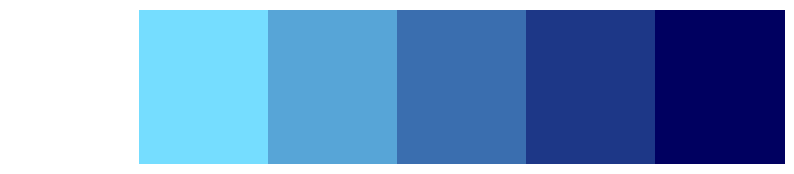

In [10]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

# Specify the directory you want to use
image_path = 'D:\\encoder-tool\\generated-heatmaps\\Industrial_design_applications__nonresident__by_count.png'

# Replace with your image path relative to the specific directory
image = Image.open(image_path)
image = image.convert('RGB')  # Ensure image is in RGB format
image_array = np.array(image)

# Reshape the array to a 2D array where each row is a color
pixels = image_array.reshape(-1, image_array.shape[-1])

# Find unique colors and their counts
unique_colors, counts = np.unique(pixels, axis=0, return_counts=True)

# Filter out black color
non_black_indices = np.any(unique_colors != [0, 0, 0], axis=1)
unique_colors = unique_colors[non_black_indices]
counts = counts[non_black_indices]

# Sort the unique colors by their counts in descending order
sorted_indices = np.argsort(-counts)
top_colors = unique_colors[sorted_indices][:6]
top_counts = counts[sorted_indices][:6]

# Display the top 6 most frequent colors and their counts
print("Top 6 most frequent colors (excluding black) and their counts:")
for color, count in zip(top_colors, top_counts):
    print(f"Color: {color}, Count: {count}")

# Optionally, display the top 6 most frequent colors
plt.figure(figsize=(10, 2))
plt.imshow([top_colors], aspect='auto')
plt.axis('off')
plt.show()

## Contour Detection for Grid heatmap cells region

In [11]:
import cv2
import numpy as np
import os

# Directories
input_dir = 'D:\\thesis-tool\\generated-heatmaps'
output_dir = 'D:\\thesis-tool\\filtered-contours'

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Define the specific size range for contours (area in pixels)
min_contour_area = 400  # Minimum contour area
max_contour_area = 2000  # Maximum contour area

# Iterate through all files in the input directory
for filename in os.listdir(input_dir):
    if filename.endswith('.png'):  # Process only PNG files
        image_path = os.path.join(input_dir, filename)
        image = cv2.imread(image_path)

        # Resize the image to a smaller size
        scale_percent = 100  # Percent of original size
        width = int(image.shape[1] * scale_percent / 100)
        height = int(image.shape[0] * scale_percent / 100)
        dim = (width, height)
        resized_image = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)

        # Convert to grayscale
        gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

        # Apply binary thresholding
        _, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)

        # Find contours
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Measure contour areas and find the largest one
        max_area = 0
        largest_contour = None
        specific_size_contours = []

        for contour in contours:
            area = cv2.contourArea(contour)
            
            if area > max_area:
                max_area = area
                largest_contour = contour
            if 1000 < area < 10000:
                specific_size_contours.append(contour)
        
        specific_size_contours.append(largest_contour)

        # Draw bounding box around the largest contour
        if largest_contour is not None:
            x, y, w, h = cv2.boundingRect(largest_contour)
            print(f"Drawing bounding box for largest contour at x: {x}, y: {y}, width: {w}, height: {h}")
            cv2.rectangle(resized_image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Draw bounding box in green

        # Remove contours of specific size by filling them with white color
        for contour in specific_size_contours:
            cv2.drawContours(resized_image, [contour], -1, (255, 255, 255), thickness=cv2.FILLED)
            x, y, w, h = cv2.boundingRect(contour)
            print(f"Removing specific size contour at x: {x}, y: {y}, width: {w}, height: {h}")

        # Save the result to a file in the output directory
        output_path = os.path.join(output_dir, filename)
        cv2.imwrite(output_path, resized_image)

        # Display the result with the bounding box (optional)
        # cv2.imshow('Contours with Bounding Boxes', resized_image)
        # cv2.waitKey(3000)  # Wait for 3 seconds
        # cv2.destroyAllWindows()

Drawing bounding box for largest contour at x: 454, y: 118, width: 568, height: 795
Removing specific size contour at x: 1137, y: 374, width: 26, height: 154
Removing specific size contour at x: 454, y: 118, width: 568, height: 795
Drawing bounding box for largest contour at x: 454, y: 118, width: 568, height: 795
Removing specific size contour at x: 1125, y: 386, width: 27, height: 129
Removing specific size contour at x: 454, y: 118, width: 568, height: 795


KeyboardInterrupt: 

## Removing the Detected Regions

### Uses:
- Removes the graphical content such as the grid cells and color legend to cleanly extract the text in the grid heatmap cells

In [ ]:
import cv2
import numpy as np
import os

# Directories
input_dir = 'D:\\encoder-tool\\generated-heatmaps'
output_dir = 'D:\\encoder-tool\\filtered-contours'

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Define the specific size range for contours (area in pixels)
min_contour_area = 400  # Minimum contour area
max_contour_area = 2000  # Maximum contour area

# Iterate through all files in the input directory
for filename in os.listdir(input_dir):
    if filename.endswith('.png'):  # Process only PNG files
        image_path = os.path.join(input_dir, filename)
        image = cv2.imread(image_path)

        # Resize the image to a smaller size
        scale_percent = 100  # Percent of original size
        width = int(image.shape[1] * scale_percent / 100)
        height = int(image.shape[0] * scale_percent / 100)
        dim = (width, height)
        resized_image = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)

        # Convert to grayscale
        gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

        # Apply binary thresholding
        _, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)

        # Find contours
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Measure contour areas and find the largest one
        max_area = 0
        largest_contour = None
        specific_size_contours = []

        for contour in contours:
            area = cv2.contourArea(contour)
            
            if area > max_area:
                max_area = area
                largest_contour = contour
            if 1000 < area < 10000:
                specific_size_contours.append(contour)
        
        specific_size_contours.append(largest_contour)

        # Draw bounding box around the largest contour
        if largest_contour is not None:
            x, y, w, h = cv2.boundingRect(largest_contour)
            print(f"Drawing bounding box for largest contour at x: {x}, y: {y}, width: {w}, height: {h}")

        # Remove contours of specific size by filling them with white color
        for contour in specific_size_contours:
            cv2.drawContours(resized_image, [contour], -1, (255, 255, 255), thickness=cv2.FILLED)
            x, y, w, h = cv2.boundingRect(contour)
            print(f"Removing specific size contour at x: {x}, y: {y}, width: {w}, height: {h}")

        # Save the result to a file in the output directory
        output_path = os.path.join(output_dir, filename)
        cv2.imwrite(output_path, resized_image)

        # Display the result with the bounding box (optional)
        # cv2.imshow('Contours with Bounding Boxes', resized_image)
        # cv2.waitKey(3000)  # Wait for 3 seconds
        # cv2.destroyAllWindows()

Drawing bounding box for largest contour at x: 361, y: 86, width: 568, height: 794
Removing specific size contour at x: 952, y: 332, width: 27, height: 154
Removing specific size contour at x: 361, y: 86, width: 568, height: 794
Drawing bounding box for largest contour at x: 404, y: 86, width: 568, height: 794
Removing specific size contour at x: 1051, y: 332, width: 26, height: 154
Removing specific size contour at x: 404, y: 86, width: 568, height: 794
Drawing bounding box for largest contour at x: 404, y: 86, width: 568, height: 794
Removing specific size contour at x: 1051, y: 332, width: 26, height: 154
Removing specific size contour at x: 404, y: 86, width: 568, height: 794
Drawing bounding box for largest contour at x: 404, y: 86, width: 568, height: 794
Removing specific size contour at x: 1051, y: 332, width: 26, height: 154
Removing specific size contour at x: 404, y: 86, width: 568, height: 794
Drawing bounding box for largest contour at x: 392, y: 86, width: 568, height: 79

## Extracting Y-Axis Label from the Removed Contour Images
#### Uses:
- Extracts the texts from the region of interest
- `Note: The varying position of images sometimes include the labels in x-axis, see the instances below`

#### Next step:
- Remove integers extracted from the region of interest to include only the countries or the strings

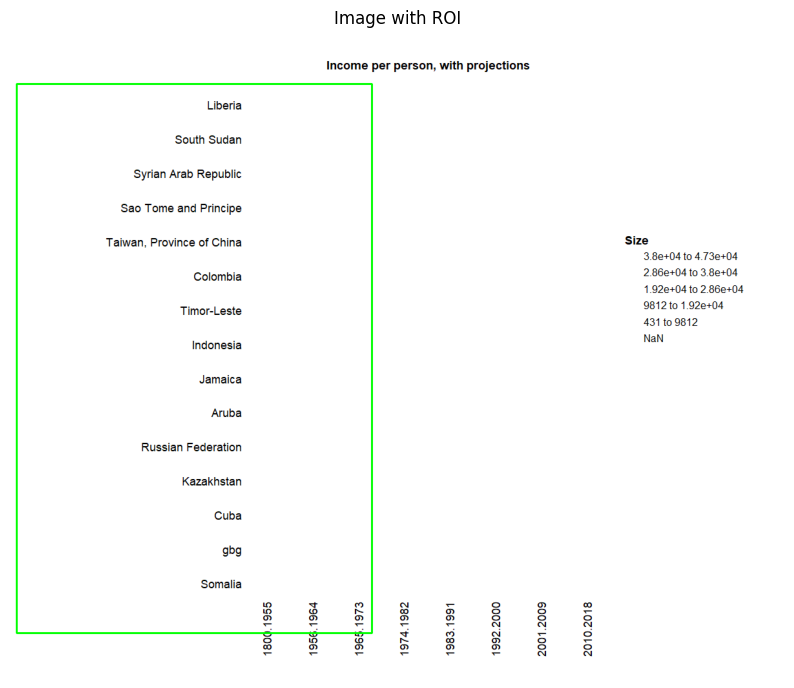

Extracted Text from ROI:
Liberia

South Sudan

Syrian Arab Republic

Sao Tome and Principe

Taiwan, Province of China

Colombia

Timor-Leste

Indonesia

Jamaica

Aruba

Russian Federation

Kazakhstan

Cuba

gbg

Somalia

1955

1964

1973




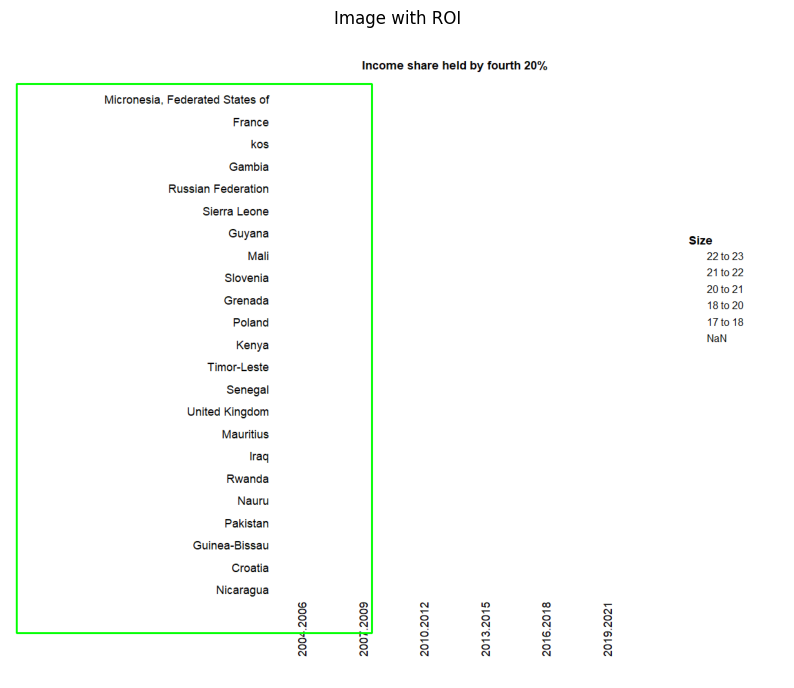

Extracted Text from ROI:
Micronesia, Federated States of
France

kos

Gambia
Russian Federation
Sierra Leone
Guyana

Mali

Slovenia
Grenada
Poland

Kenya
Timor-Leste
Senegal

United Kingdom
Mauritius

Iraq

Rwanda

Nauru

Pakistan
Guinea-Bissau
Croatia

Nicaragua

2006

2009




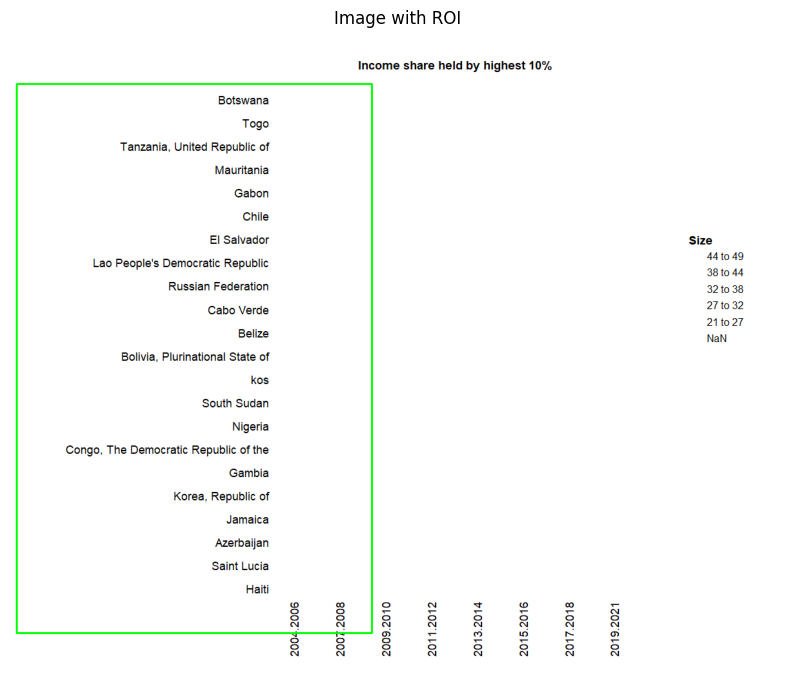

Extracted Text from ROI:
Botswana

Togo

Tanzania, United Republic of
Mauritania

Gabon

Chile

El Salvador

Lao People's Democratic Republic
Russian Federation

Cabo Verde

Belize

Bolivia, Plurinational State of
kos

South Sudan

Nigeria

Congo, The Democratic Republic of the
Gambia

Korea, Republic of

Jamaica

Azerbaijan

Saint Lucia

Haiti

2006

2008




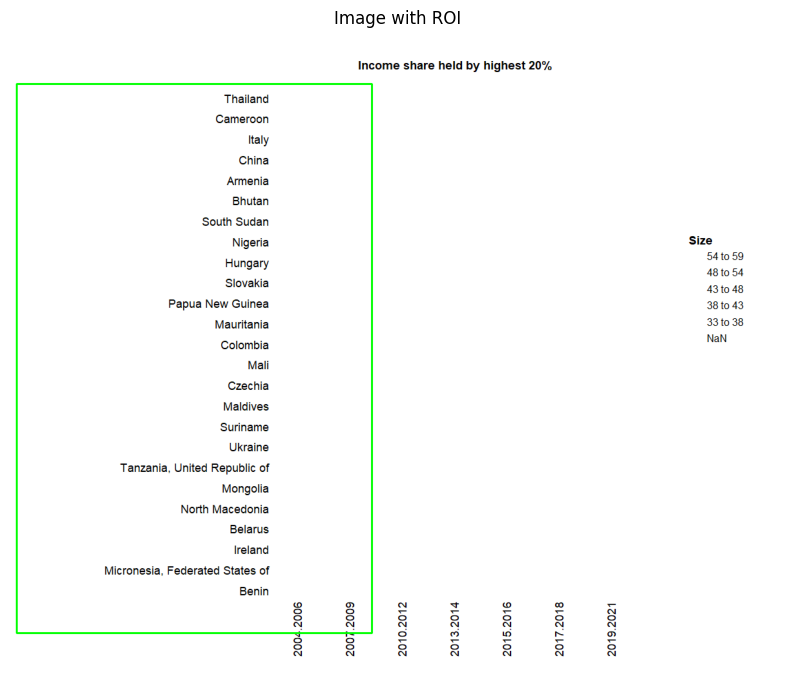

Extracted Text from ROI:
Thailand
Cameroon

Italy

China

Armenia

Bhutan

South Sudan
Nigeria

Hungary

Slovakia

Papua New Guinea
Mauritania
Colombia

Mali

Czechia

Maldives

Suriname

Ukraine

Tanzania, United Republic of
Mongolia

North Macedonia
Belarus

Ireland

Micronesia, Federated States of
Benin

2006

2009




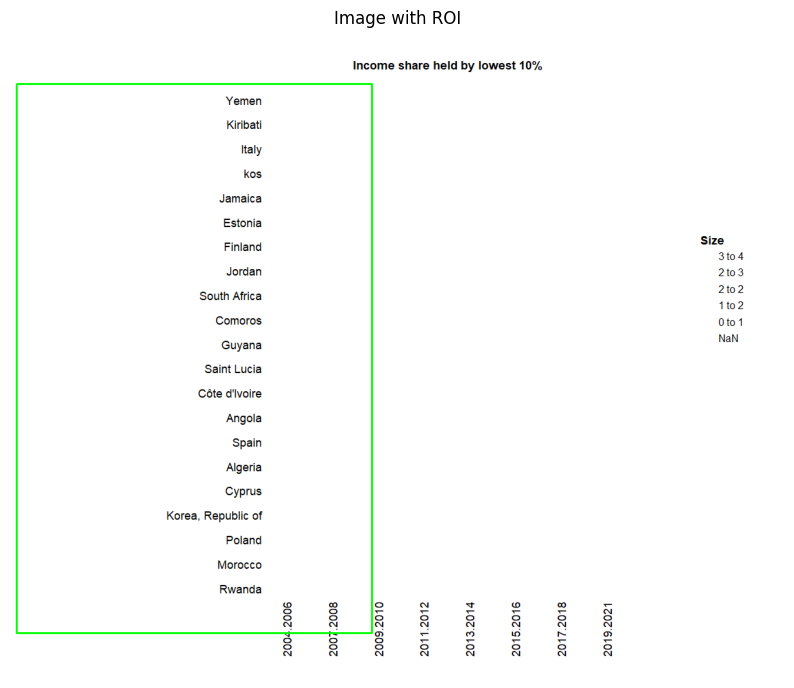

Extracted Text from ROI:
Yemen
Kiribati

Italy

kos
Jamaica
Estonia
Finland
Jordan
South Africa
Comoros
Guyana
Saint Lucia
Céte d'ivoire
Angola
Spain
Algeria
Cyprus
Korea, Republic of
Poland
Morocco

Rwanda

2006

2008




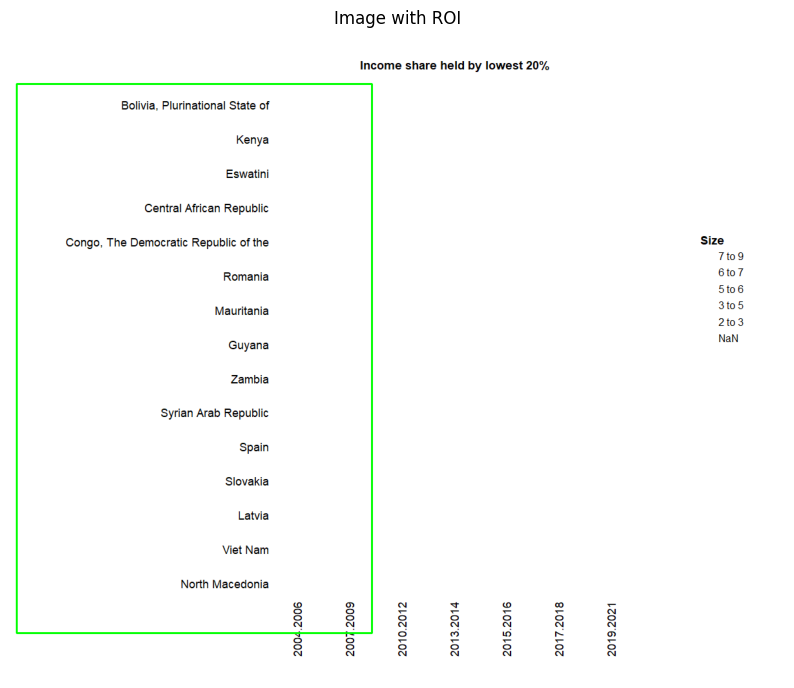

Extracted Text from ROI:
Bolivia, Plurinational State of

Kenya

Eswatini

Central African Republic

Congo, The Democratic Republic of the

Romania

Mauritania

Guyana

Zambia

Syrian Arab Republic

Spain

Slovakia

Latvia

Viet Nam

North Macedonia

2006

2009




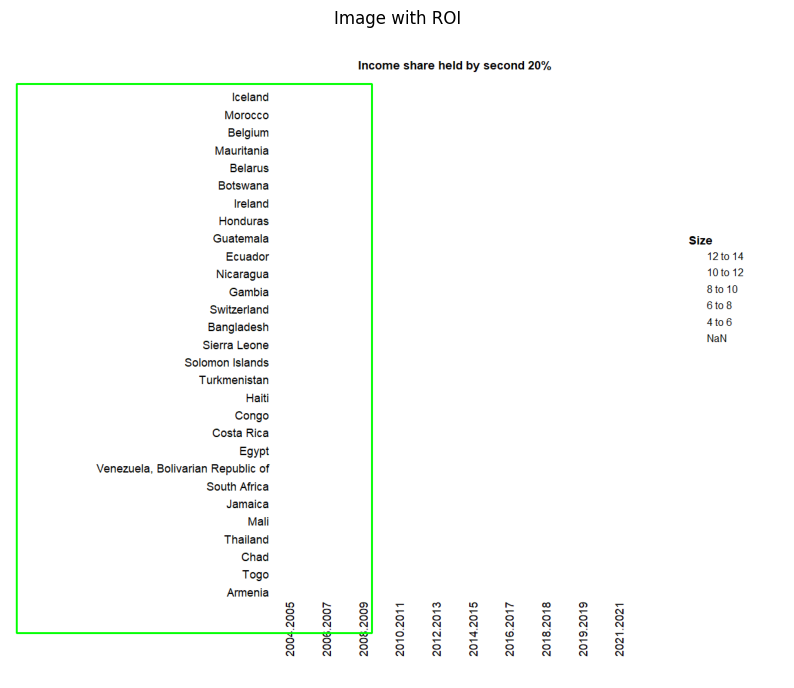

Extracted Text from ROI:
Iceland
Morocco
Belgium
Mauritania
Belarus
Botswana
Ireland
Honduras
Guatemala
Ecuador
Nicaragua
Gambia
Switzerland
Bangladesh
Sierra Leone
Solomon Islands
Turkmenistan
Haiti

Congo

Costa Rica
Egypt
Venezuela, Bolivarian Republic of
South Africa
Jamaica

Mali
Thailand
Chad

Togo
Armenia

2005

2007

2009




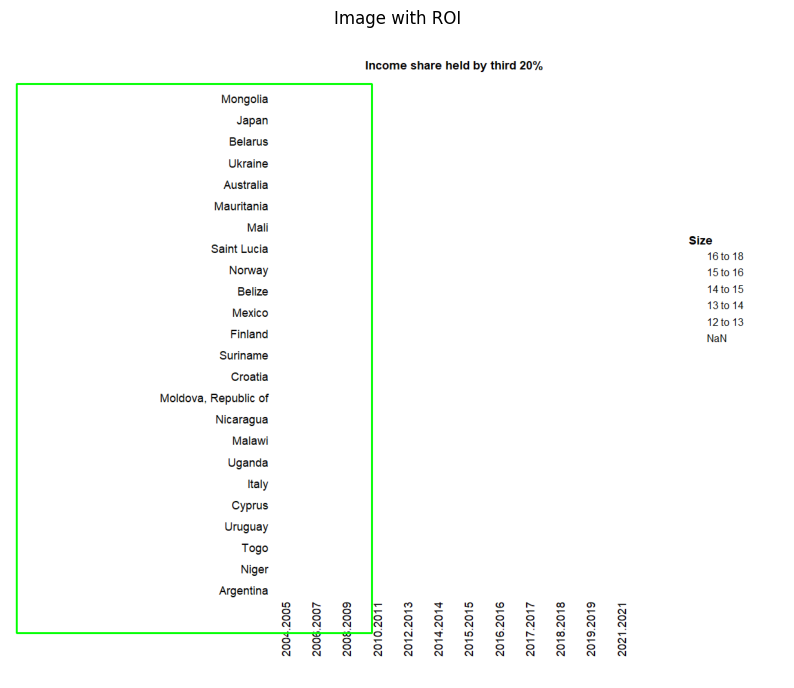

Extracted Text from ROI:
Mongolia
Japan
Belarus
Ukraine
Australia
Mauritania
Mali

Saint Lucia
Norway
Belize
Mexico
Finland
Suriname
Croatia
Moldova, Republic of
Nicaragua
Malawi
Uganda
Italy
Cyprus
Uruguay
Togo
Niger

Argentina

2005

2007

2009




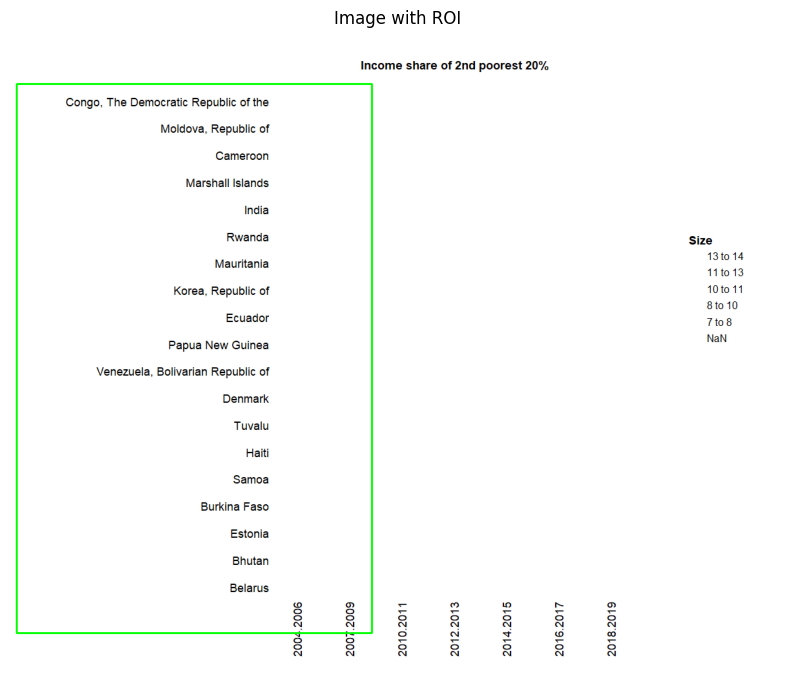

Extracted Text from ROI:
Congo, The Democratic Republic of the
Moldova, Republic of

Cameroon

Marshall Islands

India

Rwanda

Mauritania

Korea, Republic of

Ecuador

Papua New Guinea

Venezuela, Bolivarian Republic of
Denmark

Tuvalu

Haiti

Samoa

Burkina Faso

Estonia

Bhutan

Belarus

2006

2009




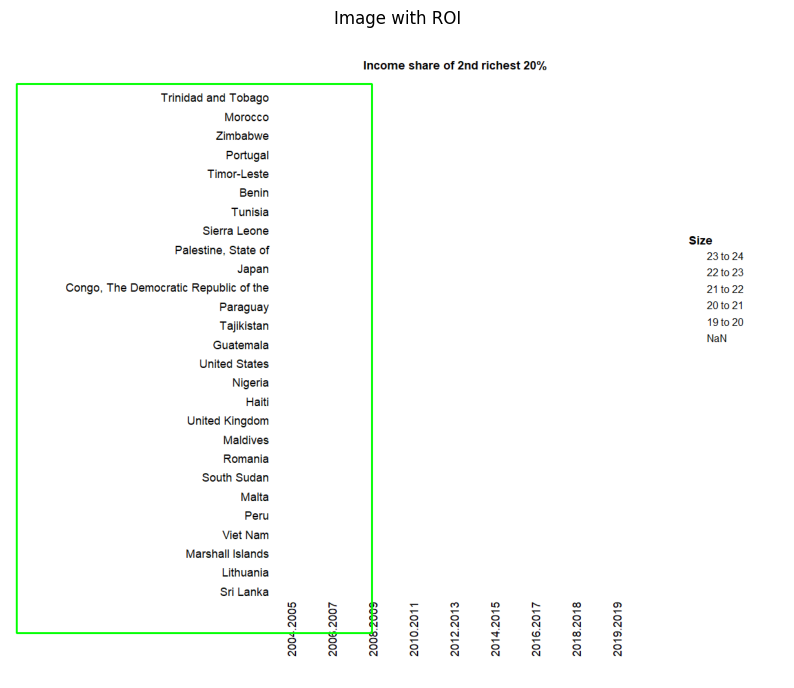

Extracted Text from ROI:
Trinidad and Tobago
Morocco
Zimbabwe
Portugal
Timor-Leste
Benin

Tunisia

Sierra Leone
Palestine, State of
Japan

Congo, The Democratic Republic of the
Paraguay
Tajikistan
Guatemala

United States
Nigeria

Haiti

United Kingdom
Maldives
Romania

South Sudan
Malta

Peru

Viet Nam
Marshall Islands
Lithuania

Sri Lanka

2005

2007




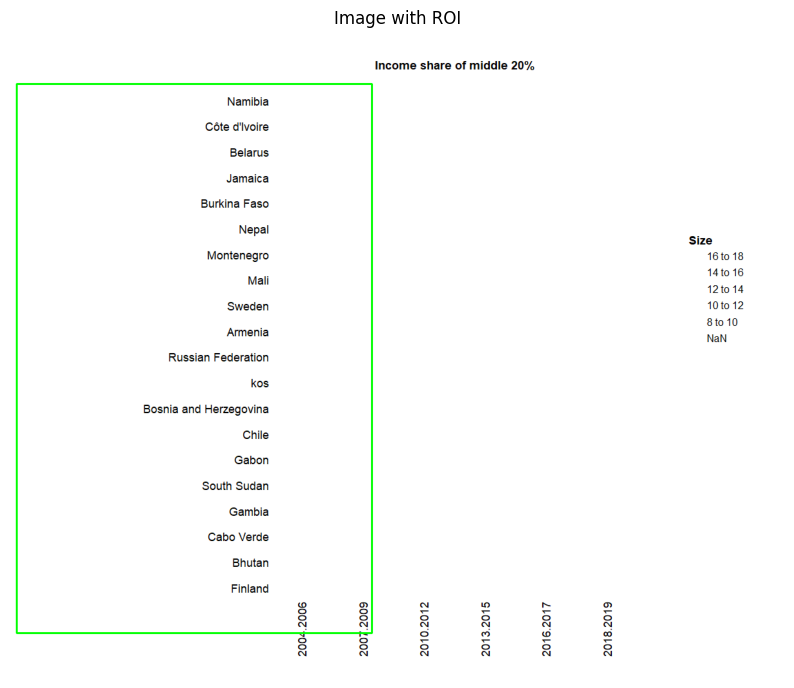

Extracted Text from ROI:
Namibia

Céte d'ivoire
Belarus

Jamaica

Burkina Faso
Nepal

Montenegro

Mali

Sweden

Armenia

Russian Federation
kos

Bosnia and Herzegovina
Chile

Gabon

South Sudan
Gambia

Cabo Verde
Bhutan

Finland

2006

2009




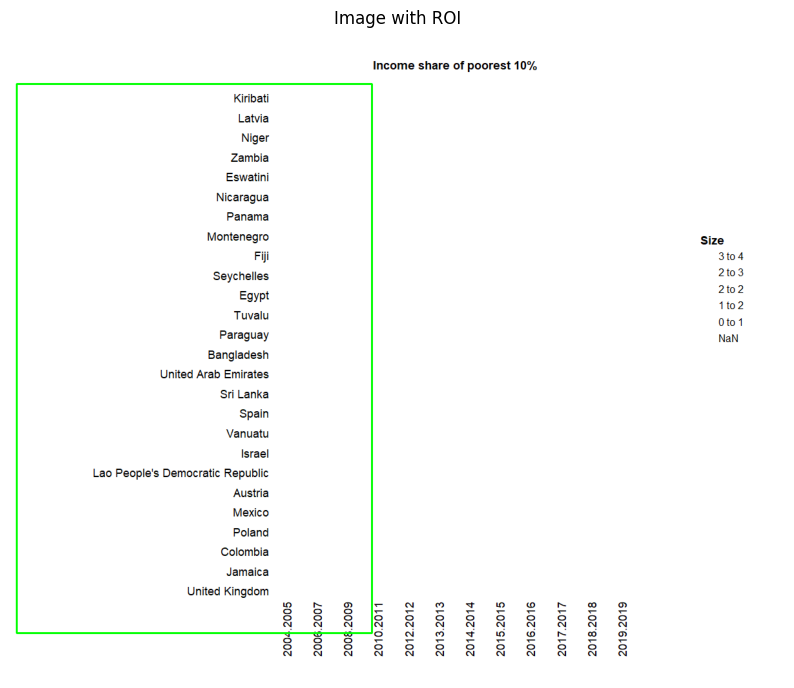

Extracted Text from ROI:
Kiribati

Latvia

Niger

Zambia
Eswatini
Nicaragua
Panama
Montenegro

Fiji

Seychelles
Egypt

Tuvalu
Paraguay
Bangladesh
United Arab Emirates
Sri Lanka
Spain

Vanuatu

Israel

Lao People's Democratic Republic
Austria

Mexico

Poland
Colombia
Jamaica

United Kingdom

2005

2007

2009




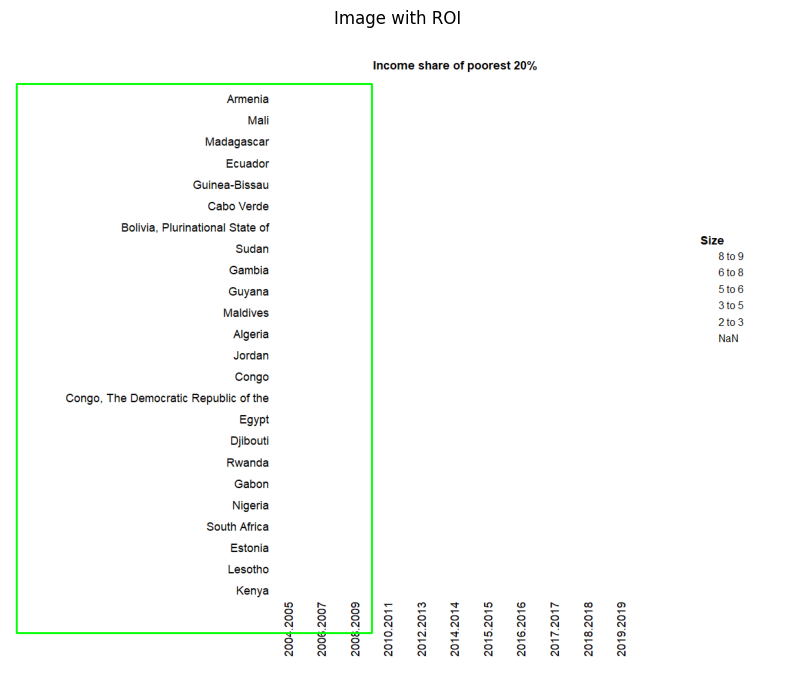

Extracted Text from ROI:
Armenia

Mali
Madagascar
Ecuador
Guinea-Bissau
Cabo Verde
Bolivia, Plurinational State of
Sudan
Gambia
Guyana
Maldives
Algeria

Jordan

Congo

Congo, The Democratic Republic of the
Egypt

Djibouti
Rwanda
Gabon

Nigeria

South Africa
Estonia
Lesotho

Kenya

2005

2007

2009




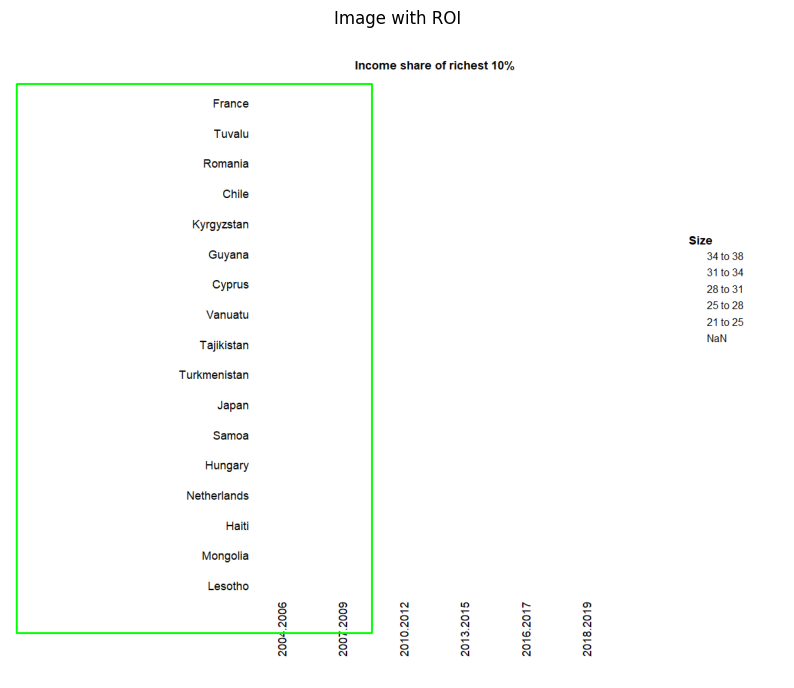

Extracted Text from ROI:
France
Tuvalu
Romania
Chile
Kyrgyzstan
Guyana
Cyprus
Vanuatu
Tajikistan
Turkmenistan
Japan
Samoa
Hungary
Netherlands
Haiti
Mongolia

Lesotho

2006

2009




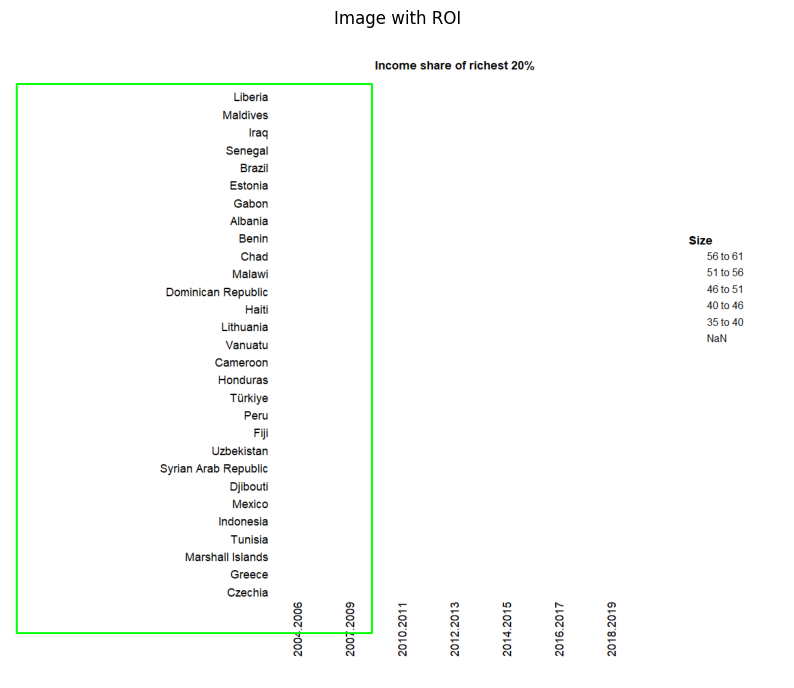

Extracted Text from ROI:
Liberia
Maldives

Iraq

Senegal

Brazil

Estonia

Gabon

Albania

Benin

Chad

Malawi
Dominican Republic
Haiti

Lithuania
Vanuatu
Cameroon
Honduras
Turkiye

Peru

Fiji

Uzbekistan
Syrian Arab Republic
Djibouti

Mexico
Indonesia
Tunisia
Marshall Islands
Greece

Czechia

2006

2009




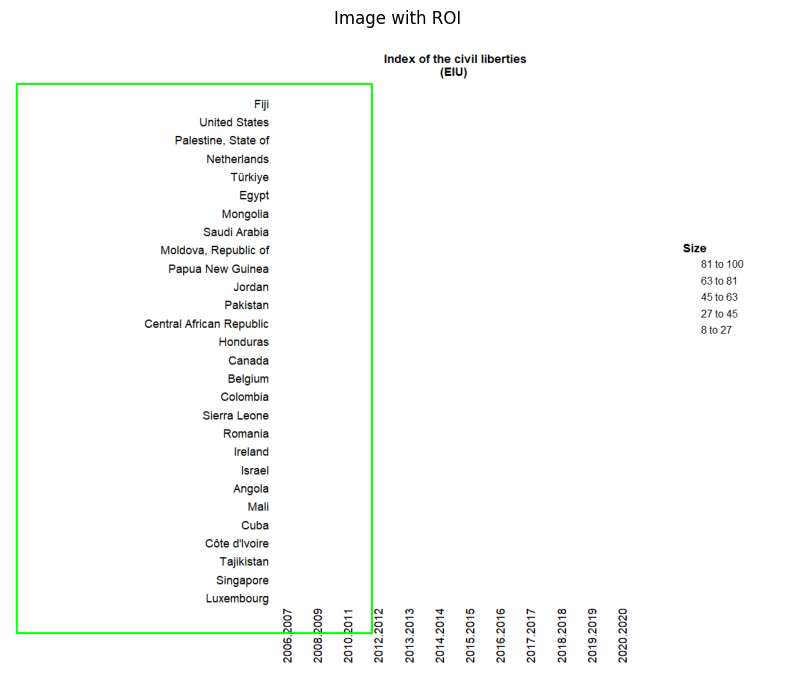

Extracted Text from ROI:
Fiji
United States
Palestine, State of
Netherlands

Turkiye

Egypt

Mongolia

Saudi Arabia
Moldova, Republic of
Papua New Guinea
Jordan

Pakistan

Central African Republic
Honduras

Canada

Belgium

Colombia

Sierra Leone
Romania

Ireland

Israel

Angola

Mali

Cuba

Céte d'ivoire
Tajikistan

Singapore
Luxembourg

2007
2009
2011




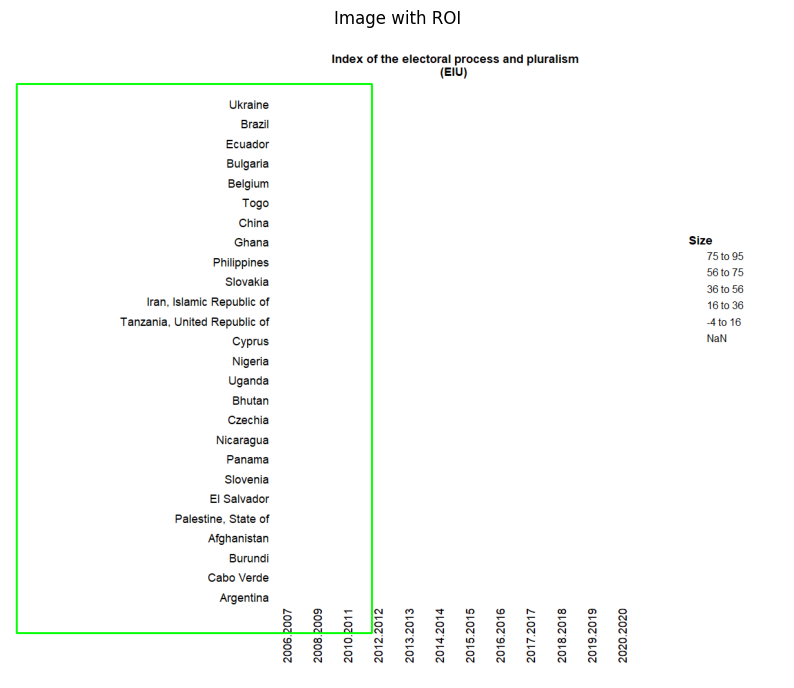

Extracted Text from ROI:
Ukraine

Brazil

Ecuador

Bulgaria

Belgium

Togo

China

Ghana
Philippines
Slovakia

Iran, Islamic Republic of
Tanzania, United Republic of
Cyprus

Nigeria

Uganda

Bhutan

Czechia
Nicaragua
Panama

Slovenia

El Salvador
Palestine, State of
Afghanistan
Burundi

Cabo Verde
Argentina

2007
2009
2011




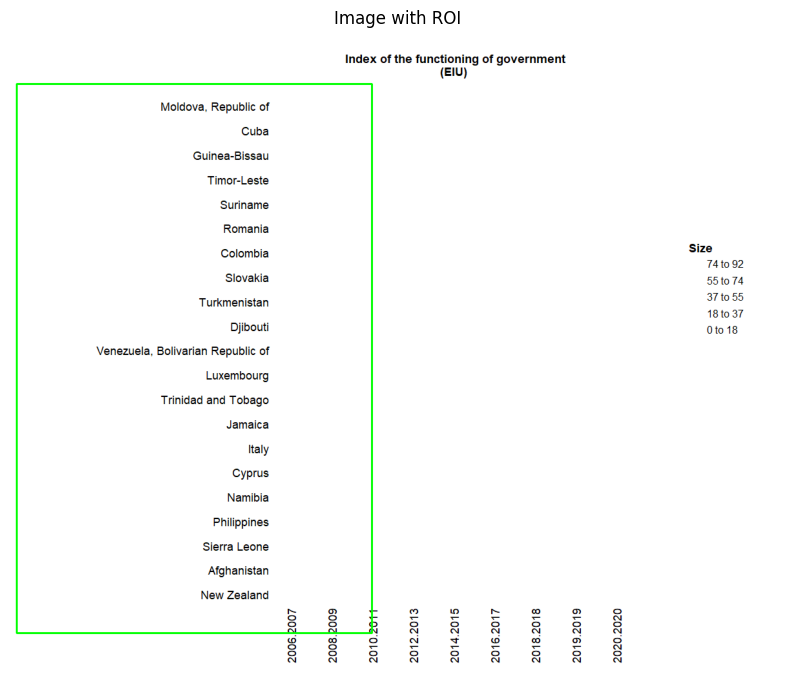

Extracted Text from ROI:
Moldova, Republic of
Cuba

Guinea-Bissau
Timor-Leste
Suriname

Romania

Colombia

Slovakia
Turkmenistan
Djibouti

Venezuela, Bolivarian Republic of
Luxembourg
Trinidad and Tobago
Jamaica

Italy

Cyprus

Namibia

Philippines

Sierra Leone
Afghanistan

New Zealand

2007

2009




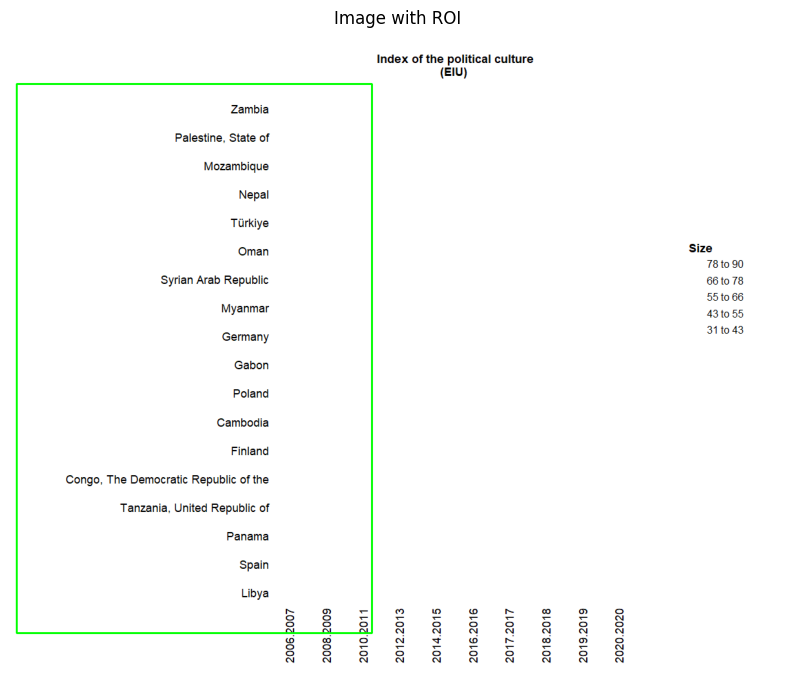

Extracted Text from ROI:
Zambia

Palestine, State of
Mozambique

Nepal

Turkiye

Oman

Syrian Arab Republic
Myanmar

Germany

Gabon

Poland

Cambodia

Finland

Congo, The Democratic Republic of the
Tanzania, United Republic of
Panama

Spain

Libya

2007

2009

2011




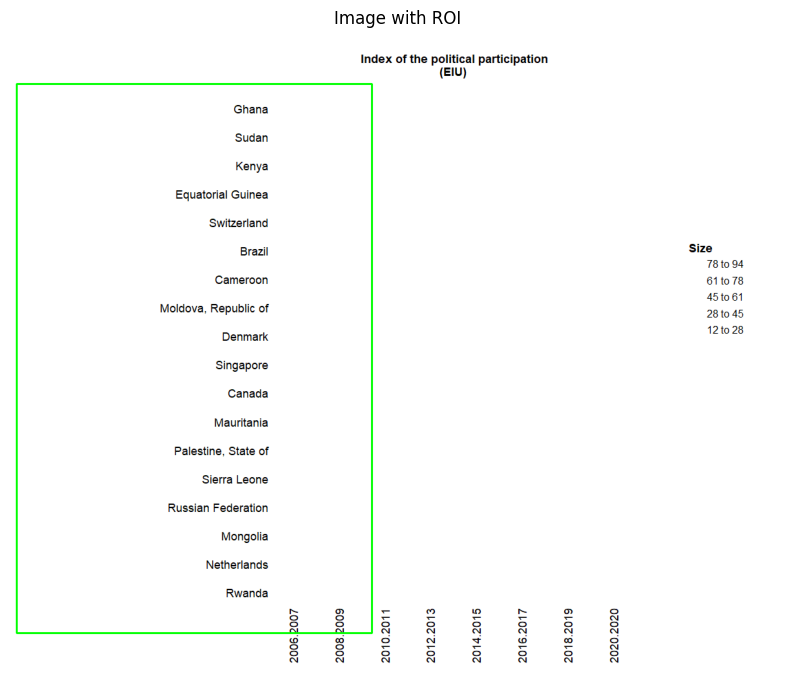

Extracted Text from ROI:
Ghana

Sudan

Kenya

Equatorial Guinea
Switzerland

Brazil

Cameroon
Moldova, Republic of
Denmark
Singapore

Canada

Mauritania
Palestine, State of
Sierra Leone
Russian Federation
Mongolia
Netherlands

Rwanda

2007

2009




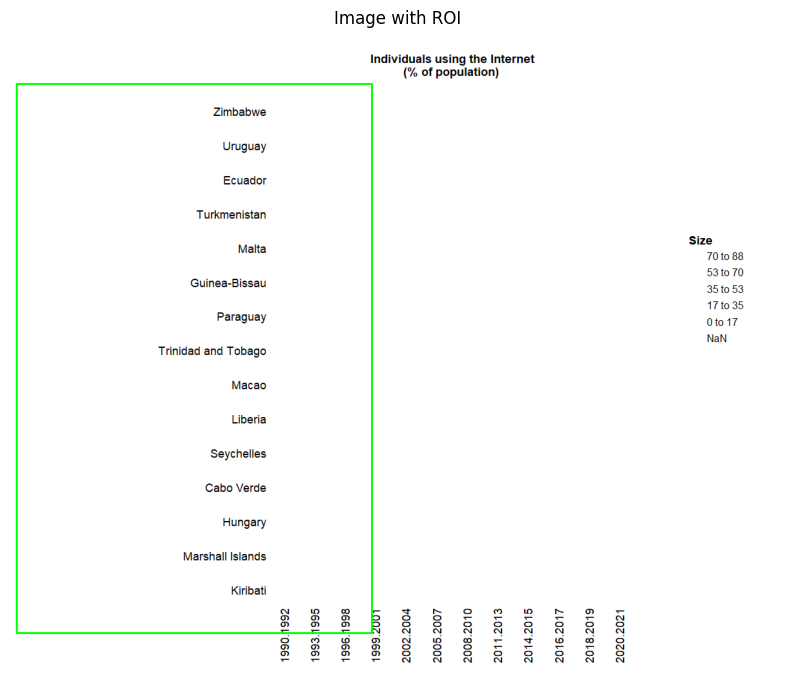

Extracted Text from ROI:
Zimbabwe

Uruguay

Ecuador

Turkmenistan

Malta

Guinea-Bissau

Paraguay

Trinidad and Tobago

Macao

Liberia

Seychelles

Cabo Verde

Hungary

Marshall Islands

Kiribati

992
995
998




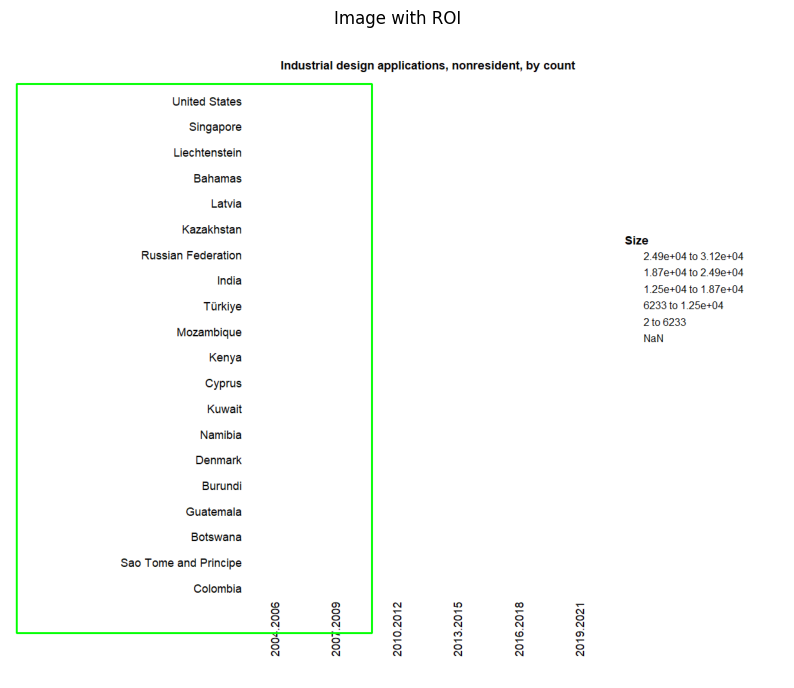

Extracted Text from ROI:
United States
Singapore
Liechtenstein
Bahamas

Latvia

Kazakhstan
Russian Federation
India

Turkiye
Mozambique
Kenya

Cyprus

Kuwait

Namibia

Denmark

Burundi

Guatemala
Botswana

Sao Tome and Principe

Colombia

2006

2009




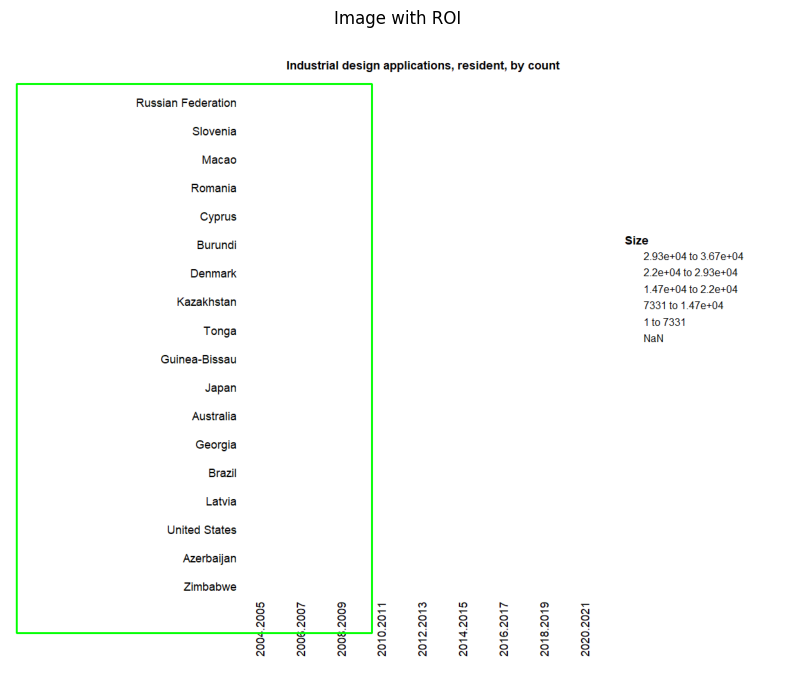

Extracted Text from ROI:
Russian Federation
Slovenia
Macao
Romania
Cyprus
Burundi
Denmark
Kazakhstan
Tonga
Guinea-Bissau
Japan
Australia
Georgia

Brazil

Latvia

United States
Azerbaijan

Zimbabwe

2005

2007

2009




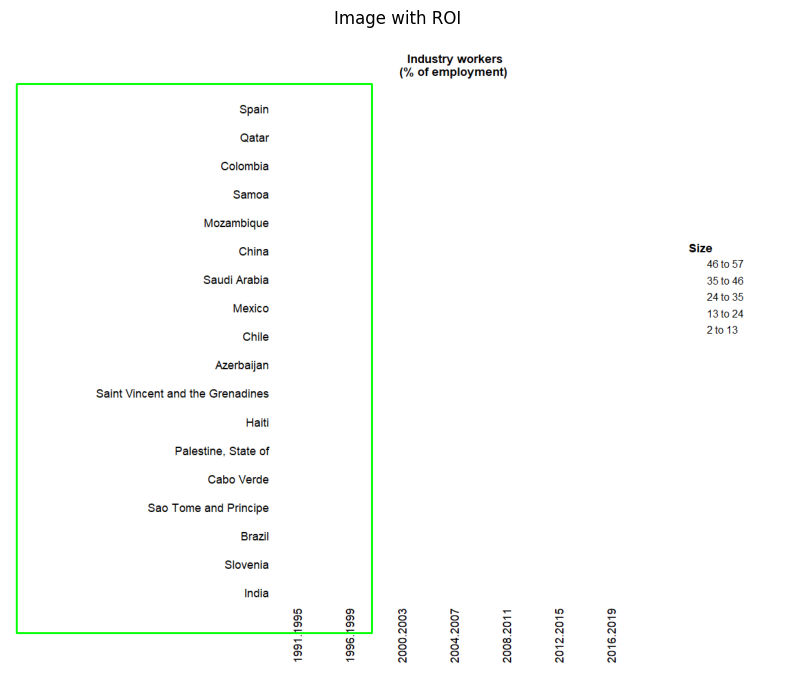

Extracted Text from ROI:
Spain

Qatar

Colombia

Samoa

Mozambique

China

Saudi Arabia

Mexico

Chile

Azerbaijan

Saint Vincent and the Grenadines
Haiti

Palestine, State of
Cabo Verde

Sao Tome and Principe
Brazil

Slovenia

India

995

999




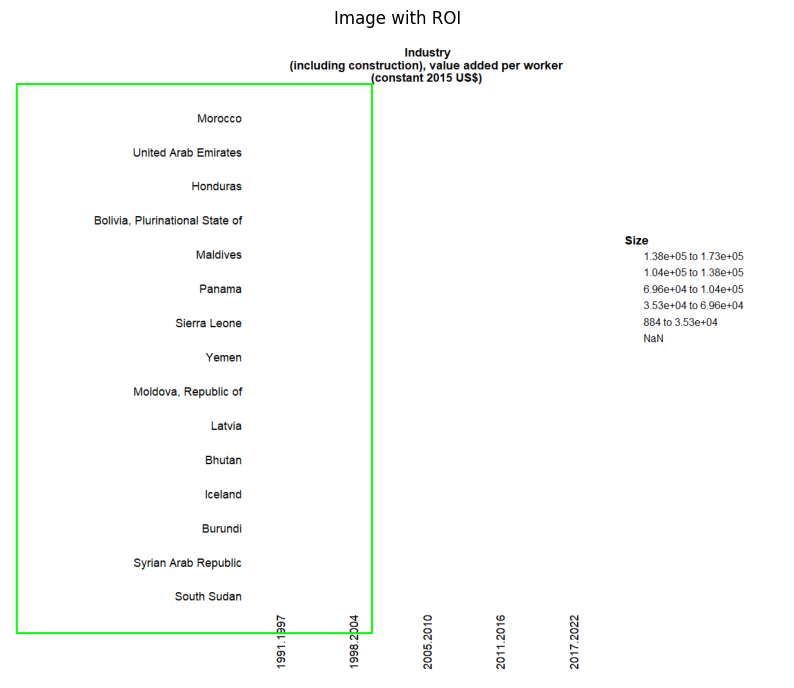

Extracted Text from ROI:
Morocco

United Arab Emirates

Honduras

Bolivia, Plurinational State of

Maldives

Panama

Sierra Leone

Yemen

Moldova, Republic of

Latvia

Bhutan

Iceland

Burundi

Syrian Arab Republic

South Sudan

397

04




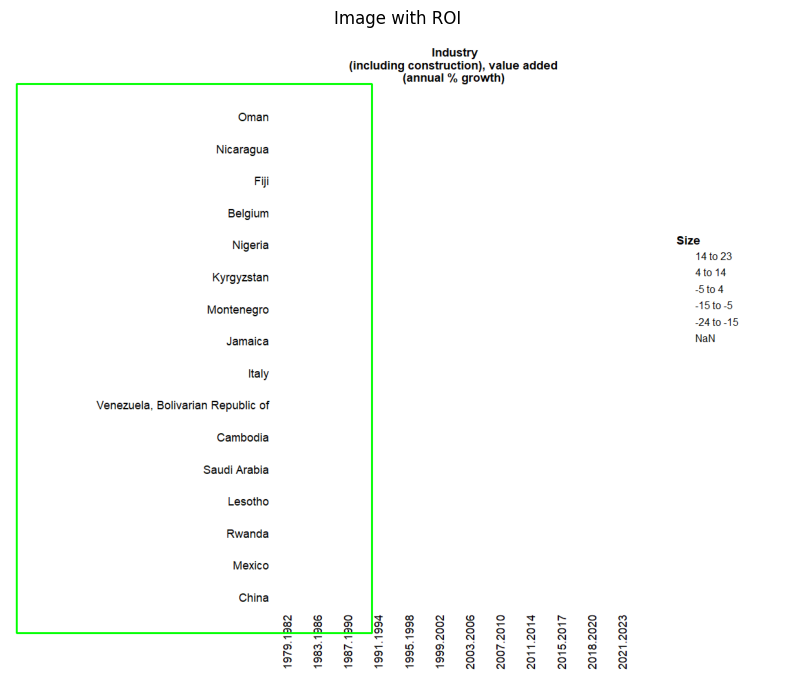

Extracted Text from ROI:
Oman
Nicaragua
Fiji

Belgium
Nigeria
Kyrgyzstan
Montenegro
Jamaica
Italy
Venezuela, Bolivarian Republic of
Cambodia
Saudi Arabia
Lesotho
Rwanda
Mexico

China

382
386
390




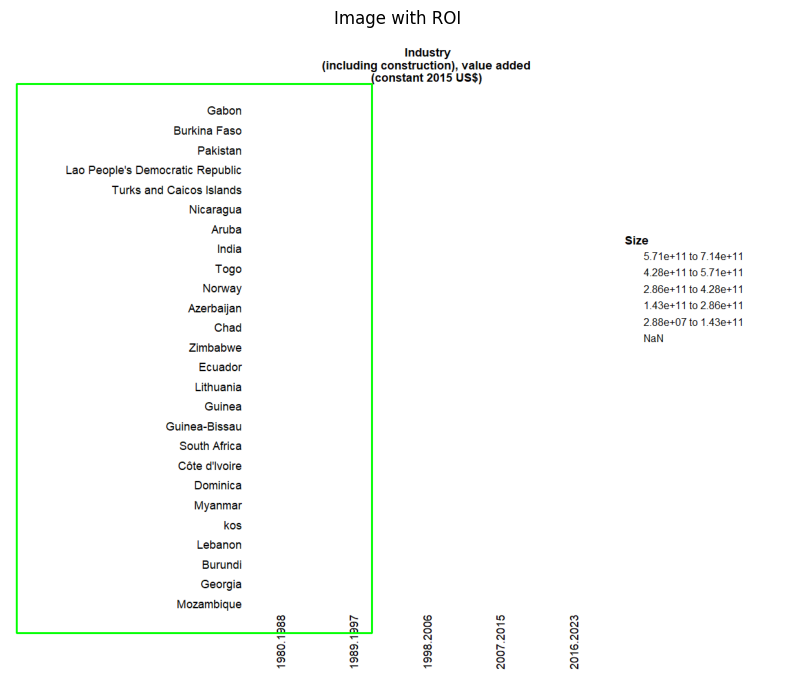

Extracted Text from ROI:
Gabon
Burkina Faso
Pakistan

Lao People's Democratic Republic
Turks and Caicos Islands
Nicaragua
Aruba

India

Togo

Norway
Azerbaijan
Chad
Zimbabwe
Ecuador
Lithuania
Guinea
Guinea-Bissau
South Africa
Céte d'ivoire
Dominica
Myanmar

kos

Lebanon
Burundi
Georgia
Mozambique

388

397




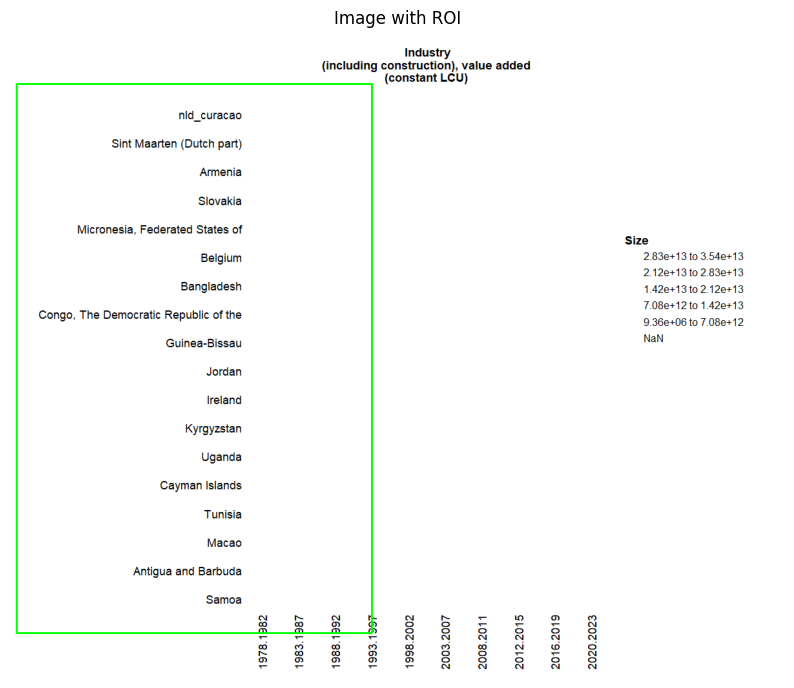

Extracted Text from ROI:
nid_curacao

Sint Maarten (Dutch part)
Armenia

Slovakia

Micronesia, Federated States of
Belgium

Bangladesh

Congo, The Democratic Republic of the
Guinea-Bissau

Jordan

Ireland

Kyrgyzstan

Uganda

Cayman Islands

Tunisia

Macao

Antigua and Barbuda

Samoa

382

387

392




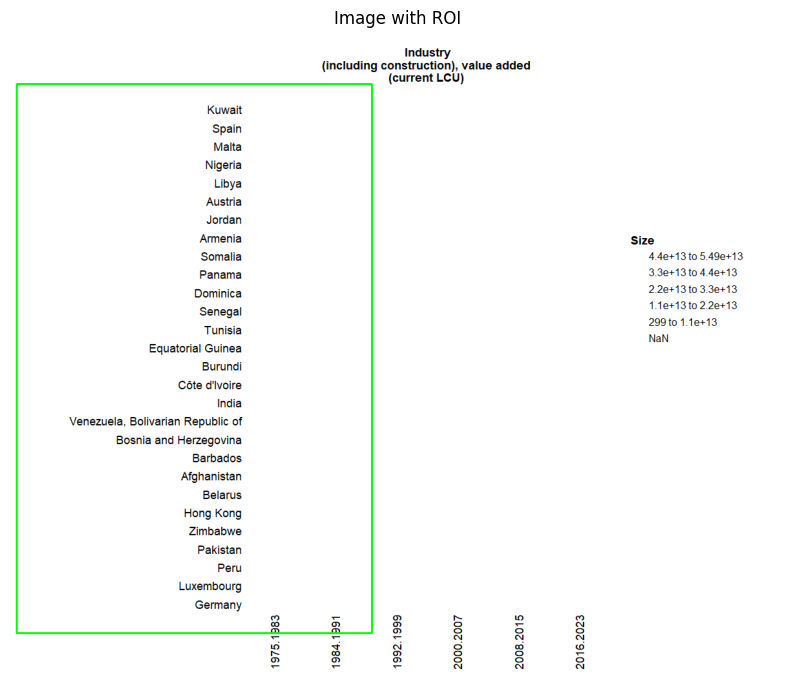

Extracted Text from ROI:
Kuwait

Spain

Malta

Nigeria

Libya

Austria

Jordan

Armenia

Somalia

Panama
Dominica
Senegal

Tunisia
Equatorial Guinea
Burundi

Céte d'ivoire

India

Venezuela, Bolivarian Republic of
Bosnia and Herzegovina
Barbados
Afghanistan
Belarus

Hong Kong
Zimbabwe
Pakistan

Peru

Luxembourg
Germany

383

391




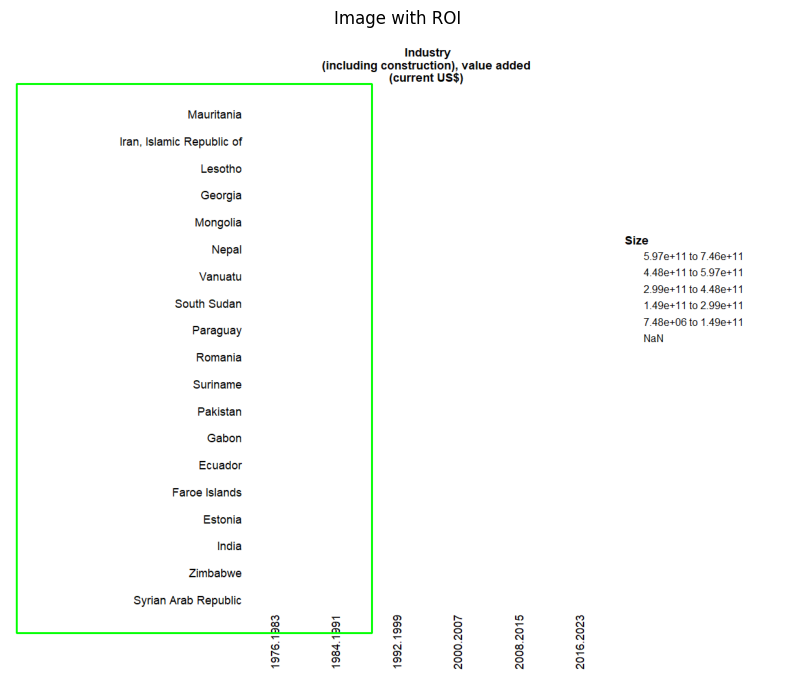

Extracted Text from ROI:
Mauritania
Iran, Islamic Republic of
Lesotho
Georgia
Mongolia
Nepal
Vanuatu
South Sudan
Paraguay
Romania
Suriname
Pakistan
Gabon
Ecuador
Faroe Islands
Estonia

India
Zimbabwe

Syrian Arab Republic

383

391




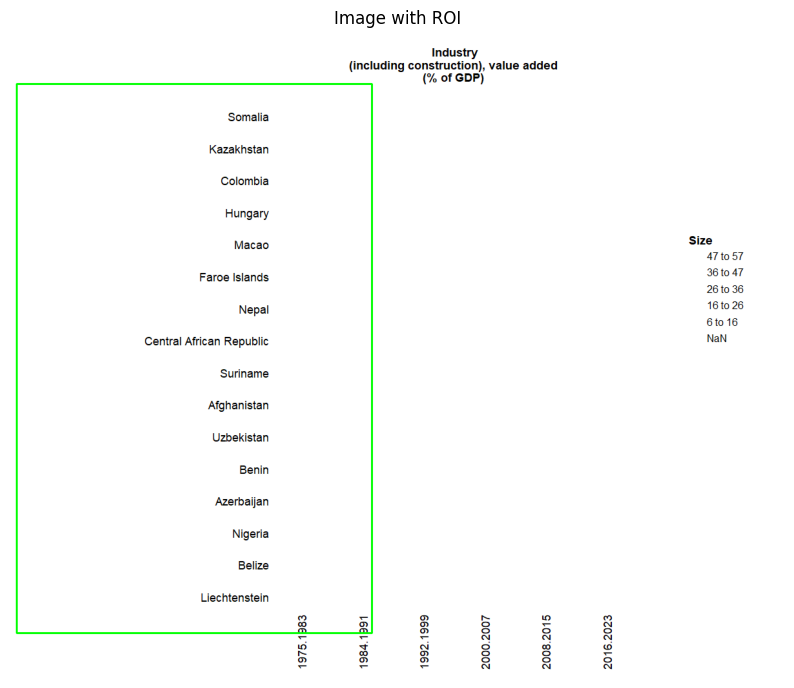

Extracted Text from ROI:
Somalia
Kazakhstan
Colombia
Hungary
Macao

Faroe Islands
Nepal
Central African Republic
Suriname
Afghanistan
Uzbekistan
Benin
Azerbaijan
Nigeria
Belize

Liechtenstein

383

991




KeyboardInterrupt: 

In [30]:
import cv2
import pytesseract
import matplotlib.pyplot as plt
import os

# Path to the Tesseract executable
pytesseract.pytesseract.tesseract_cmd = r'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

# Load the image
input_dir = 'D:\\encoder-tool\\filtered-contours'

for filename in os.listdir(input_dir):
    if filename.endswith('.png'):  # Process only PNG files
        image_path = os.path.join(input_dir, filename)
        image = cv2.imread(image_path)

        # Define the region of interest (ROI)
        # (x, y, width, height)
        roi = (10, 80, 550, 850)

        # Draw a rectangle around the ROI on the original image
        x, y, w, h = roi
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Display the image with the ROI using matplotlib
        plt.figure(figsize=(10, 10))
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title("Image with ROI")
        plt.axis('off')  # Hide the axis
        plt.show()

        # Crop the image to the ROI
        cropped_image = image[y:y+h, x:x+w]

        # Convert the cropped image to grayscale
        gray_cropped = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)

        # Use Tesseract to extract text from the cropped region
        text = pytesseract.image_to_string(gray_cropped)

        print("Extracted Text from ROI:")
        print(text)

## Extract Values from Legend

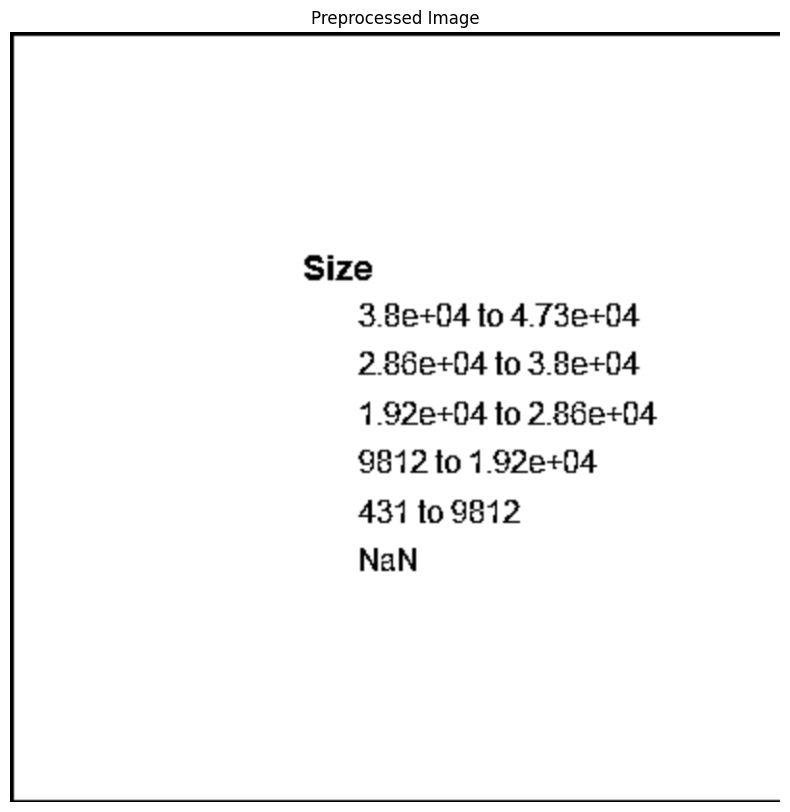

Extracted Text from ROI:
Size
3.8e+04 to 4.73e+04
2.86e+04 to 3.8e+04
1.92e+04 to 2.86e+04
9812 to 1.92e+04
431 to 9812
NaN



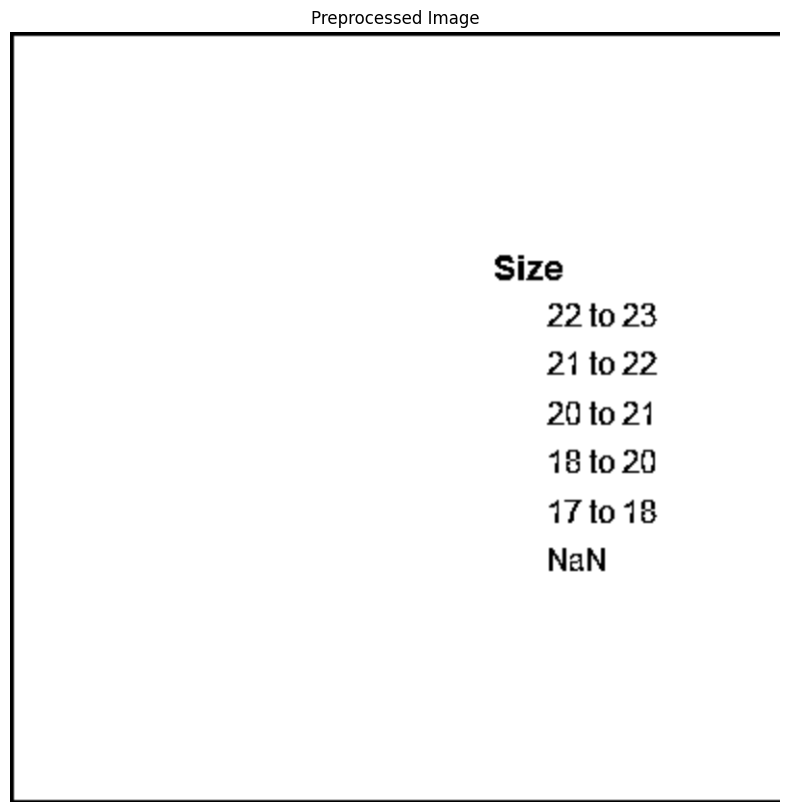

Extracted Text from ROI:
Size
22 to 23
21 to 22
20 to 21
18 to 20
171018
NaN



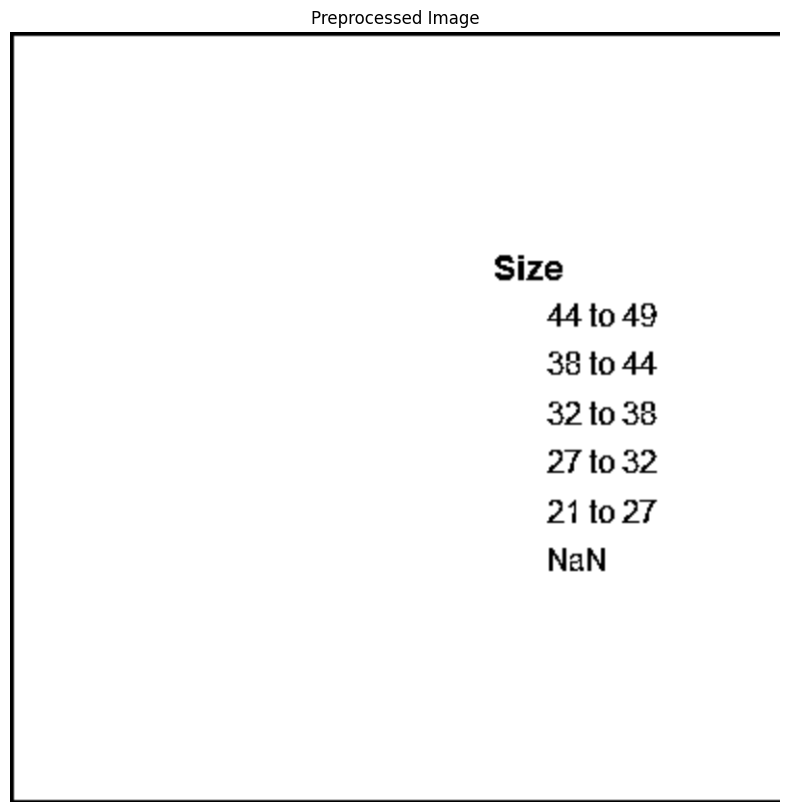

Extracted Text from ROI:
Size
44 to 49
38 to 44
32 to 38
27 to 32
21 to27
NaN



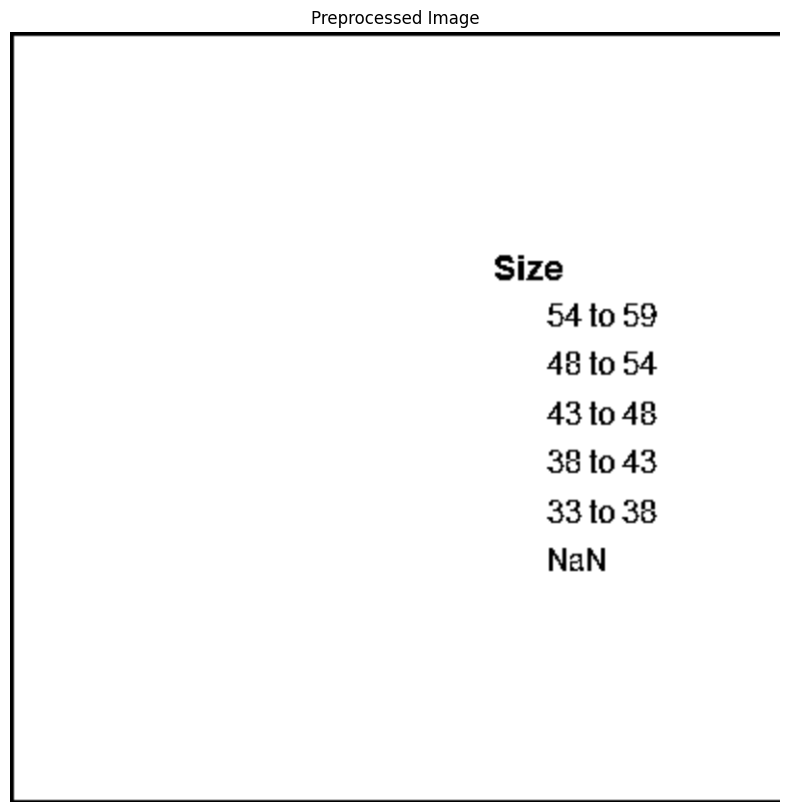

Extracted Text from ROI:
Size
54 to 59
48 to 54
43 to 48
38 to 43
33 to 38
NaN



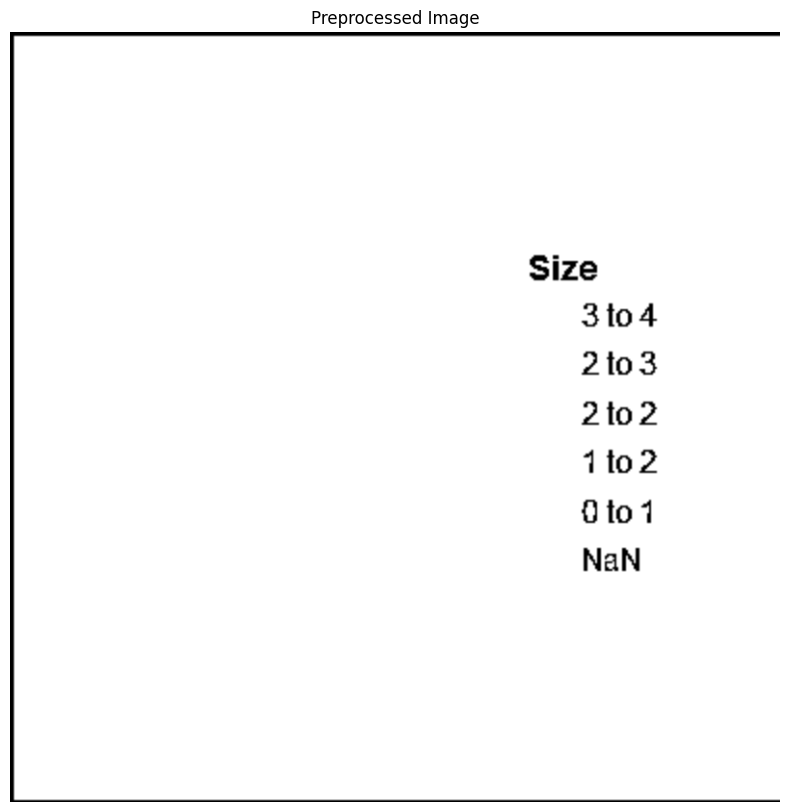

Extracted Text from ROI:
Size
3to4
2to3
2to2
1to2
Oto1
NaN



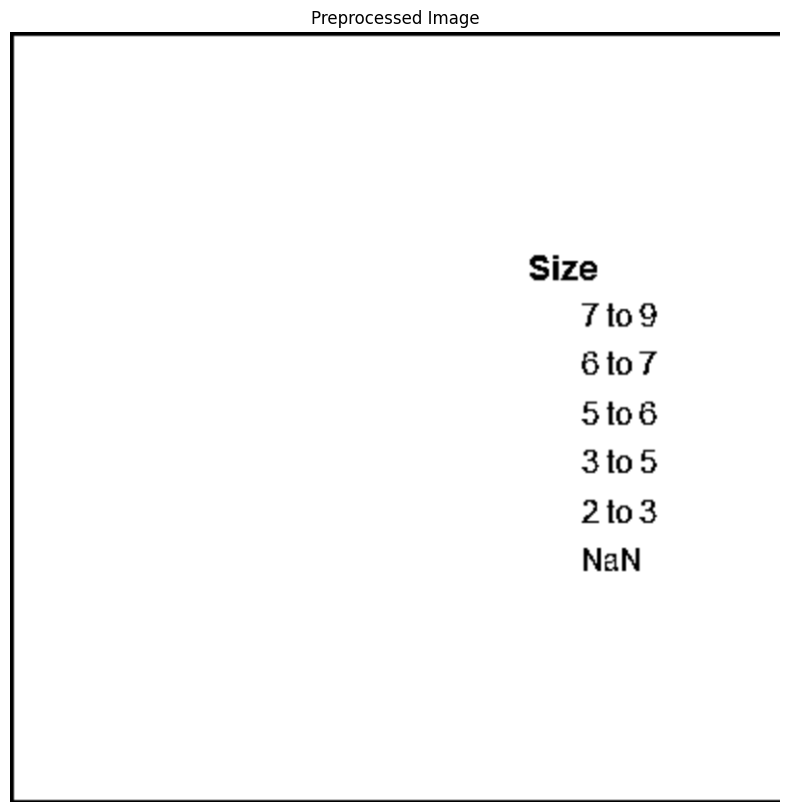

Extracted Text from ROI:
Size
7to9
6to7
5to8
3to5
2to3
NaN



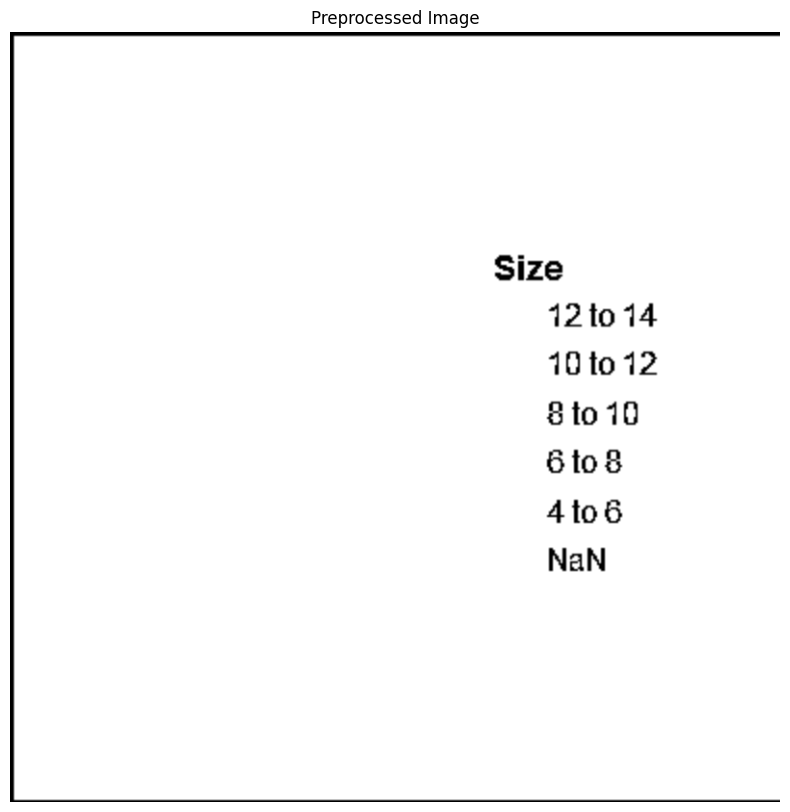

Extracted Text from ROI:
Size
12to 14
10 to 12
8to10
6to8
4to8
NaN



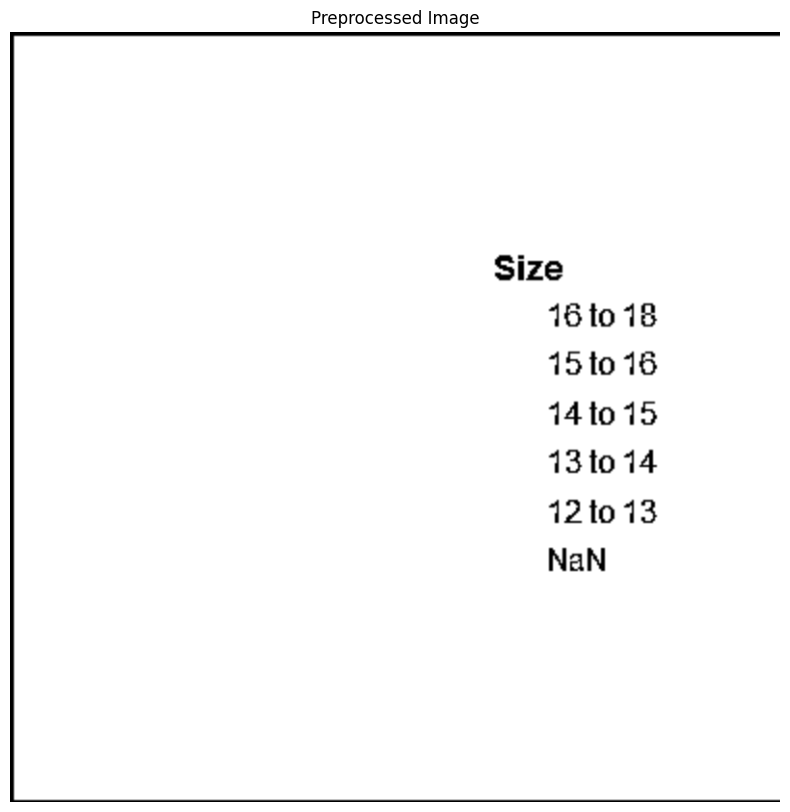

Extracted Text from ROI:
Size
16 to 18
151016
141015
13to 14
121013
NaN



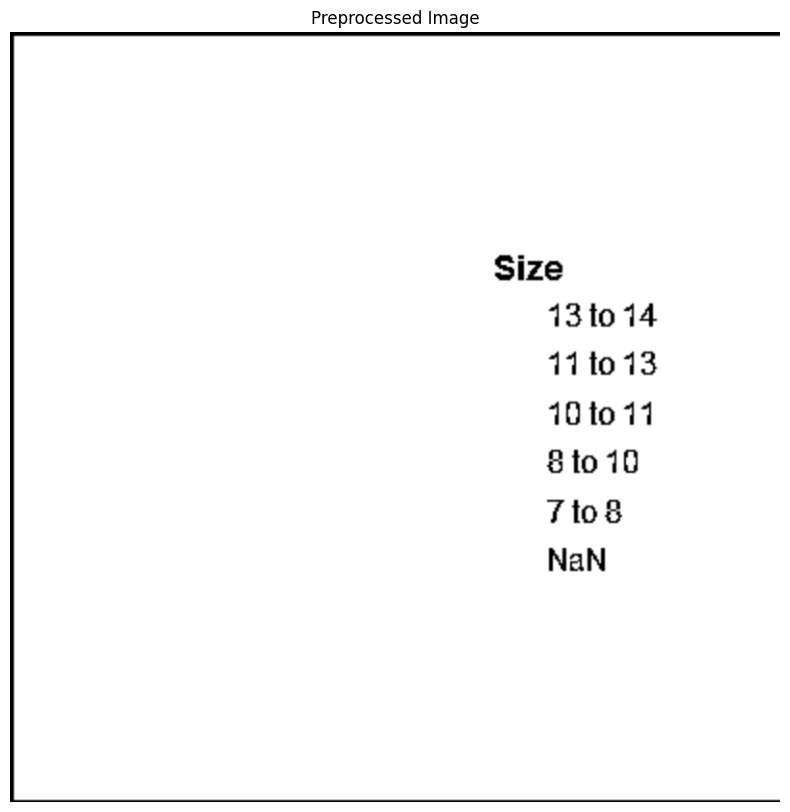

Extracted Text from ROI:
Size
13to 14
111013
10to 14
8to10
7tos
NaN



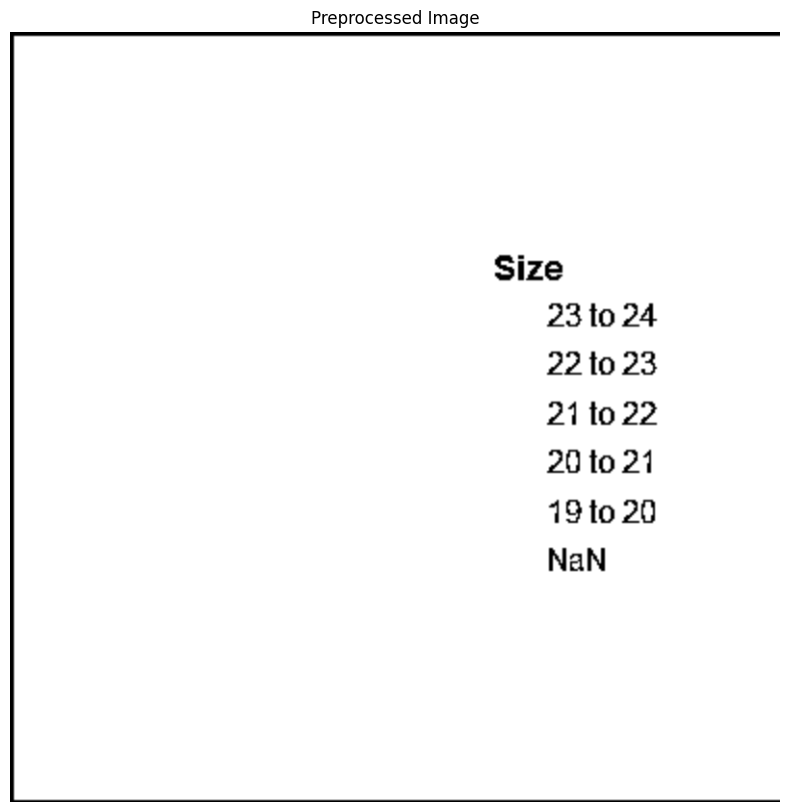

Extracted Text from ROI:
Size
23 to 24
22 to 23
21 to 22
20 to 21
19 to 20
NaN



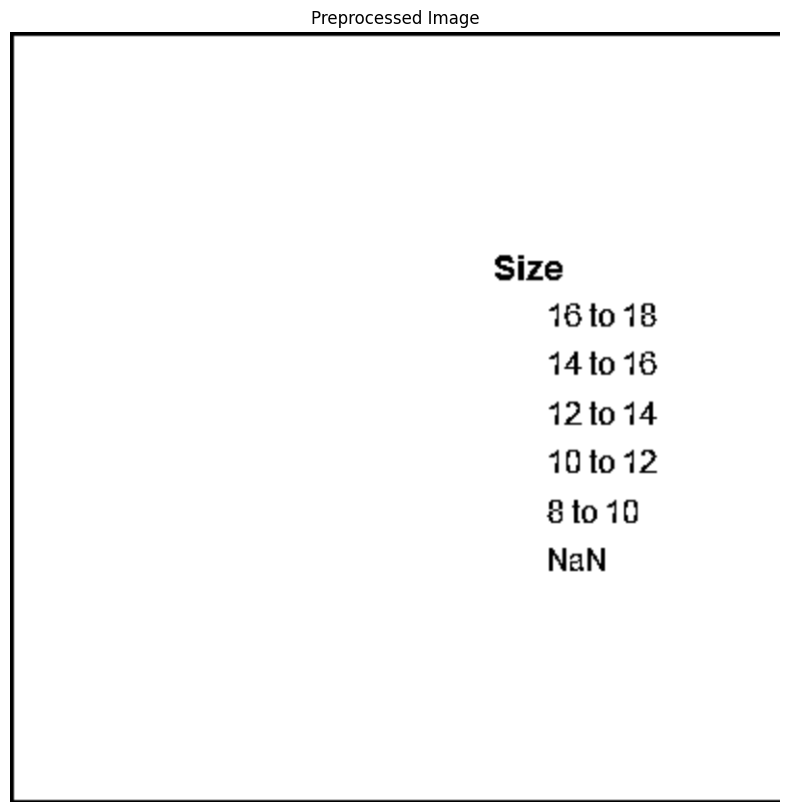

Extracted Text from ROI:
Size
16 to 18
1410 16
12to 14
10 to 12
8to10
NaN



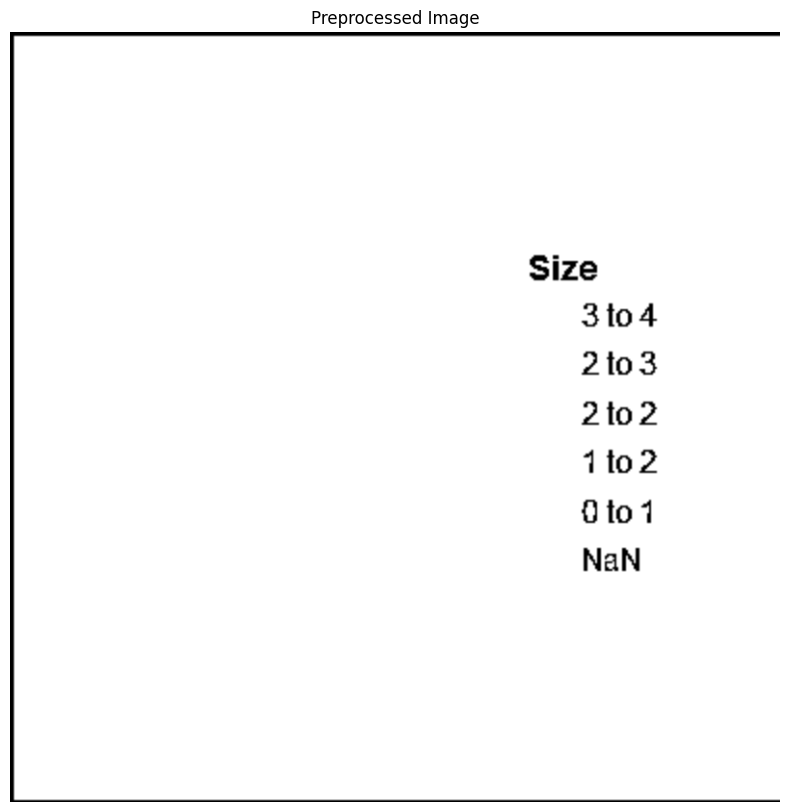

Extracted Text from ROI:
Size
3to4
2to3
2to2
1to2
Oto1
NaN



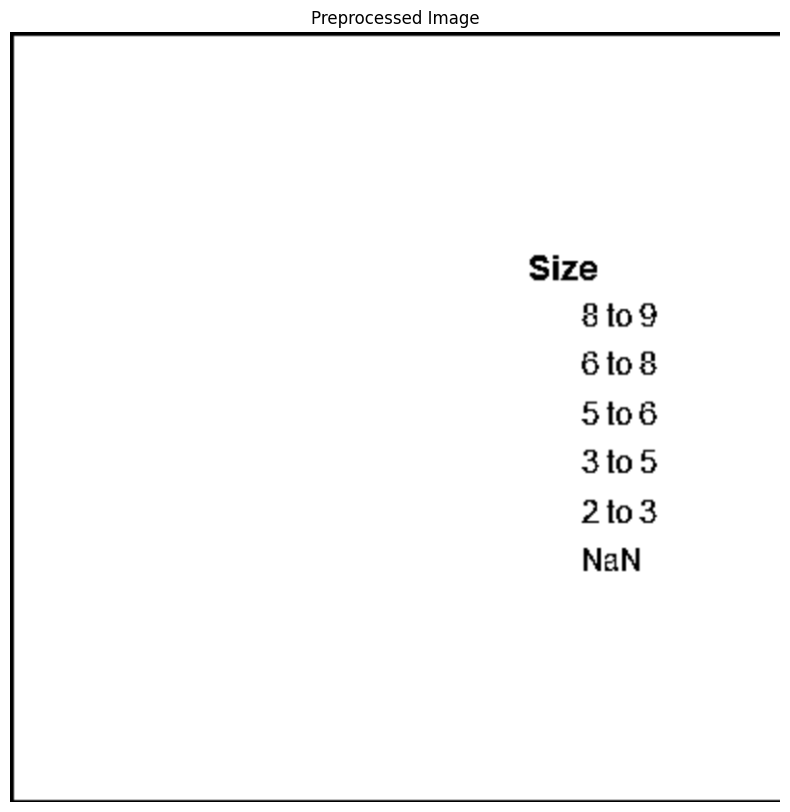

Extracted Text from ROI:
Size
sto
6to8
5to8
3to5
2to3
NaN



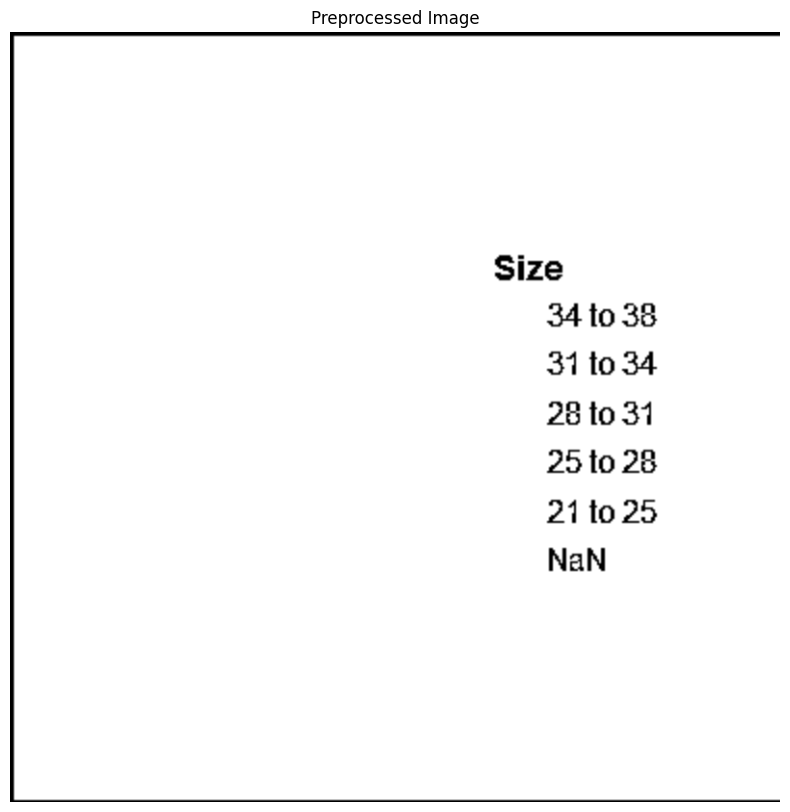

Extracted Text from ROI:
Size
34 to 38
31 to 34
28 to 31
25 to 28
211025
NaN



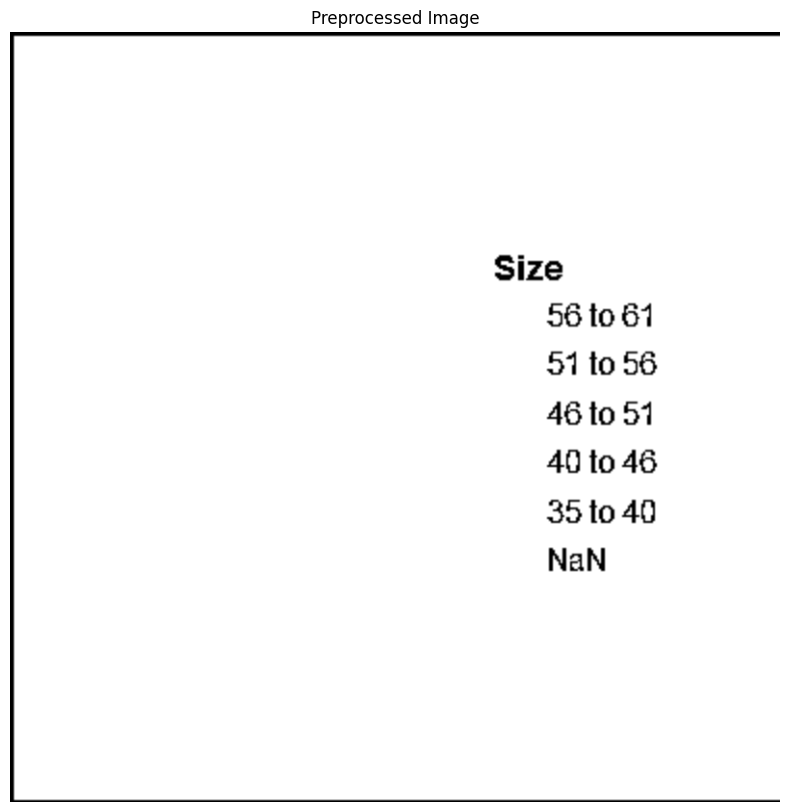

Extracted Text from ROI:
Size
56 to 61
51 to 56
46 to 51
40 to 46
35 to 40
NaN



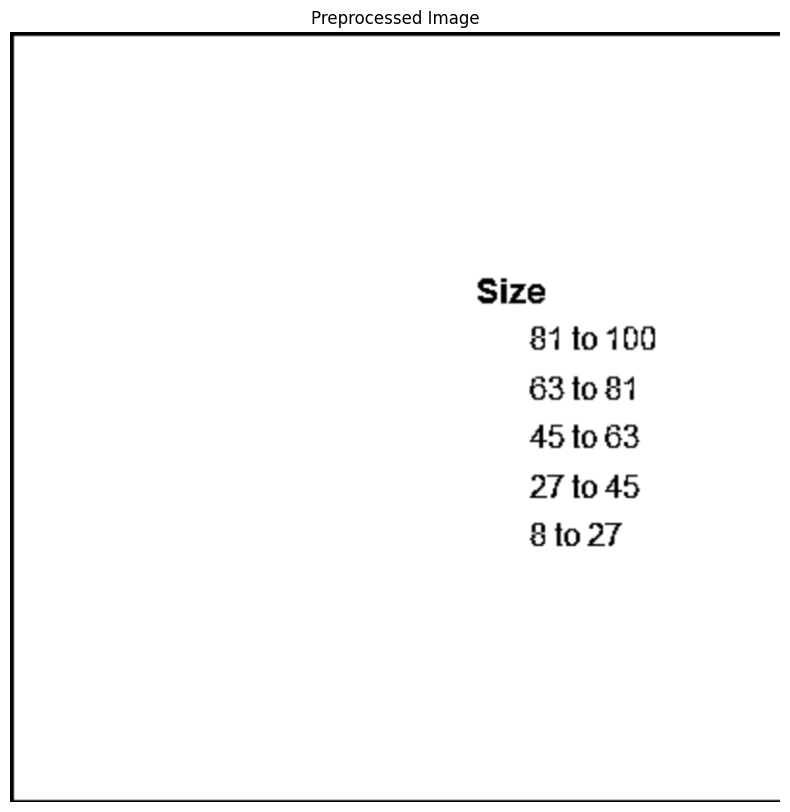

Extracted Text from ROI:
Size
871 to 100
63 to 81
45 to 63
271045
8to27



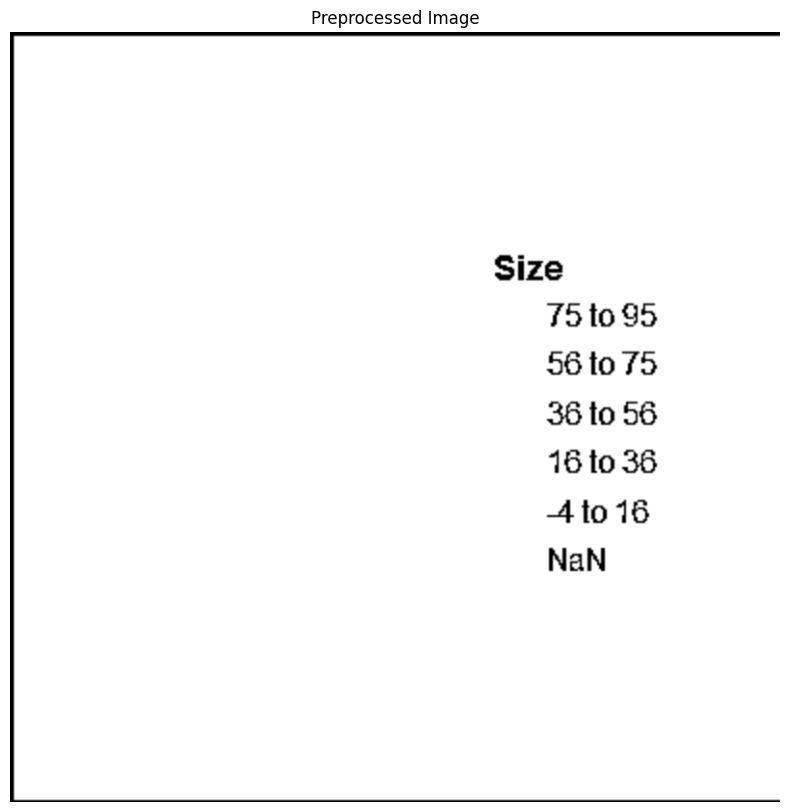

Extracted Text from ROI:
Size
75 to 95
56 to 75
36 to 56
16 to 36
41016
NaN



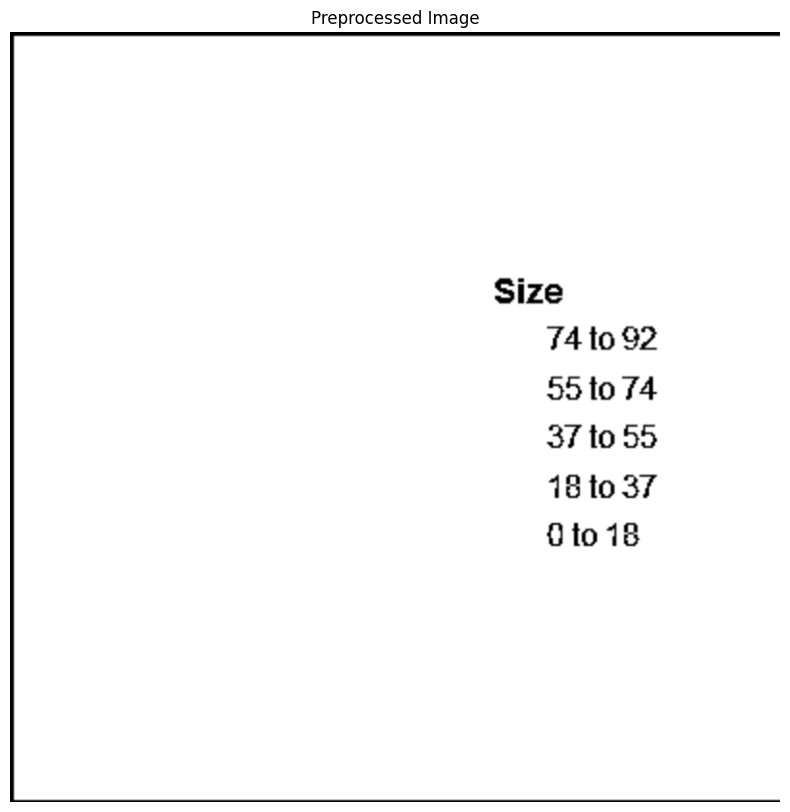

Extracted Text from ROI:
Size
TA to 92
55 to 74
37 to 55
18 to 37
01018



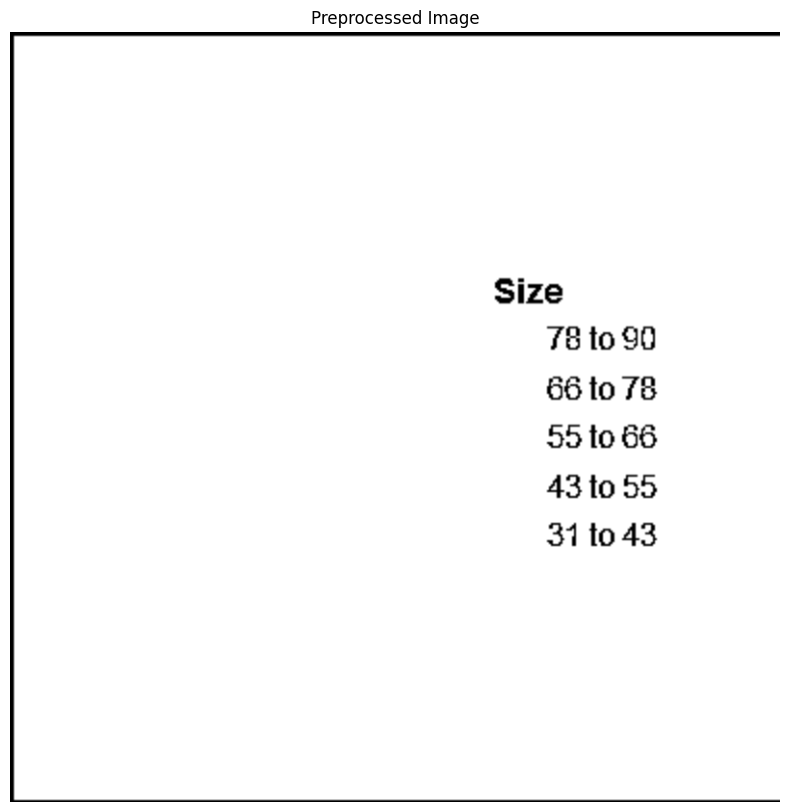

Extracted Text from ROI:
Size
78 to 90
66 to 78
55 to 66
43 to 55
31 to 43



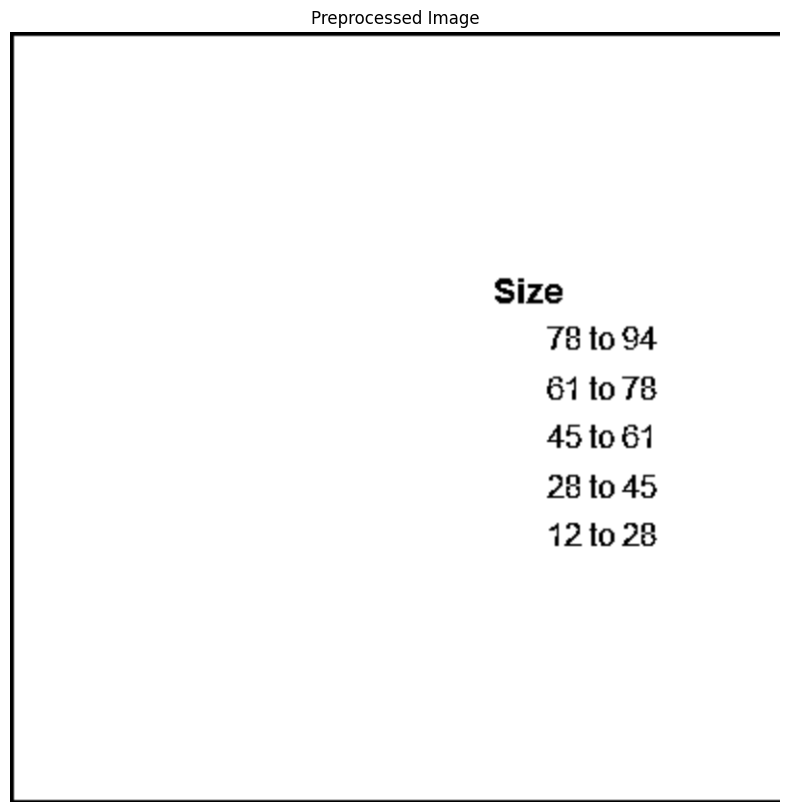

Extracted Text from ROI:
Size
78 to 94
61 to 78
45 to 61
28 to 45
12 to 28



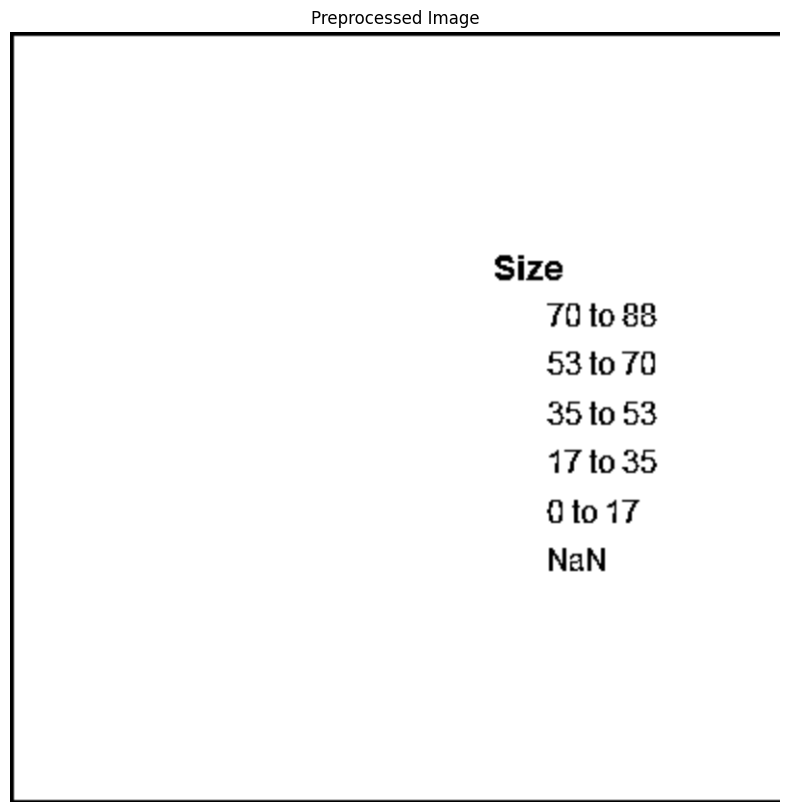

Extracted Text from ROI:
Size
70 to 88
53 to 70
35 to 53
17 to 35
0 to 17
NaN



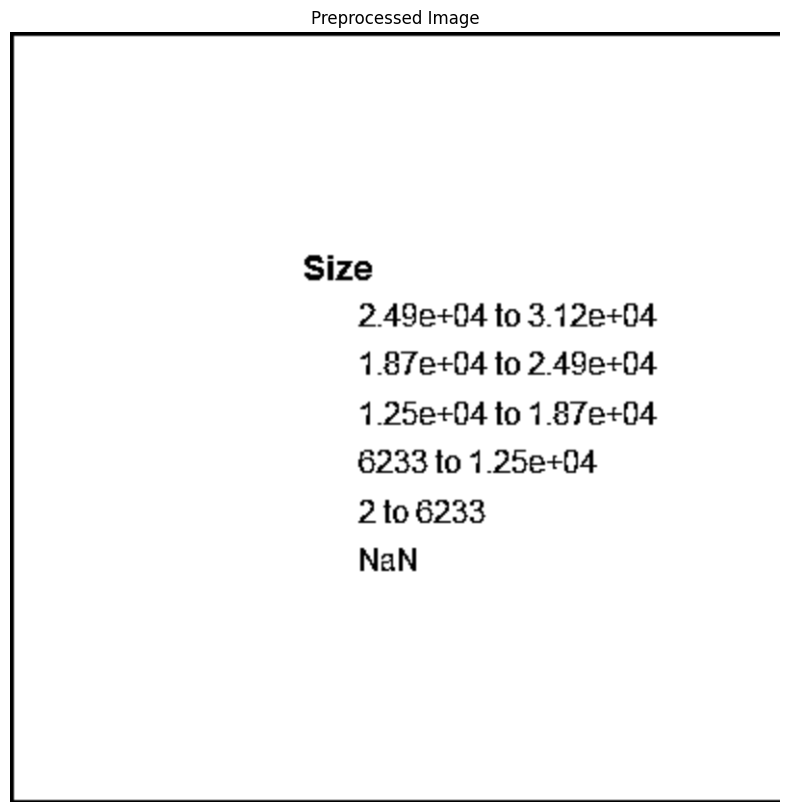

Extracted Text from ROI:
Size
2.49e+04 to 3.12e+04
1.87e+04 to 2.49e+04
1.25e+04 to 1.87e+04
6233 to 1.25e+04
2 to 6233
NaN



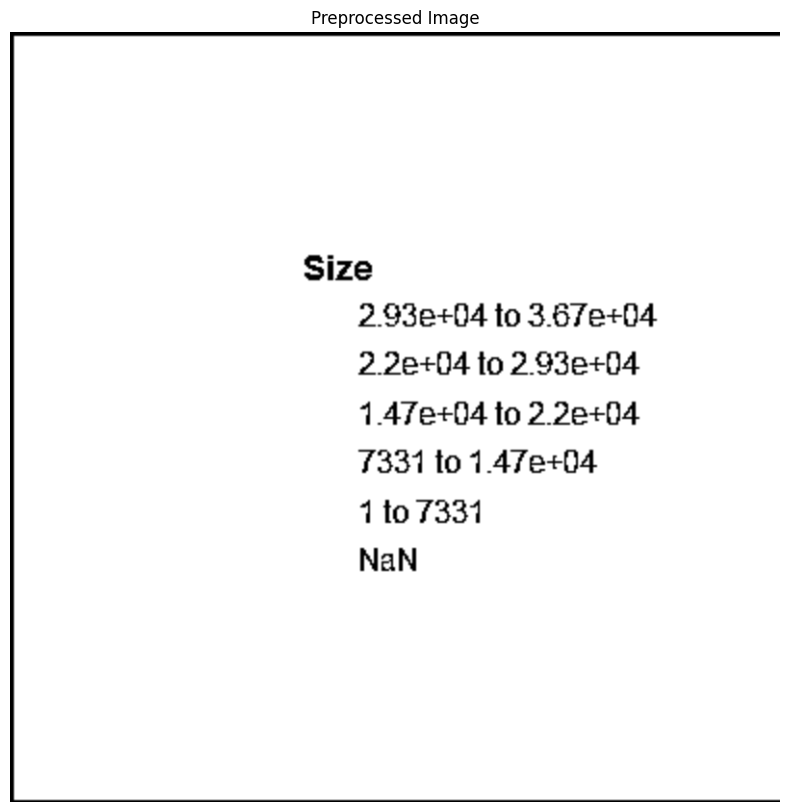

Extracted Text from ROI:
Size
2.93e+04 to 3.67e+04
2.2e+04 to 2.93e+04
1.47e+04 to 2. 2e+04
7331 to 1 Afe+04
1 to 7331
NaN



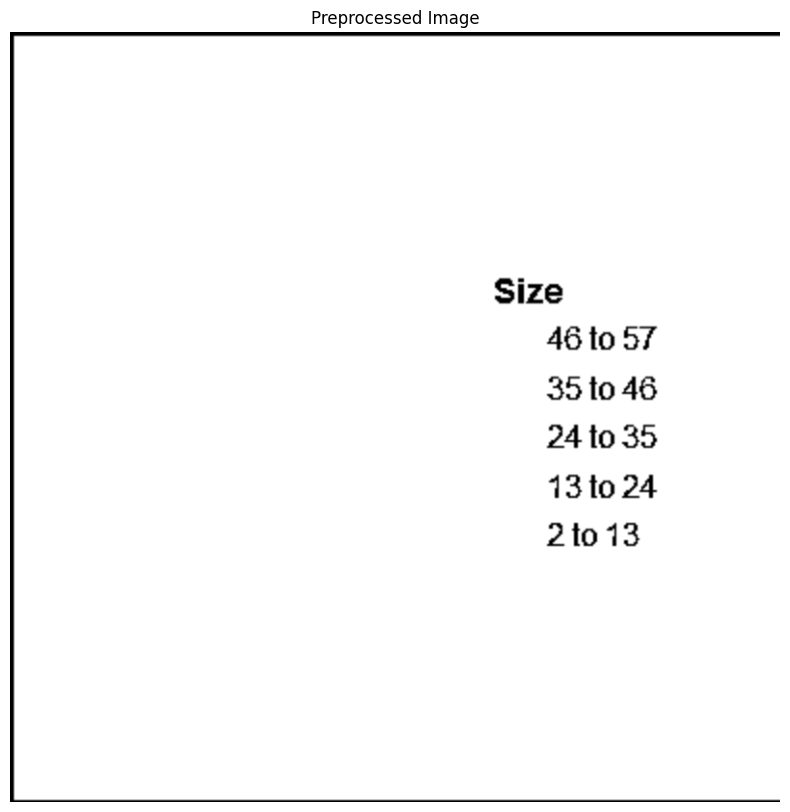

Extracted Text from ROI:
Size
46 to 57
35 to 46
24 to 35
13 to 24
2to13



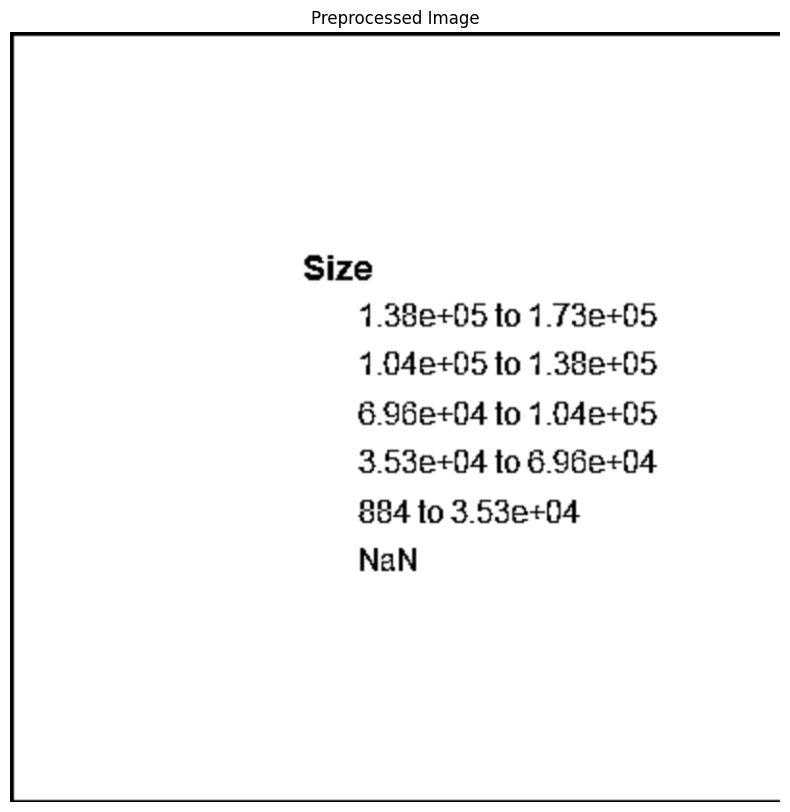

Extracted Text from ROI:
Size
1.38e+05 to 1.73e+05
1.04e+05 to 1.38e+05
6.96e+04 to 1.04e+05
3.53e+04 to 6.96e+04
884 to 3.53e+04
NaN



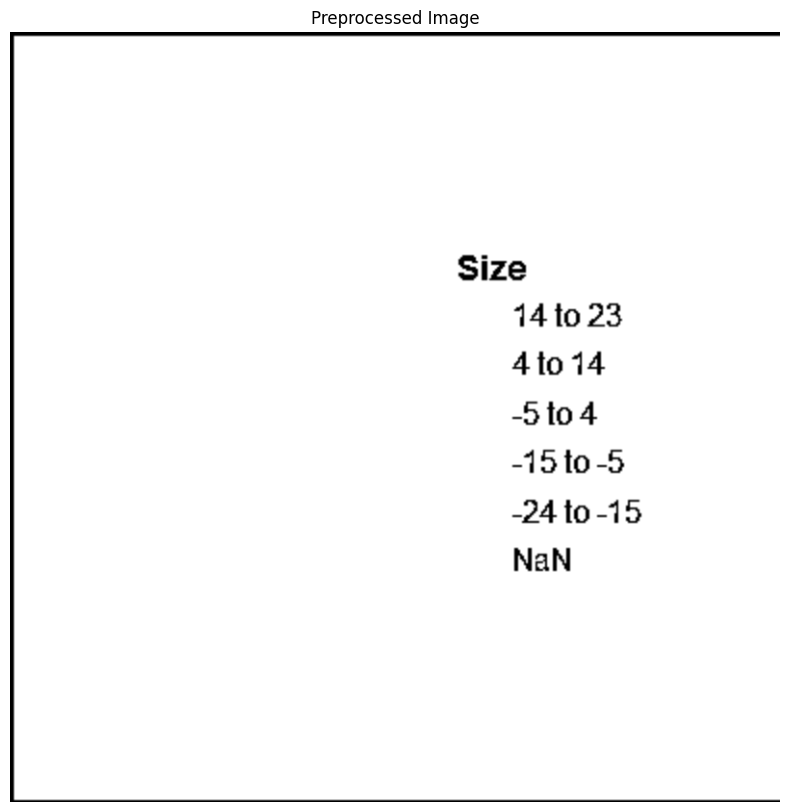

Extracted Text from ROI:
Size
14 to 23
4to14
-5to4
-15to-5
-24 10-15
NaN



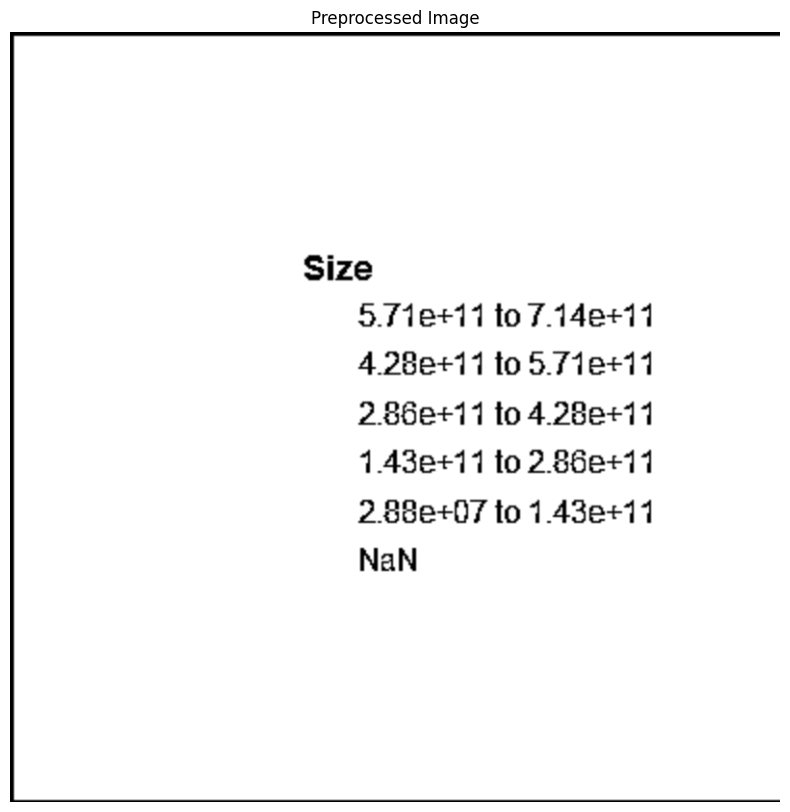

Extracted Text from ROI:
Size
5.71e+11 to 7.14e+11
4.28e+11 to5.71e+11
2.86e+11 to 4.28e+11
1.43e+11 to2.86e+11
2.88e+07 to 1.43e+11
NaN



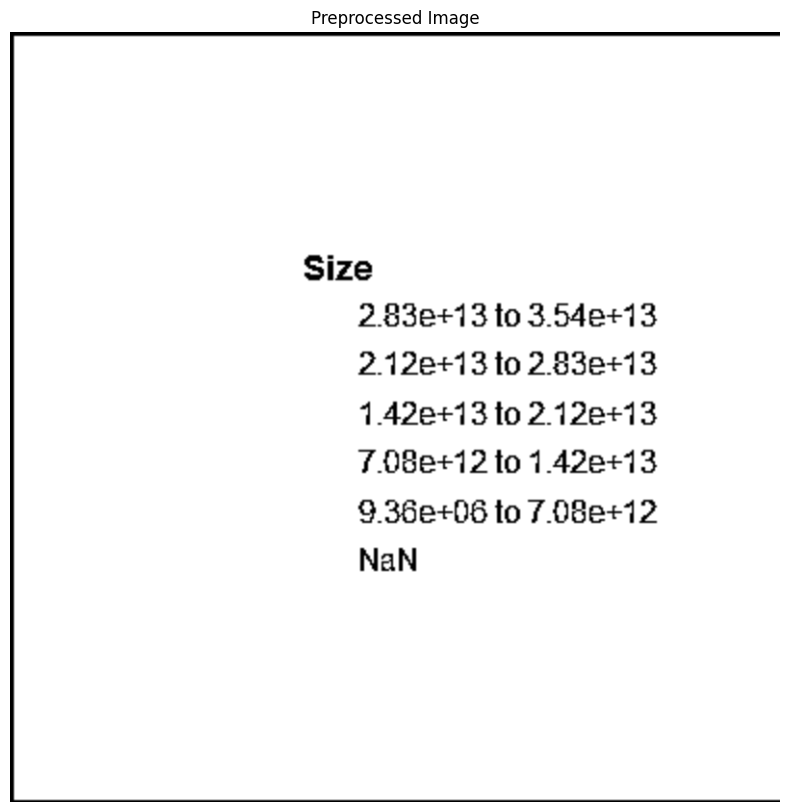

Extracted Text from ROI:
Size
2.83e+13 to 3.54e+13
2.12e+13 to 2.83e+13
1.42e+13 to 2.12e+13
7O8e+12 to 1.42e+13
9 36e+06 to 7.08e+12
NaN



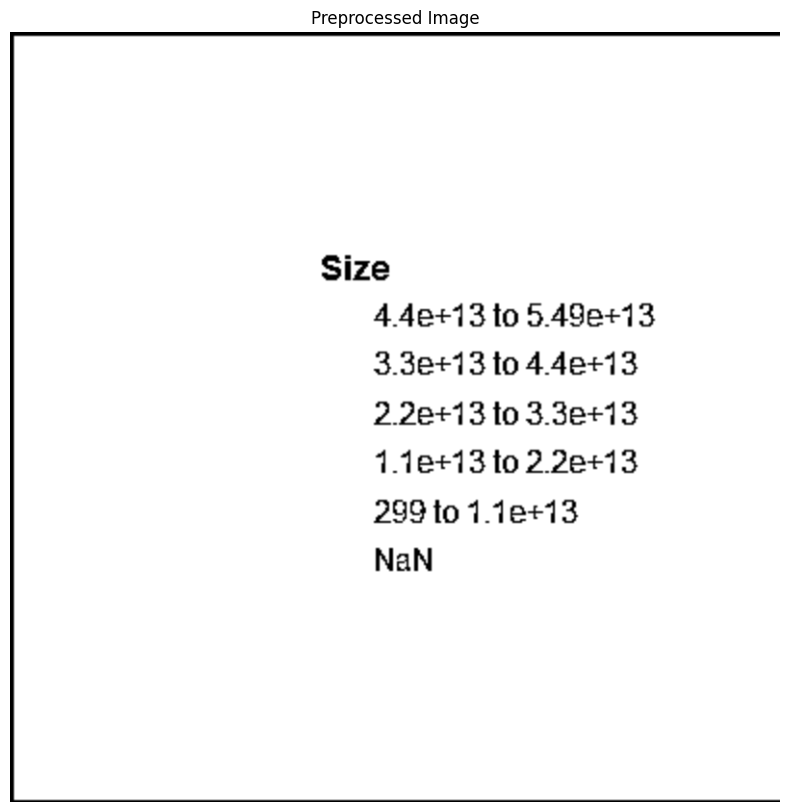

Extracted Text from ROI:
Size
4 4e+13 to 5.49e+13
3.3e+13 to 4.4e+13
2.2e+13 to 3.3e+13
1.1e+13 to 2.2e+13
293 to 1.1e+13
NaN



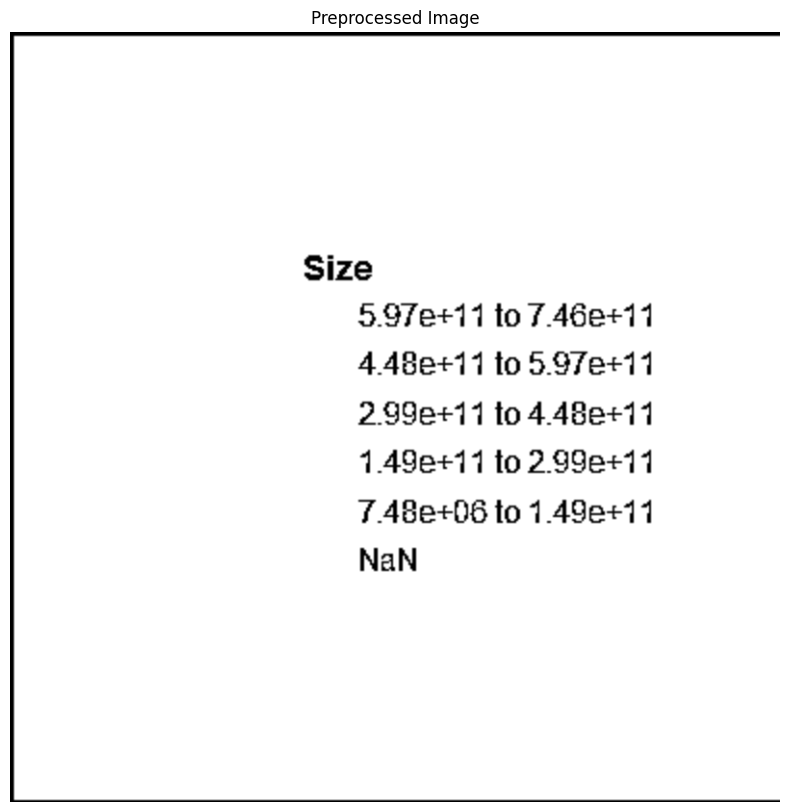

Extracted Text from ROI:
Size
5.97e+11 to 746e+11
448et11 to 5.97e+11
2.99et11 to 4.48e+11
1.49e+11 to2.99e+11
7 A8e+06 to 1.49e+14
NaN



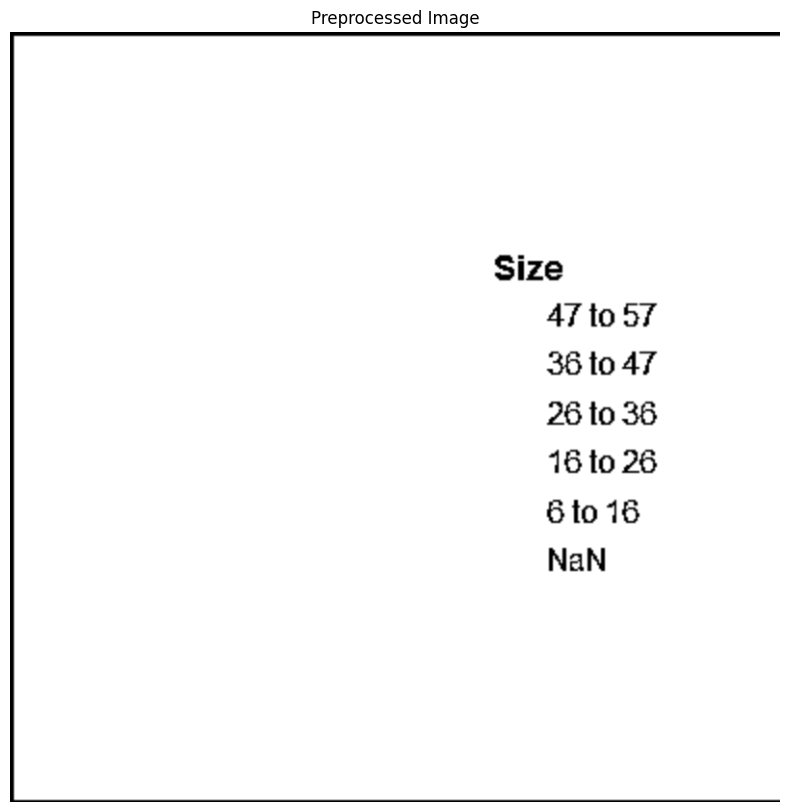

Extracted Text from ROI:
Size
47 to 57
36 to 47
26 to 36
16 to 26
6 to 16
NaN



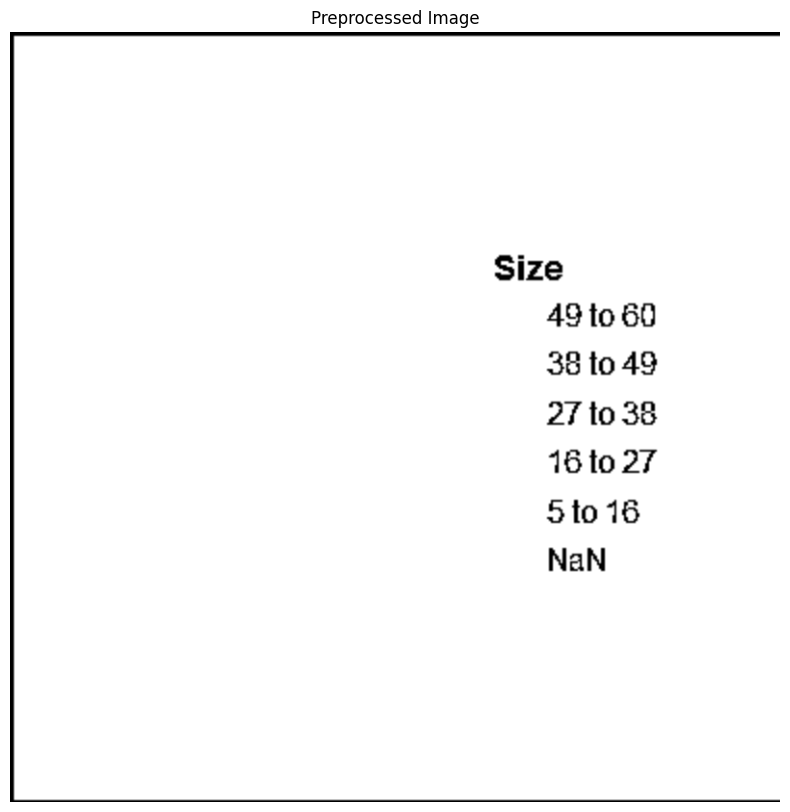

Extracted Text from ROI:
Size
43 to 60
38 to 49
27 to 38
16 to 27
§to16
NaN



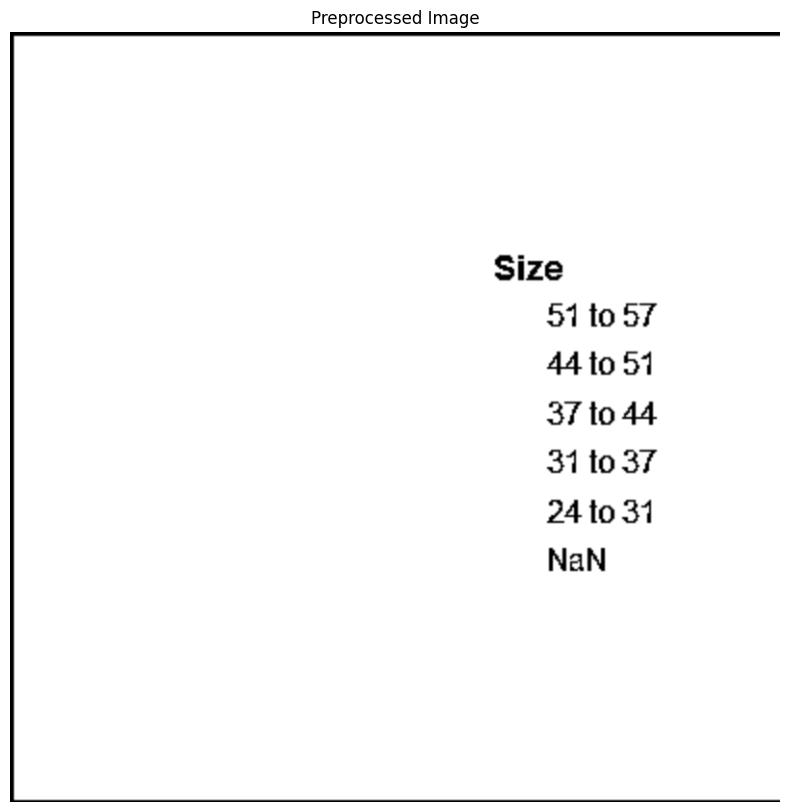

Extracted Text from ROI:
Size
51 to 57
44 to 51
37 to 44
31 to 37
24 to 31
NaN



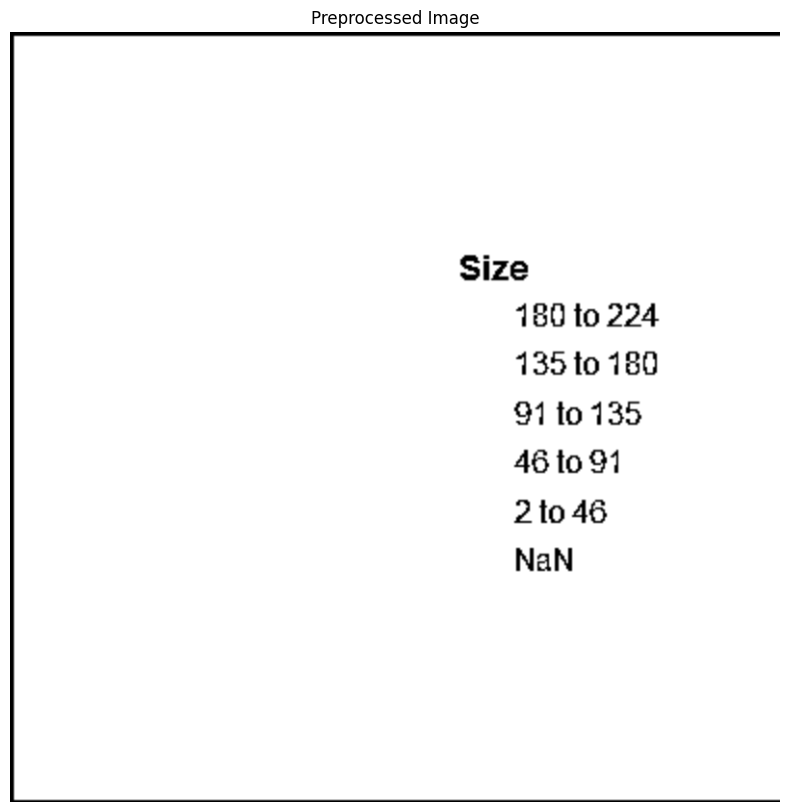

Extracted Text from ROI:
Size
180 to 224
135 to 180
91 10135
46 to 91
21046
NaN



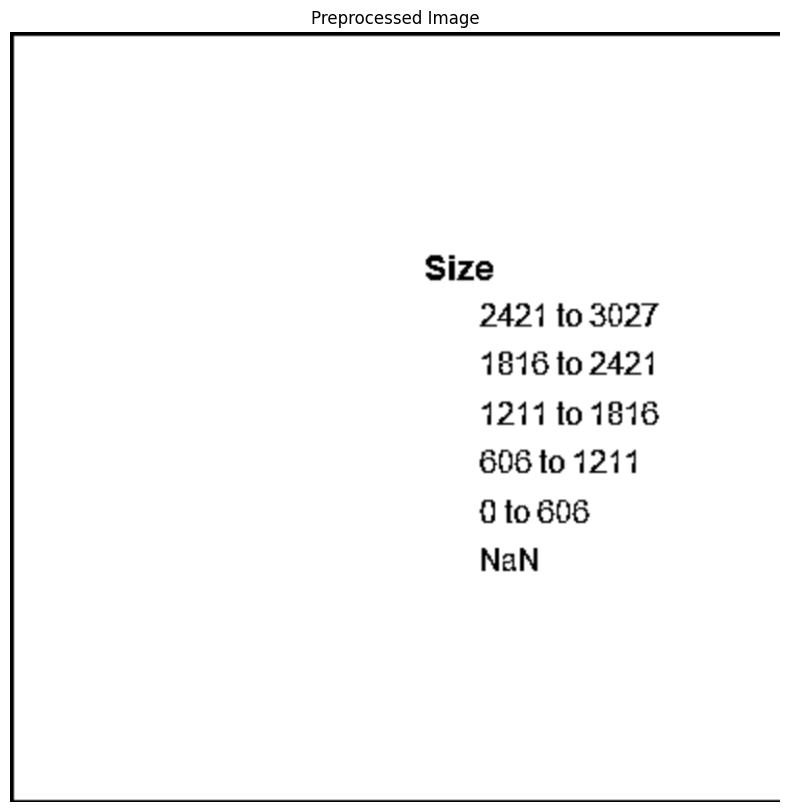

Extracted Text from ROI:
Size
2421 to 3027
1816 to 2421
1211 0 1816
606 to 1211
0 to 606
NaN



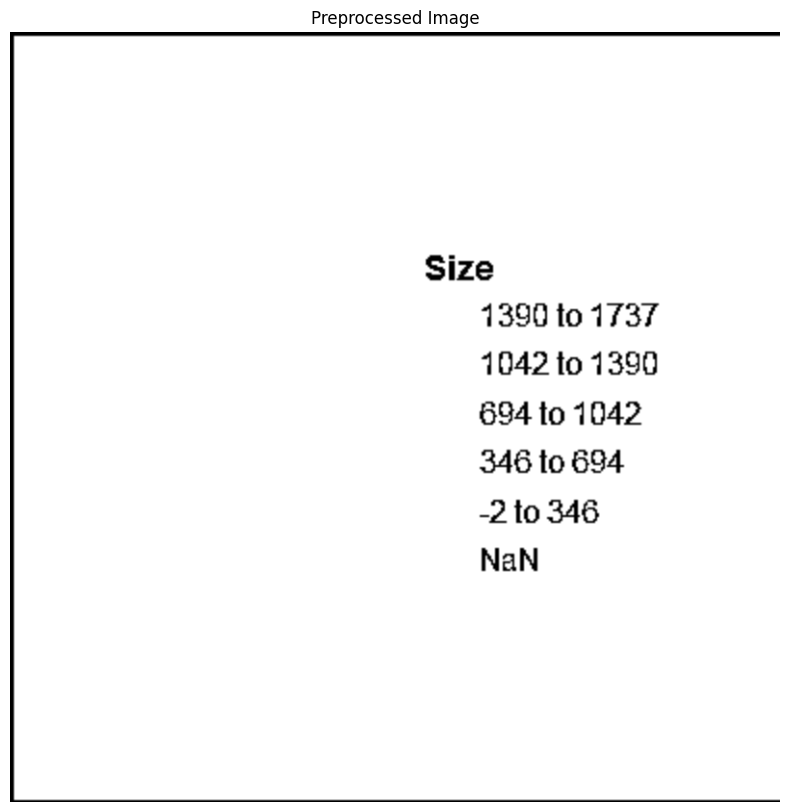

Extracted Text from ROI:
Size
1390 to 1737
1042 to 1390
694 to 1042
346 to 694
-2 to 346
NaN



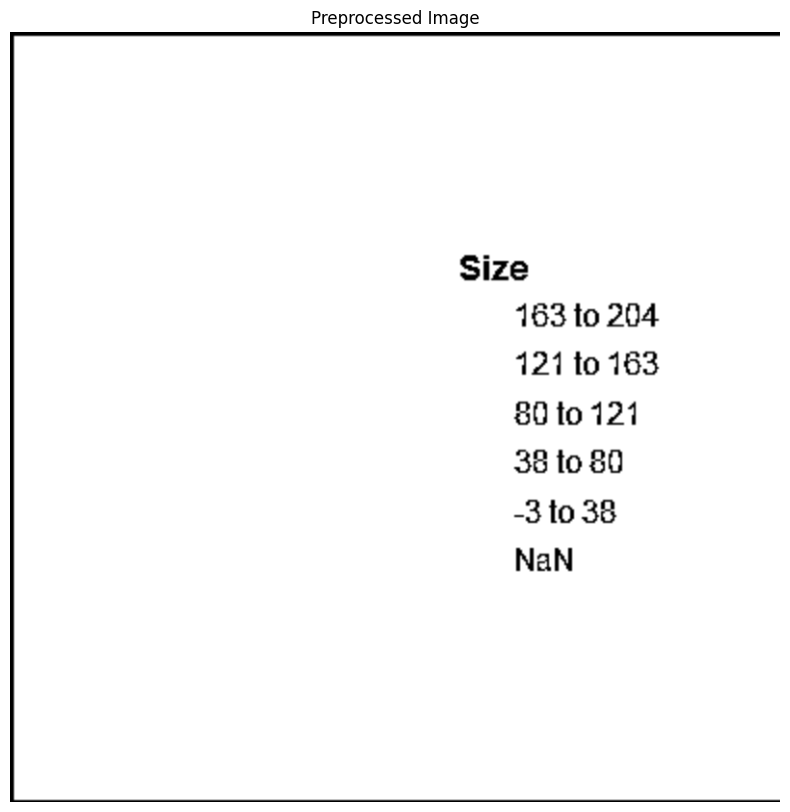

Extracted Text from ROI:
Size
163 to 204
121 to 163
80 to 121
38 to 80
-3 to 38
NaN



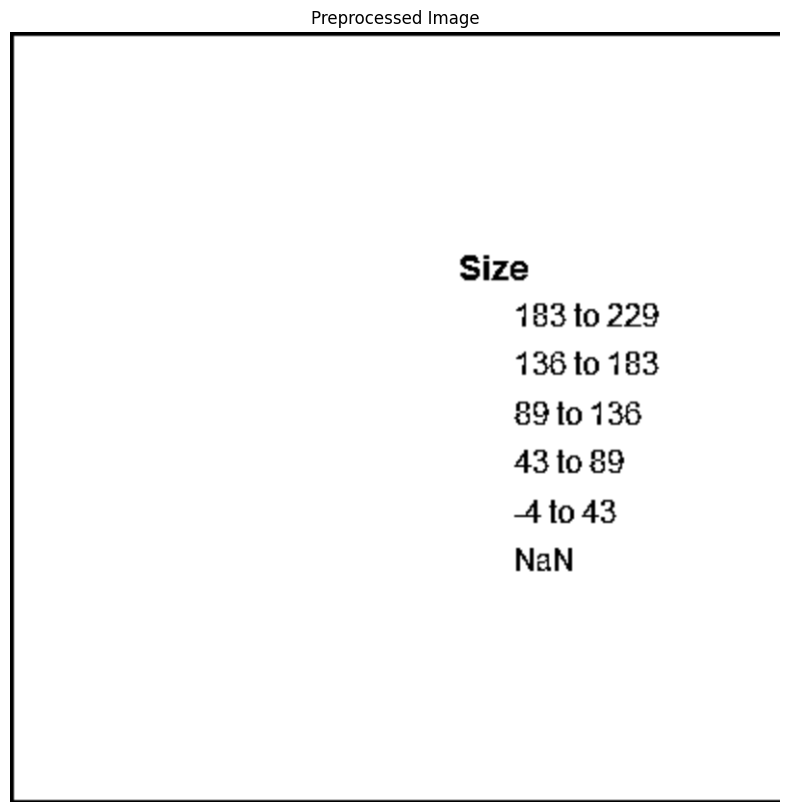

Extracted Text from ROI:
Size
183 to 229
136 to 183
89 to 136
43 to 89
4 to 43
NaN



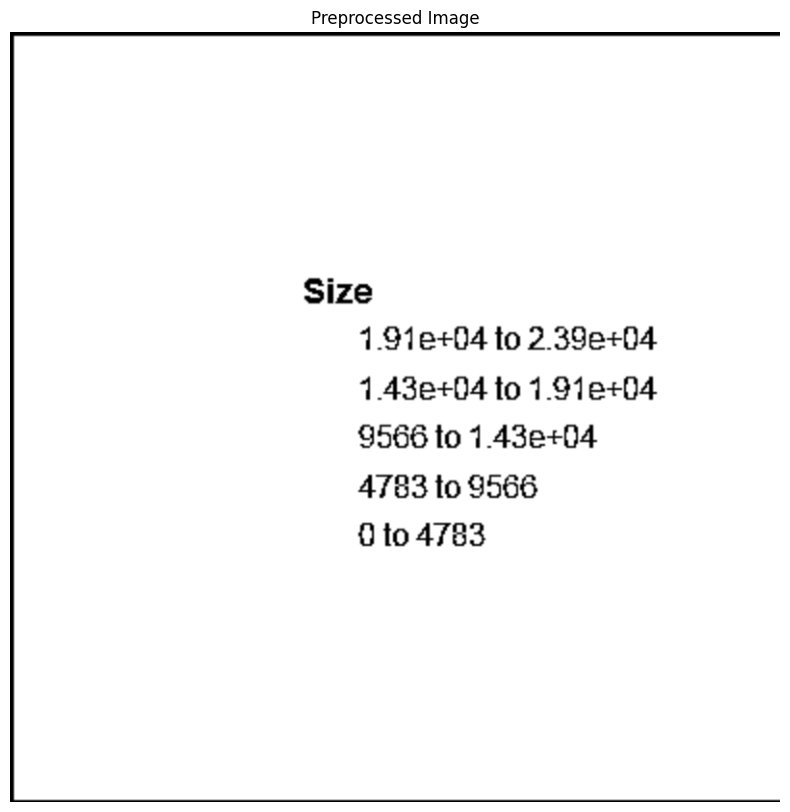

Extracted Text from ROI:
Size
1.91e+04 to 2.39e+04
1.43e+04 to 1.91e+04
9566 to 1.43e+04
4783 to 9566
0 to 4783



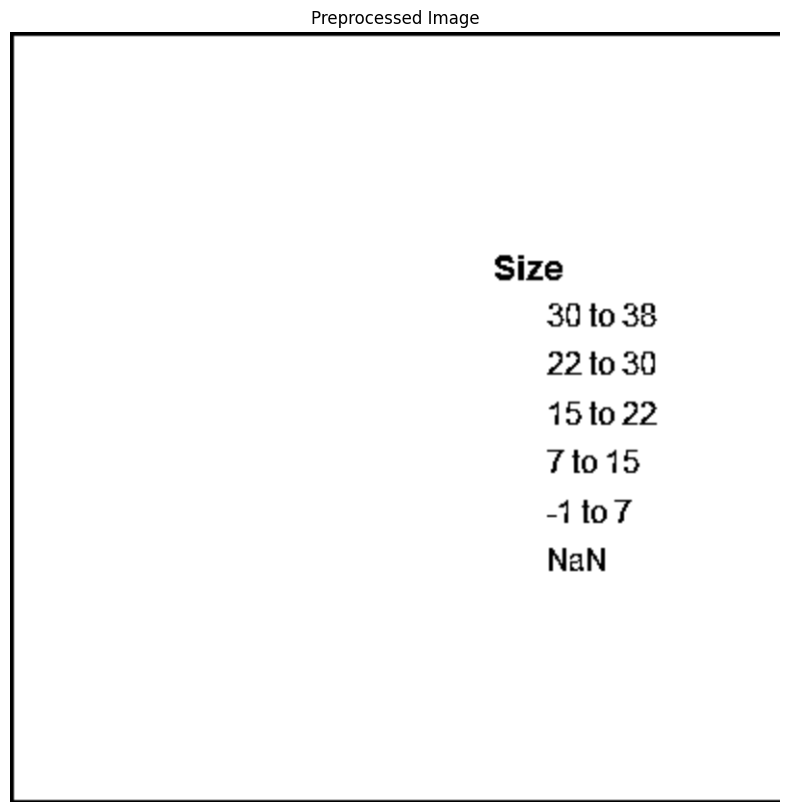

Extracted Text from ROI:
Size
30 to 38
22 to 30
15 to 22
7to1i5
-1tof
NaN



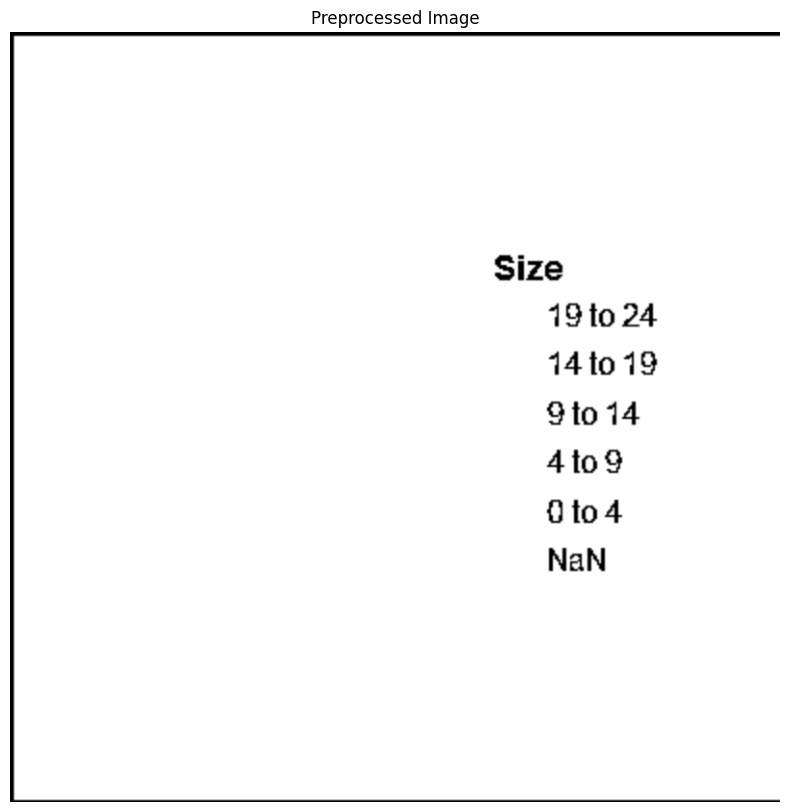

Extracted Text from ROI:
Size
19 to 24
141019
9to 14
4to9
0to4
NaN



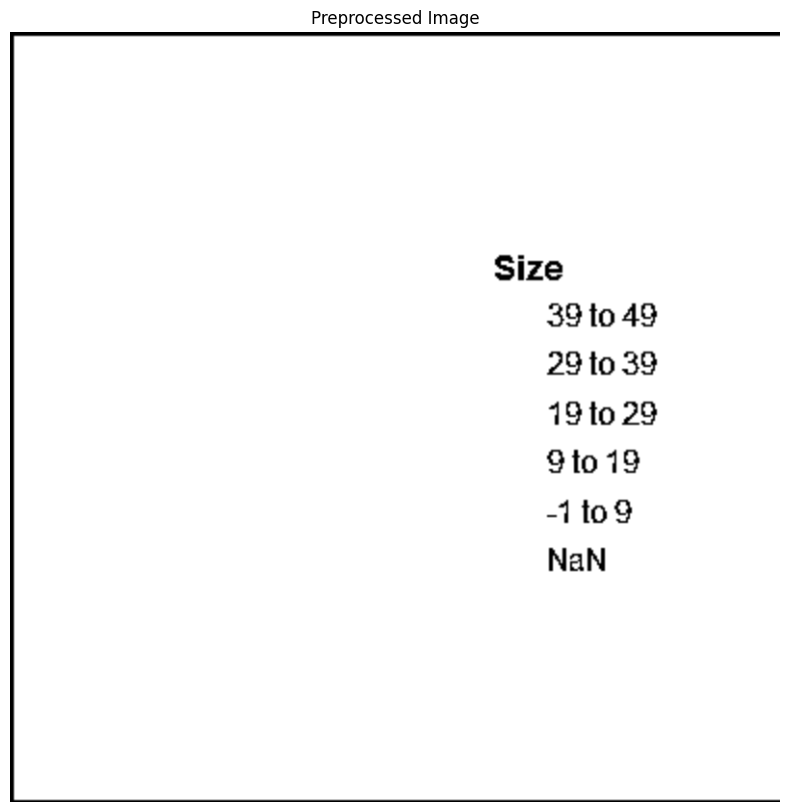

Extracted Text from ROI:
Size
39 to 49
23 to 39
19 to 29
91019
-1to9
NaN



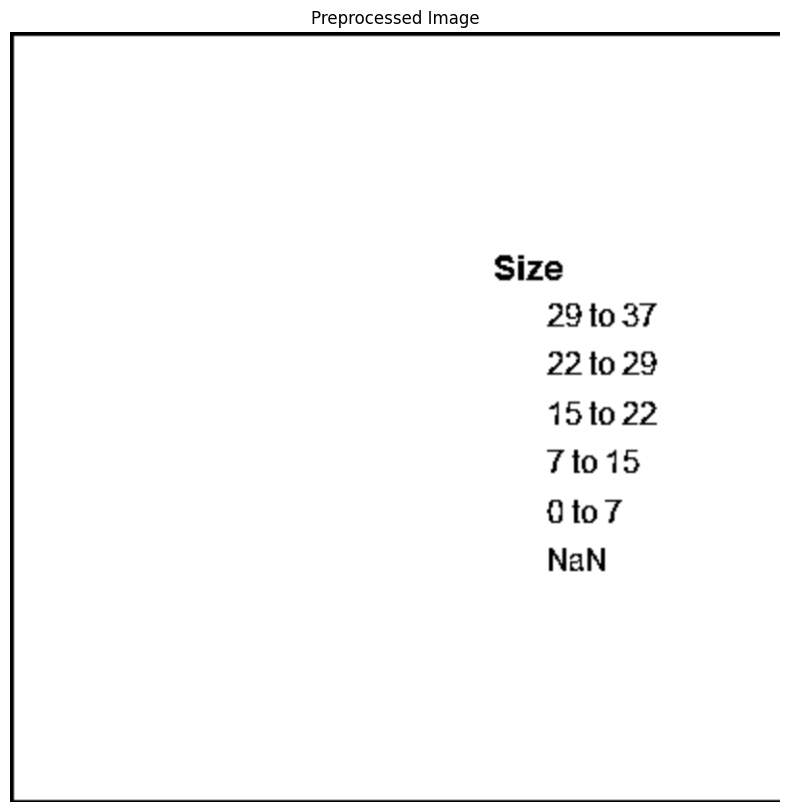

Extracted Text from ROI:
Size
23 to 37
22 to 29
15 to 22
7to1i5
Oto7
NaN



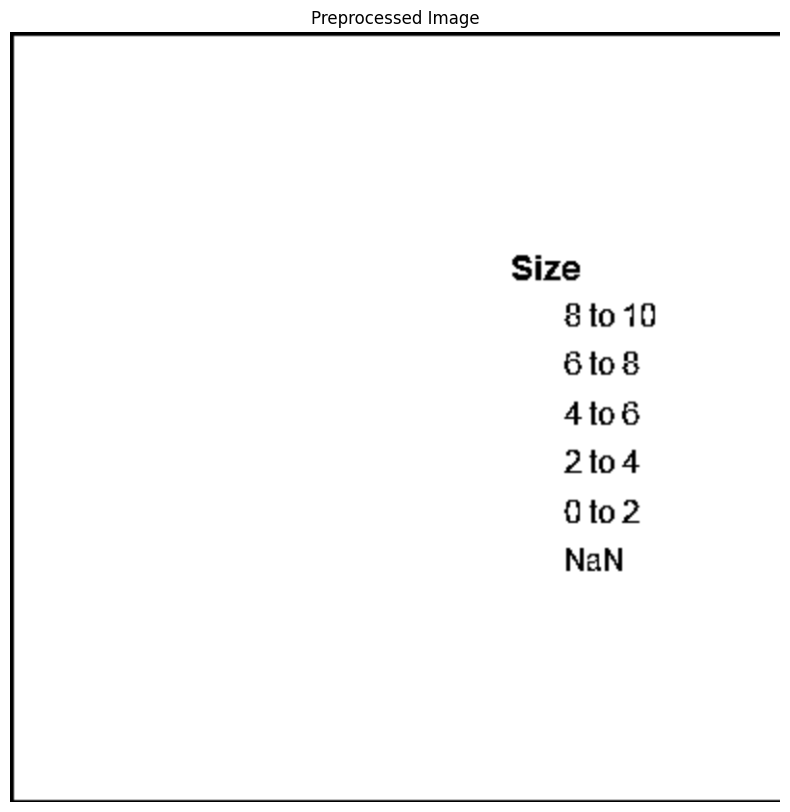

Extracted Text from ROI:
Size
8to10
6to8
4to8
2to4
0 to2
NaN



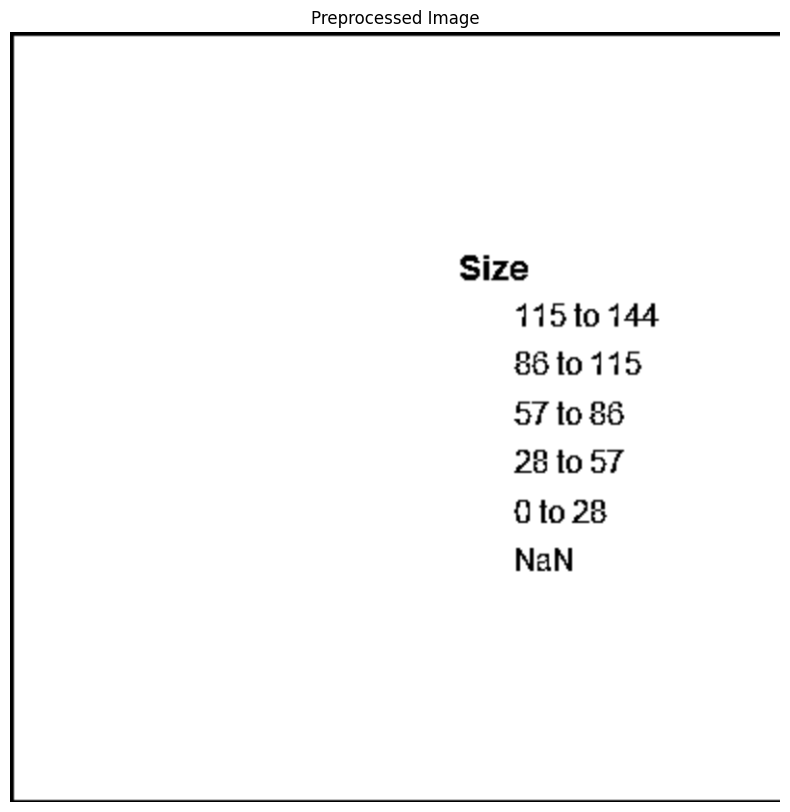

Extracted Text from ROI:
Size
115 to 144
86107115
57 to 86
28 to 57
0 to 28
NaN



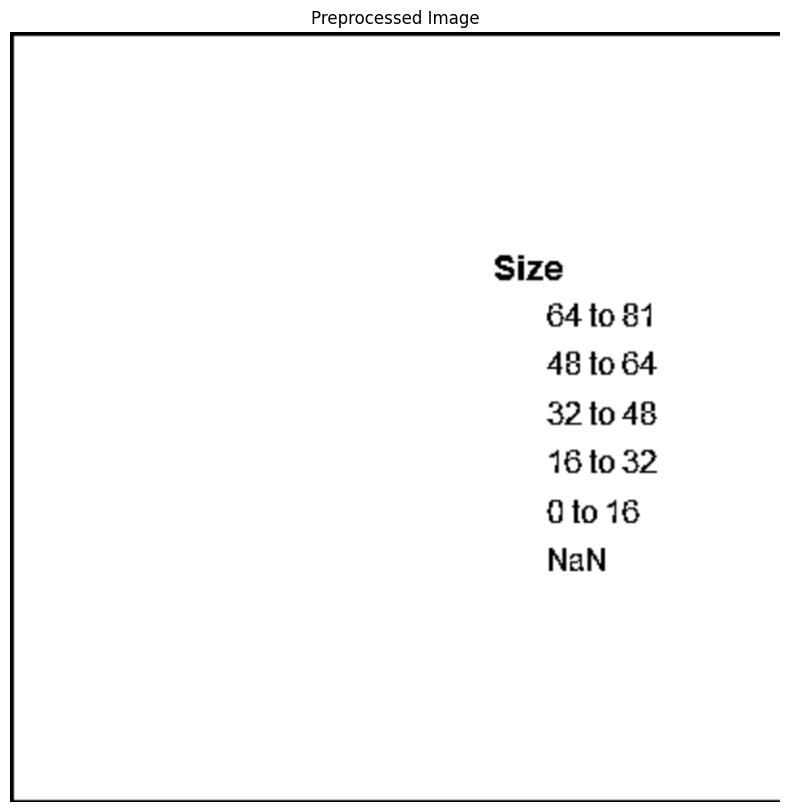

Extracted Text from ROI:
Size
64 to 81
48 to 64
32 to 48
16 to 32
0 to 16
NaN



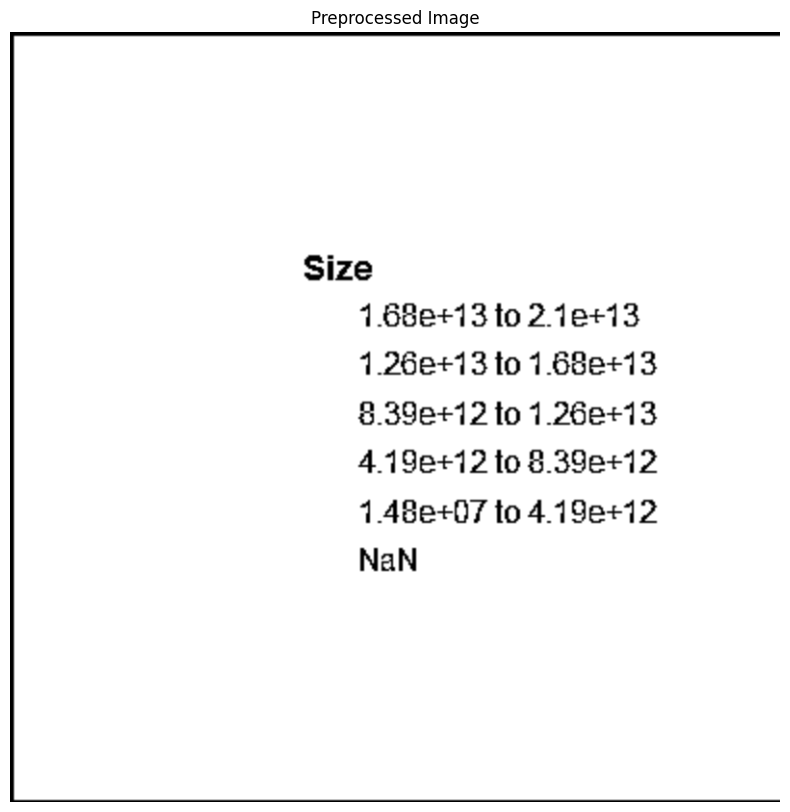

Extracted Text from ROI:
Size
1.68e+13 to2.1e+13
1.26e+13 to 1.68e+13
§.39e+12 to 1.26e+13
4.19e+12 to 8.39e+12
1.48e+07 to 4.19e+12
NaN



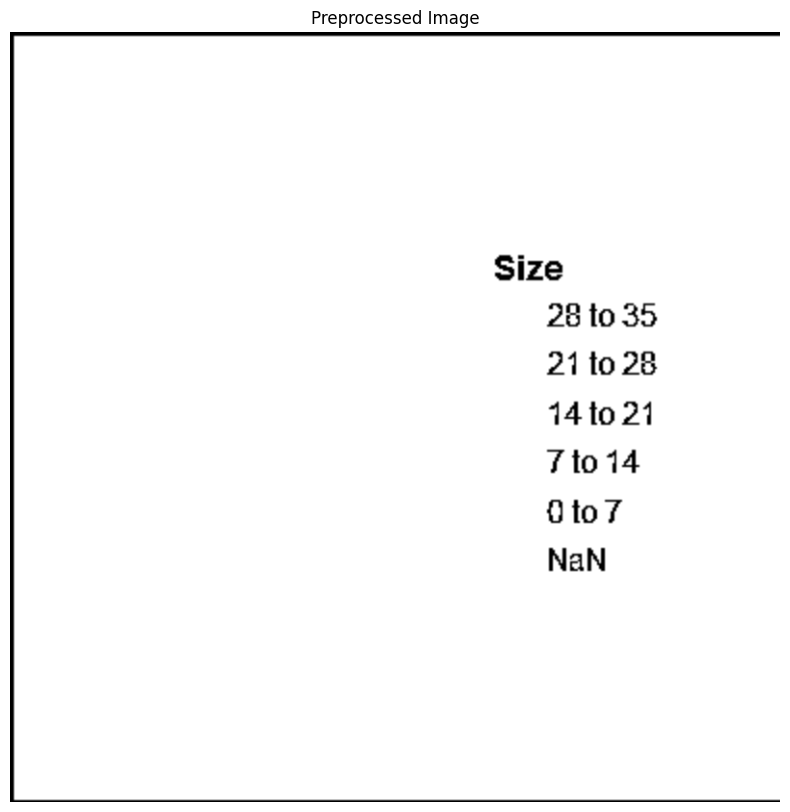

Extracted Text from ROI:
Size
28 to 35
21 to 28
14to 21
7toi4
Oto7
NaN



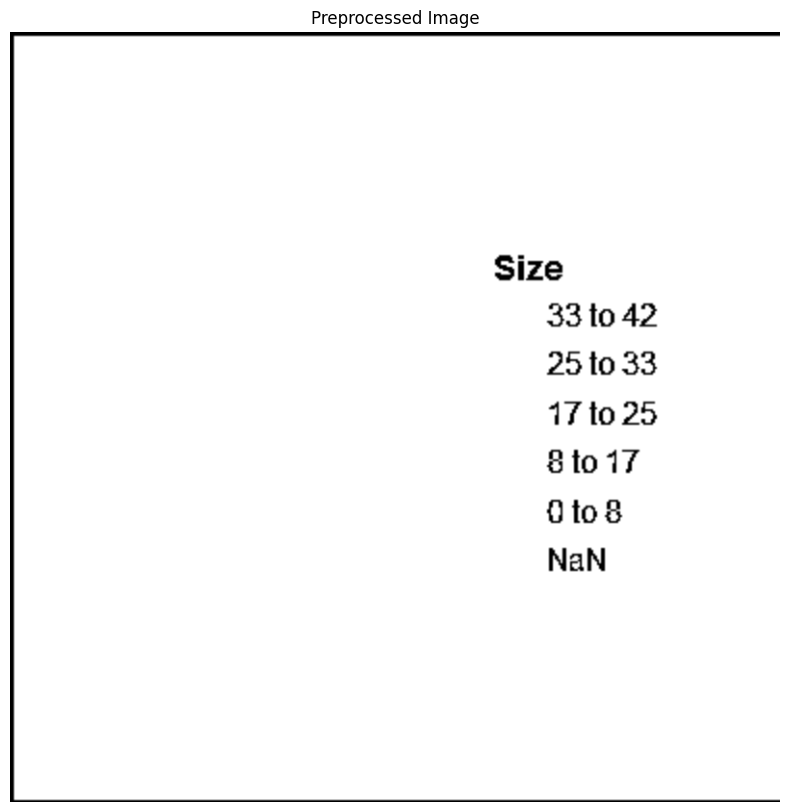

Extracted Text from ROI:
Size
33 to 42
25 to 33
17 to 25
8to17
0to8
NaN



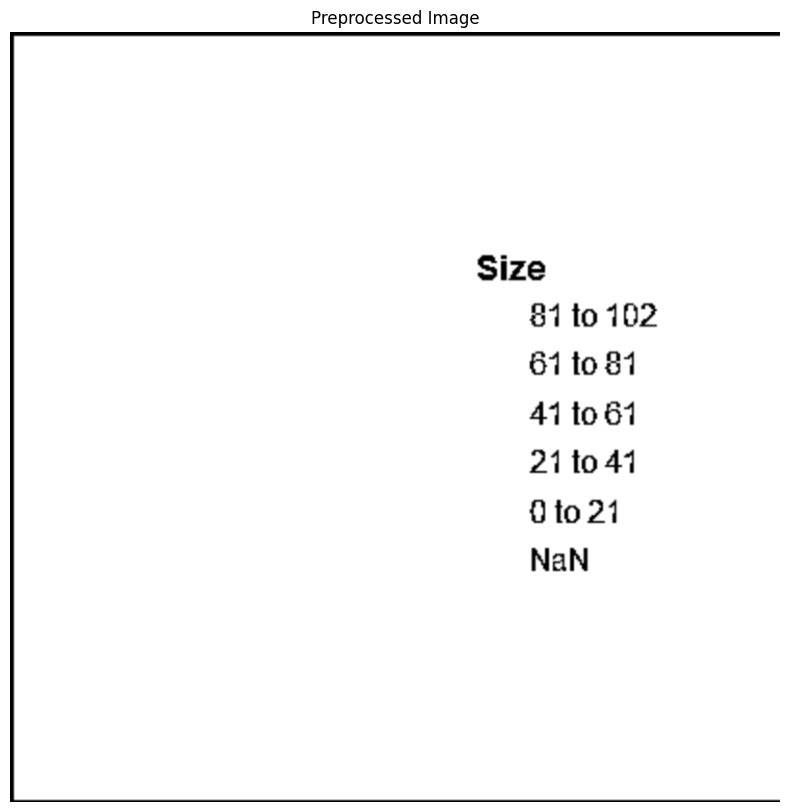

Extracted Text from ROI:
Size
871 to 102
61 to 81
41 to 61
211041
0 to 21
NaN



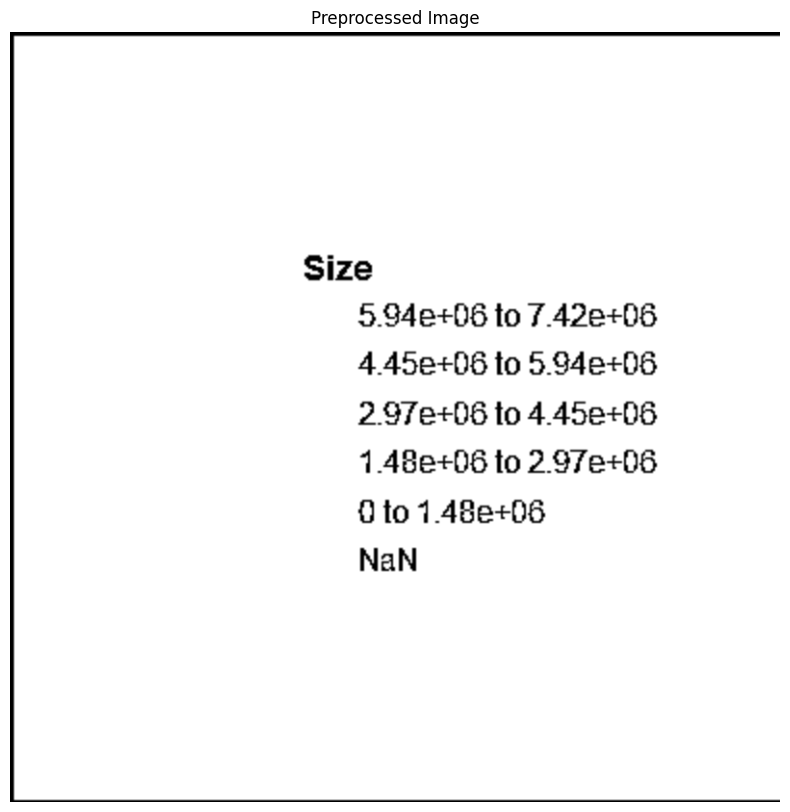

Extracted Text from ROI:
Size
5.94e+06 to 7.42e+08
4.45e+06 to 5.94e+06
2.97e+06 to 4.45e+08
1.48e+06 to 2.97e+06
0 to 1.48e+068
NaN



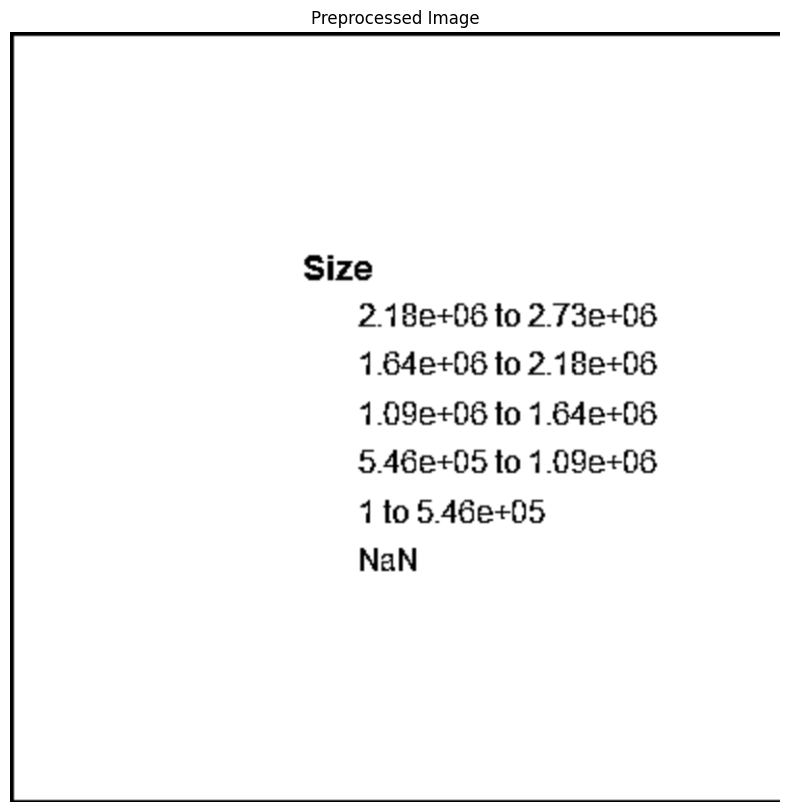

Extracted Text from ROI:
Size
2.18e+06 to 2.73e+08
1.64e+06 to 2.18e+06
1.09e+06 to 1.64e+06
5.46e+05 to 1.09e+08
1 to 5.46e+05
NaN



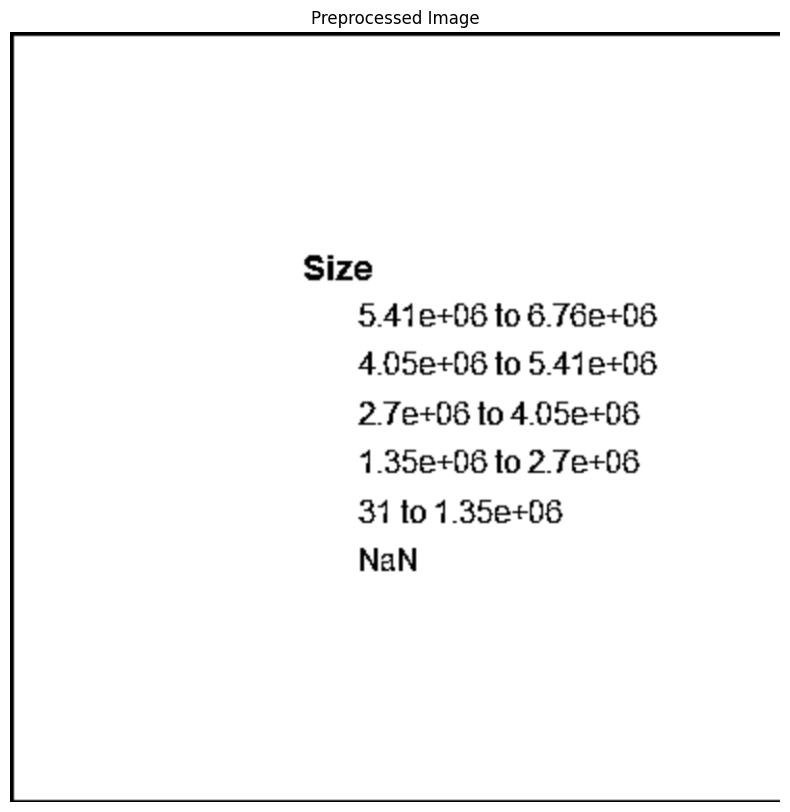

Extracted Text from ROI:
Size
5.41e+06 to 6.76e+06
4.05e+06 to 5.41e+06
2.7e+06 to 4.05e+06
1.35e+06 to 2. 7e+06
31 to 1.35e+06
NaN



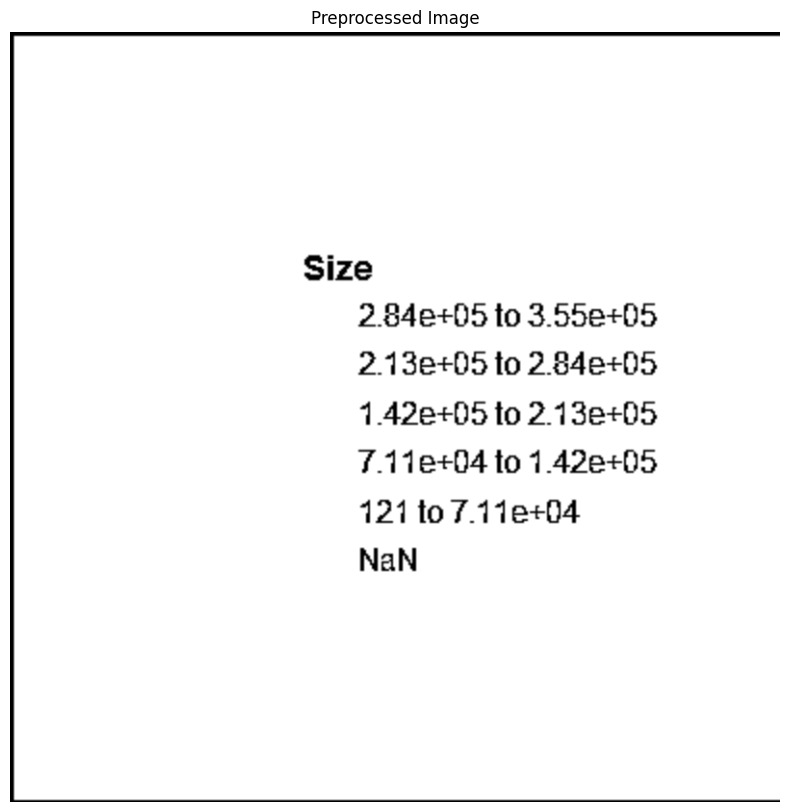

Extracted Text from ROI:
Size
2.84e+05 to 3.55e+05
2.13e+05 to 2.84e+05
1.42e+05 to 2.13e+05
7.11e+04 to 1.42e+05
121 to 7.11e+04
NaN



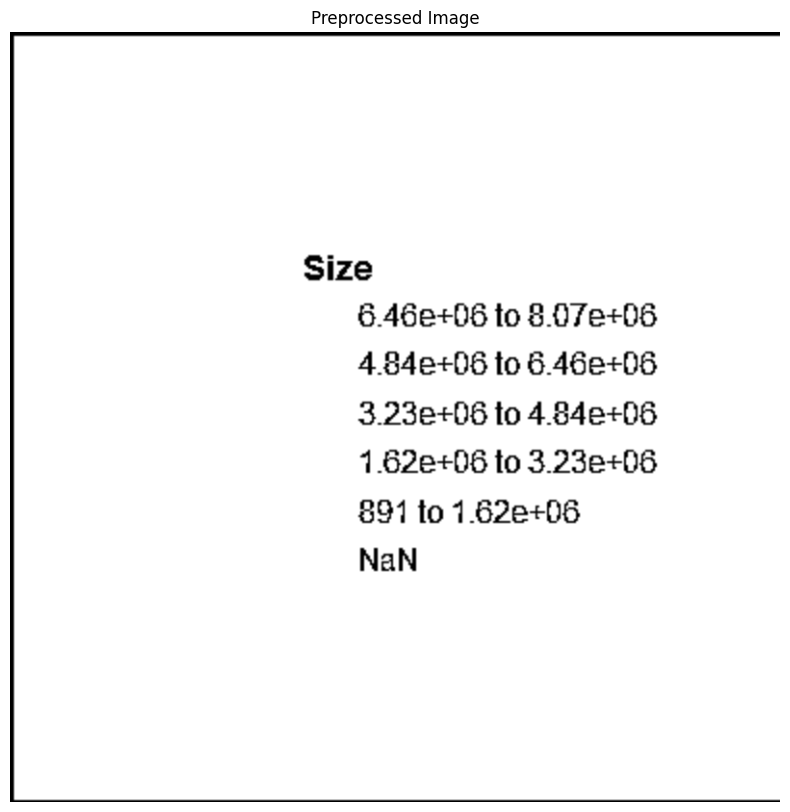

Extracted Text from ROI:
Size
6.46e+06 to 8.07e+08
4.84e+06 to 6.46e+06
3.23e+06 to 4.84e+08
1.62e+06 to 3.23e+06
891 to 1.62e+06
NaN



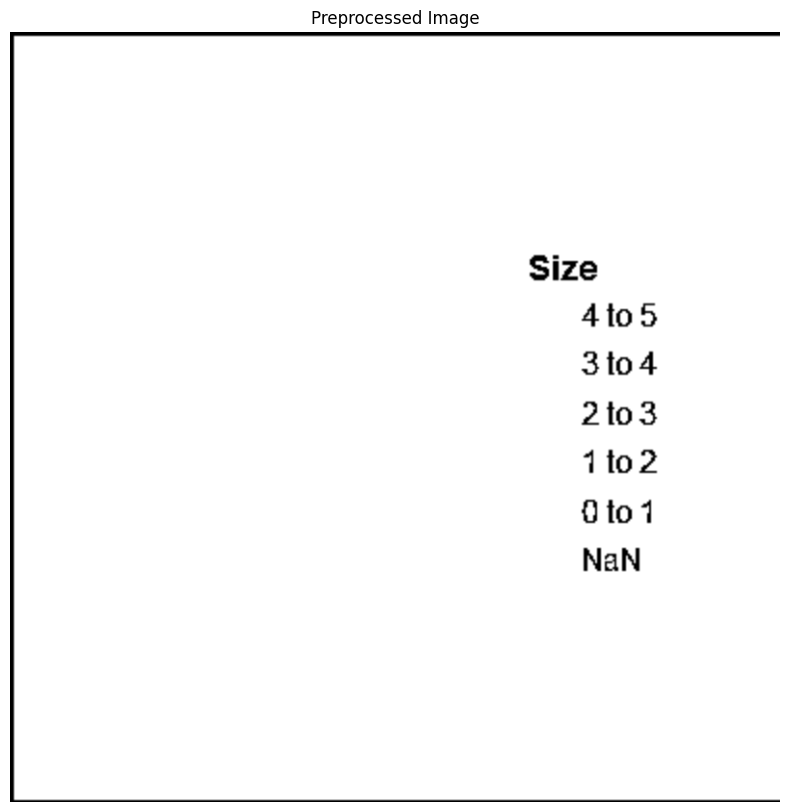

Extracted Text from ROI:
Size
4to5
3to4
2to3
1to2
Oto1
NaN



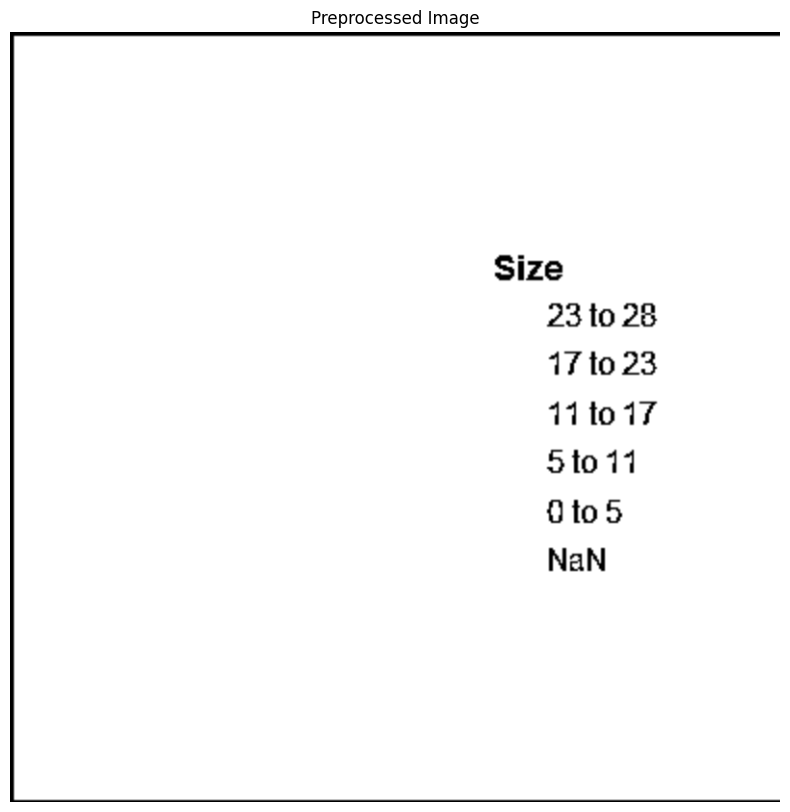

Extracted Text from ROI:
Size
23 to 28
17 to 23
111017
§to11
0to5
NaN



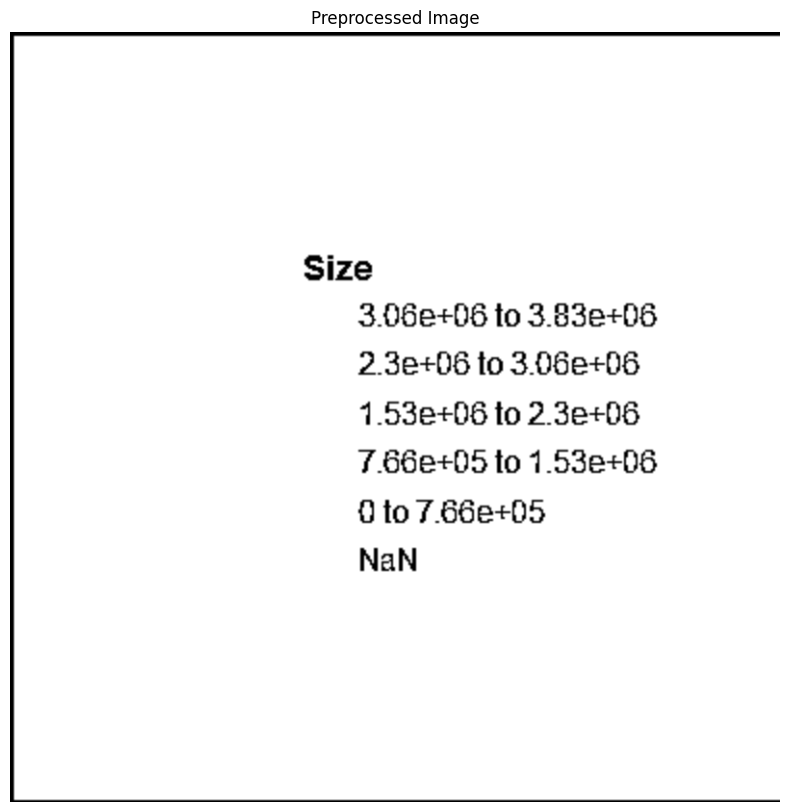

Extracted Text from ROI:
Size
3.06e+06 to 3.83e+08
2.3e+06 to 3.06e+06
1.53e+06 to 2.3e+06
7.66e+05 to 1.53e+068
0 to 7.66e+05
NaN



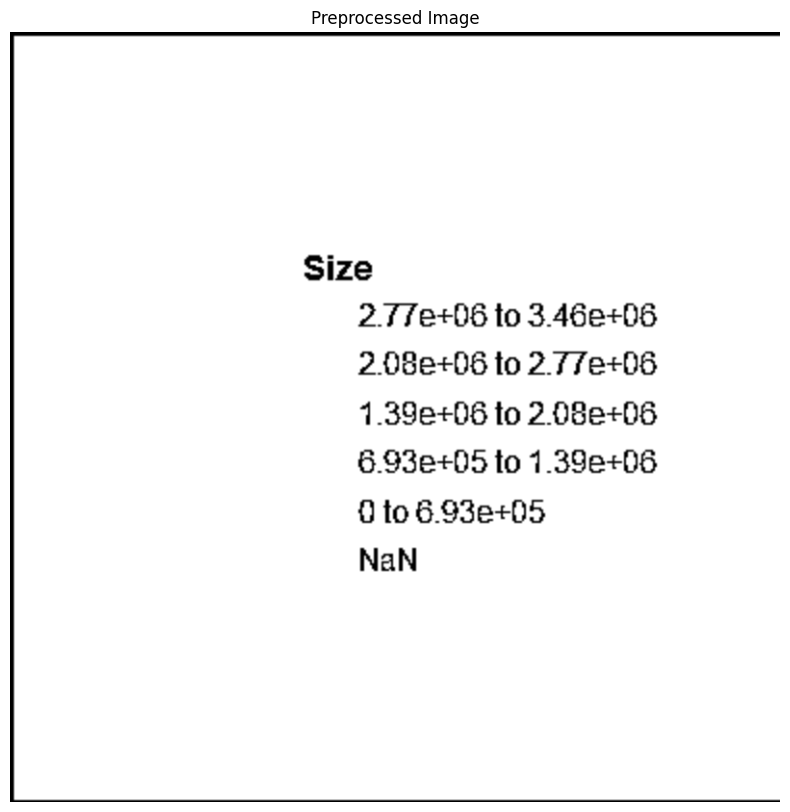

Extracted Text from ROI:
Size
2.77e+06 to 3.46e+08
2.08e+06 to 2.77e+08
1.39e+06 to 2.08e+06
6.93e+05 to 1.39e+08
0 to 6.93e+05
NaN



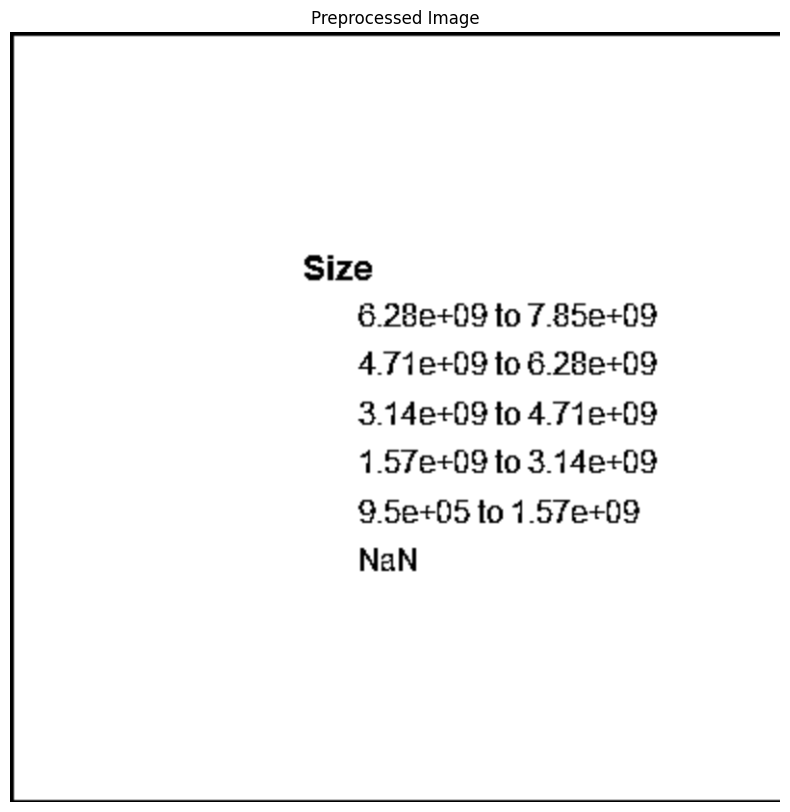

Extracted Text from ROI:
Size
6.26e+09 to 7.85e+09
471e+09 to 6. 28e+09
3.14e+09 to 4.71e+09
1.57e+09 to 3.14e+09
§.5e+05 to 1.57e+09
NaN



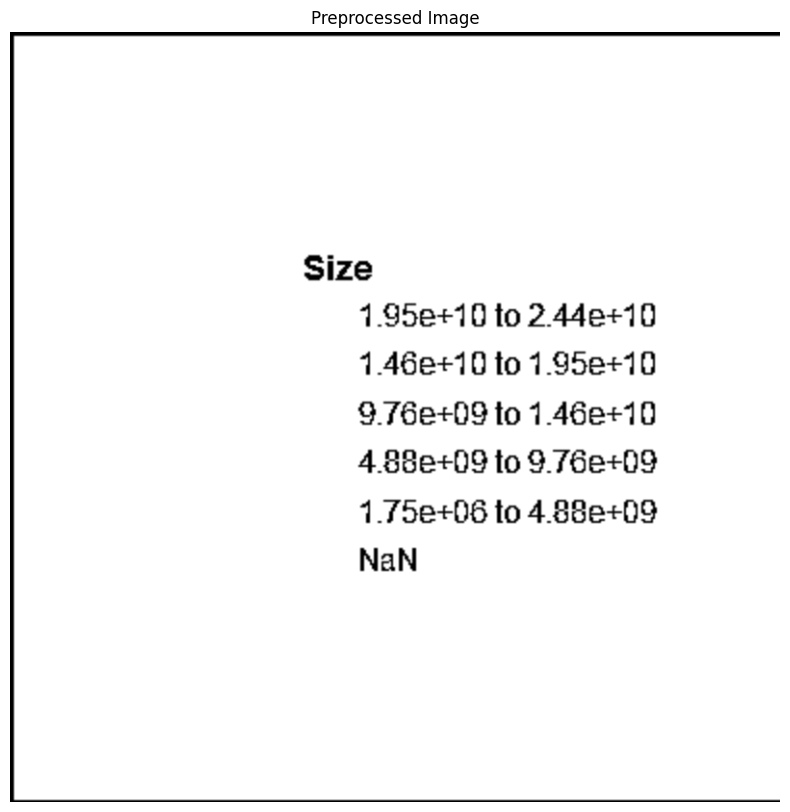

Extracted Text from ROI:
Size
1.95e+10 to 2.44e+10
1.46e+10 to 1.95e+10
9.76e+09 to 1.46e+10
4.88e+09 to 9.76e+09
1.75e+06 to 4.88e+09
NaN



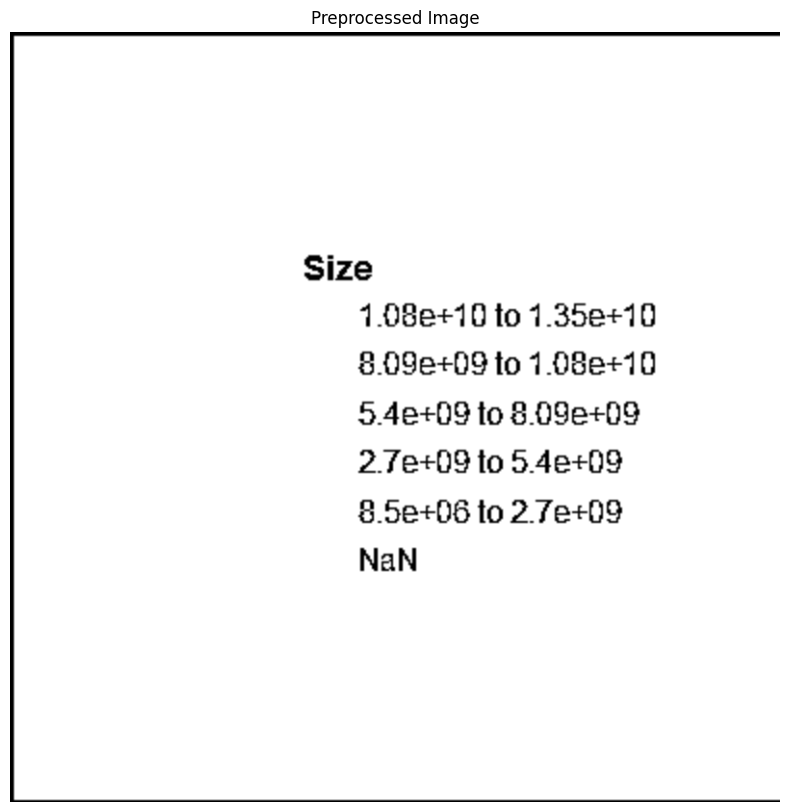

Extracted Text from ROI:
Size
1.08e+10 to 1.35e+10
8.09e+09 to 1.08e+10
5.4e+09 to 8.09e+09
2.7e+09 to 5.4e+09
§.5e+06 to 2. 7e+09
NaN



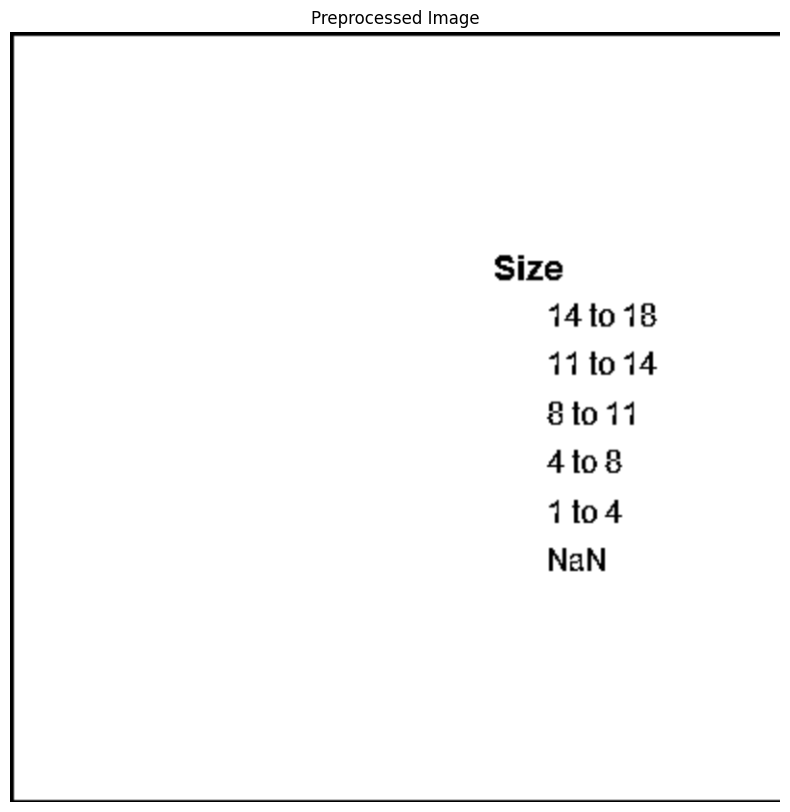

Extracted Text from ROI:
Size
141018
111014
8to11
4to8
1to4
NaN



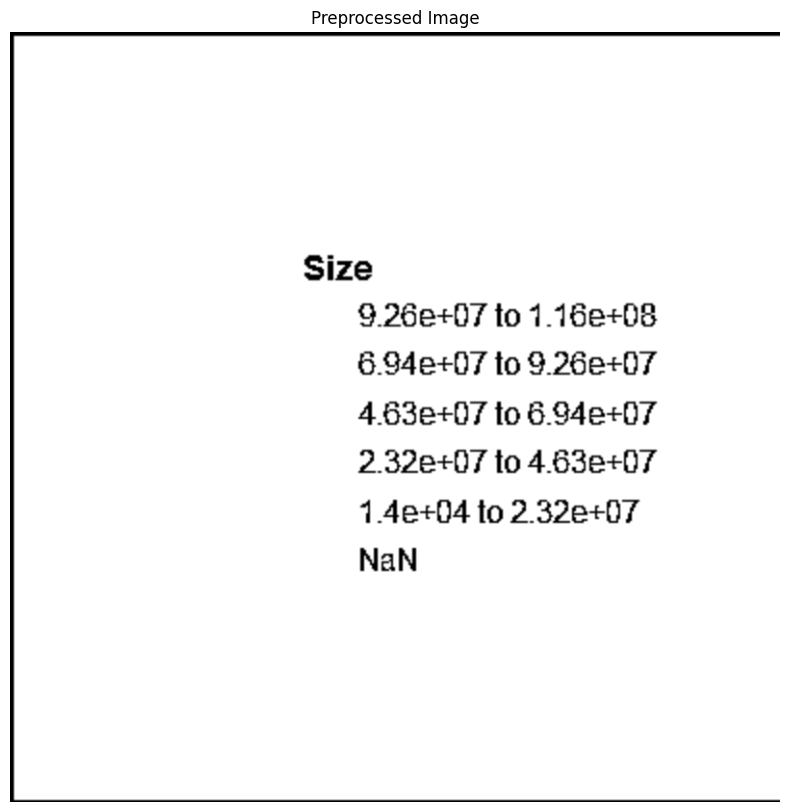

Extracted Text from ROI:
Size
9 26e+07 to 1.16e+08
6.94e+07 to 9.26e+07
463e+07 to 6.94e+07
2.32e+07 to 4.63e+07
1.4e+04 to 2.32e+07
NaN



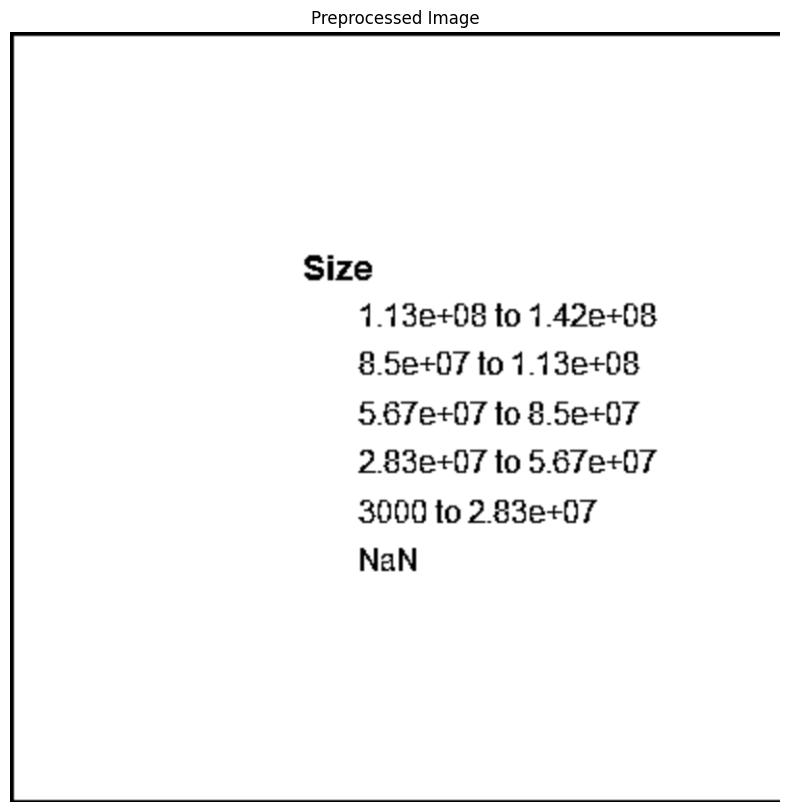

Extracted Text from ROI:
Size
1.13e+08 to 1.42e+08
§.5e+07 to 1.13e+08
5.67e+07 to 8.5e+07
2.83et07 to 5.67e+07
3000 to 2.83e+07
NaN



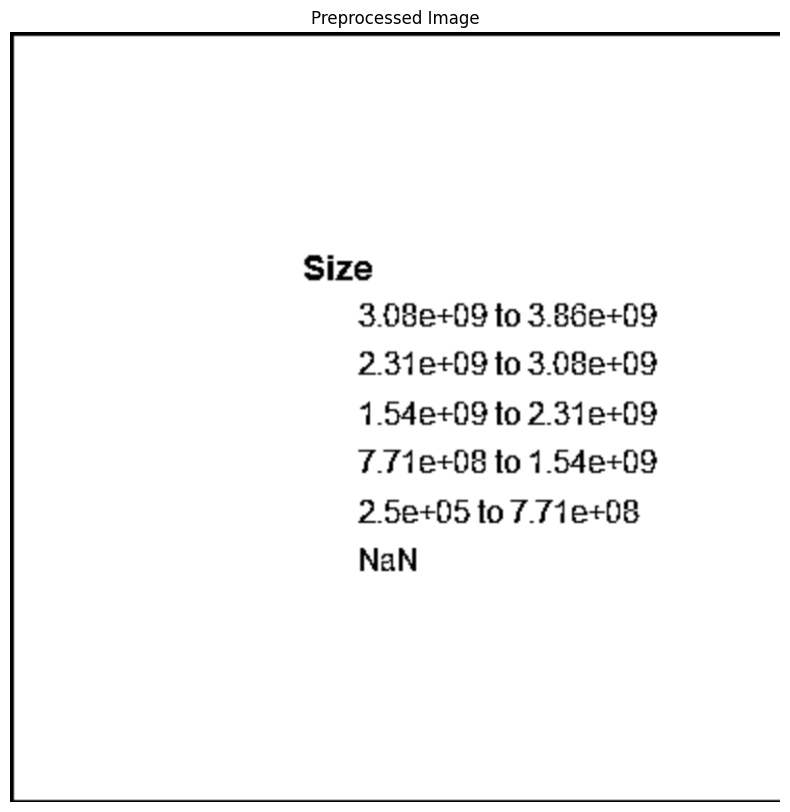

Extracted Text from ROI:
Size
3.06e+09 to 3.86e+09
2.31e+09 to 3.08e+09
1.54e+09 to 2.31e+09
7.71e+08 to 1.54e+09
2.5e+05 to 7.71e+08
NaN



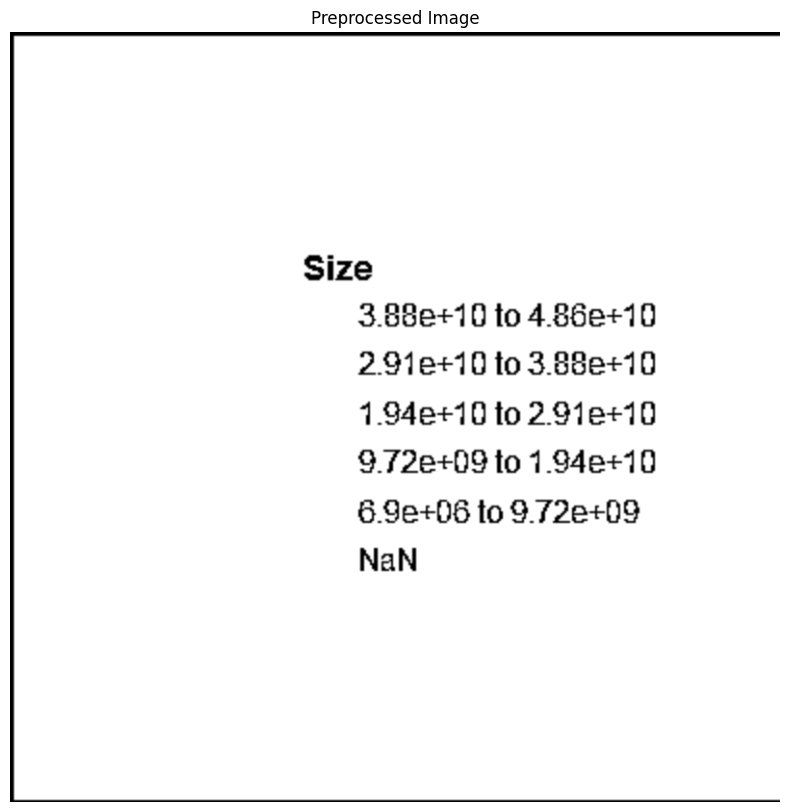

Extracted Text from ROI:
Size
3.86e+10 to 4.86e+10
2.91e+10 to 3.88e+10
1.94e+10 to2.91e+10
9. 72e+09 to 1.94e+10
6.9e+06 to 9.72e+09
NaN



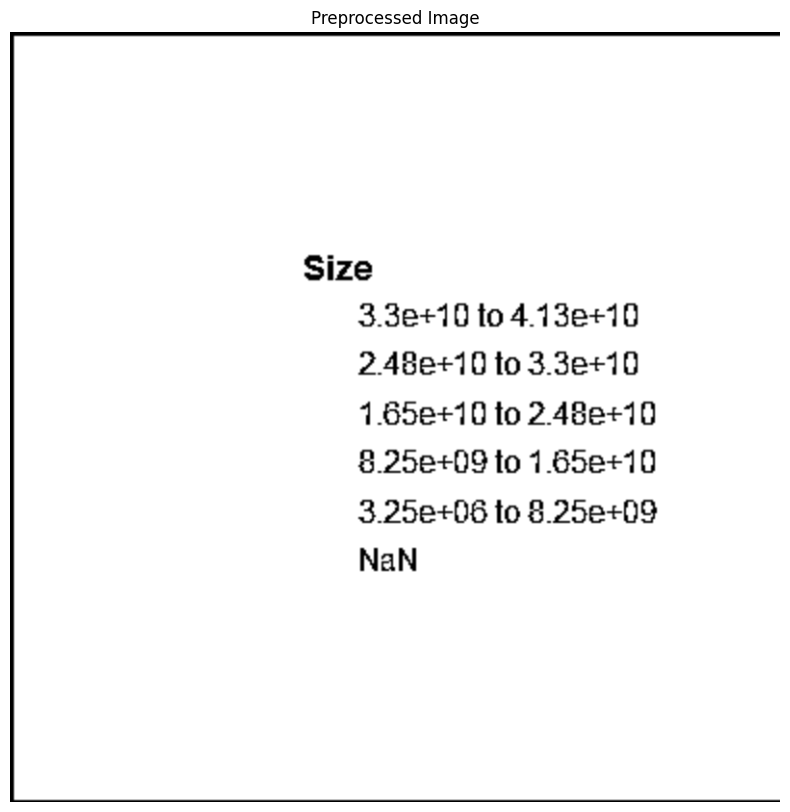

Extracted Text from ROI:
Size
3.3e+10 to 4.13e+10
2.48e+10 to 3.3e+10
1.65e+10 to 2.48e+10
§.25e+09 to 1.65e+10
3.25e+06 to 8.25e+09
NaN



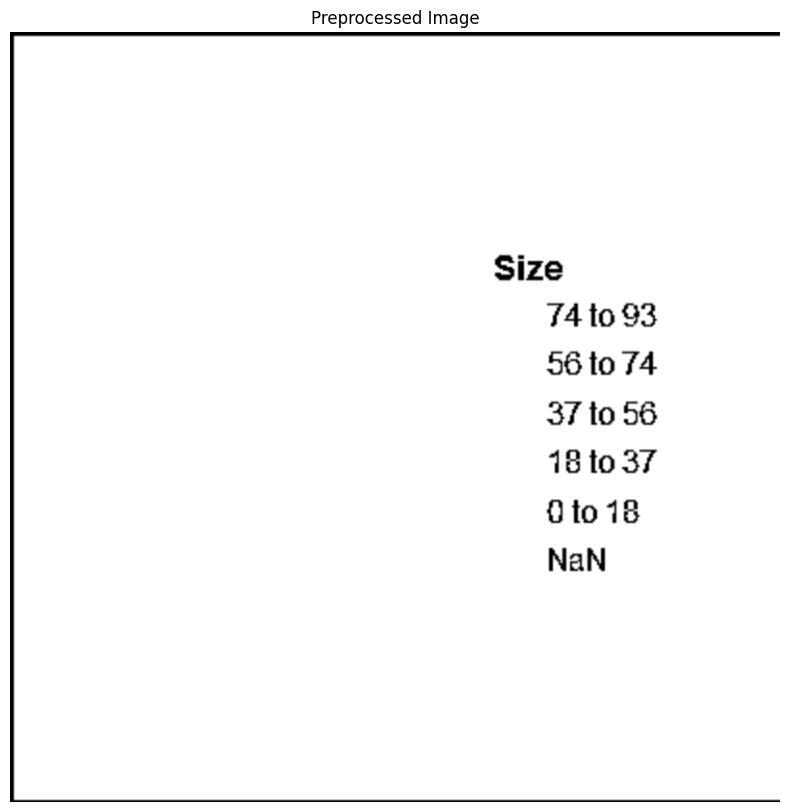

Extracted Text from ROI:
Size
T4 to 93
56 to 74
37 to 56
18 to 37
01018
NaN



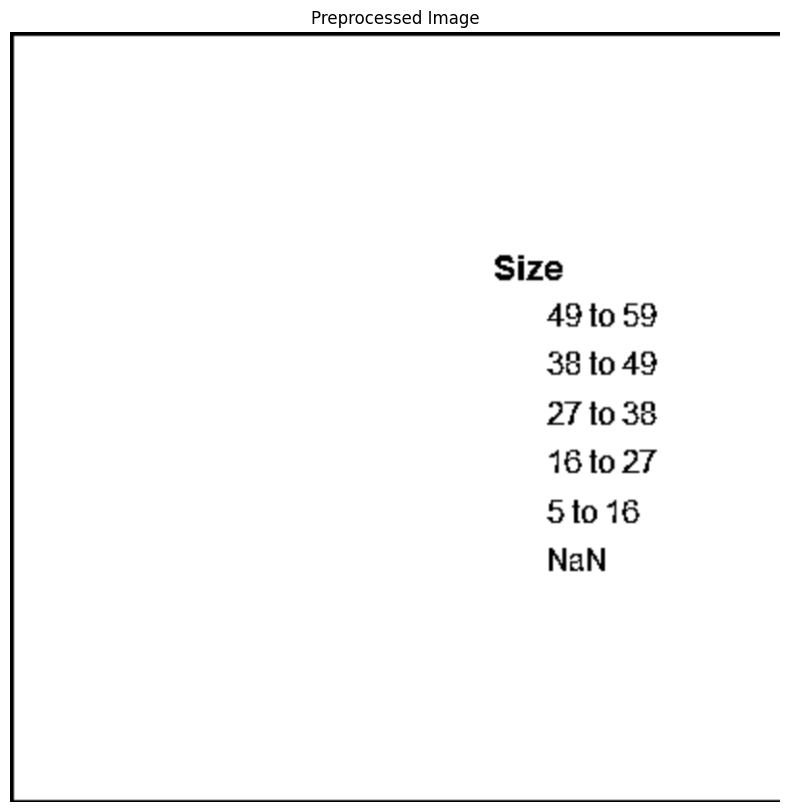

Extracted Text from ROI:
Size
43 to 59
38 to 49
27 to 38
16 to 27
§to16
NaN



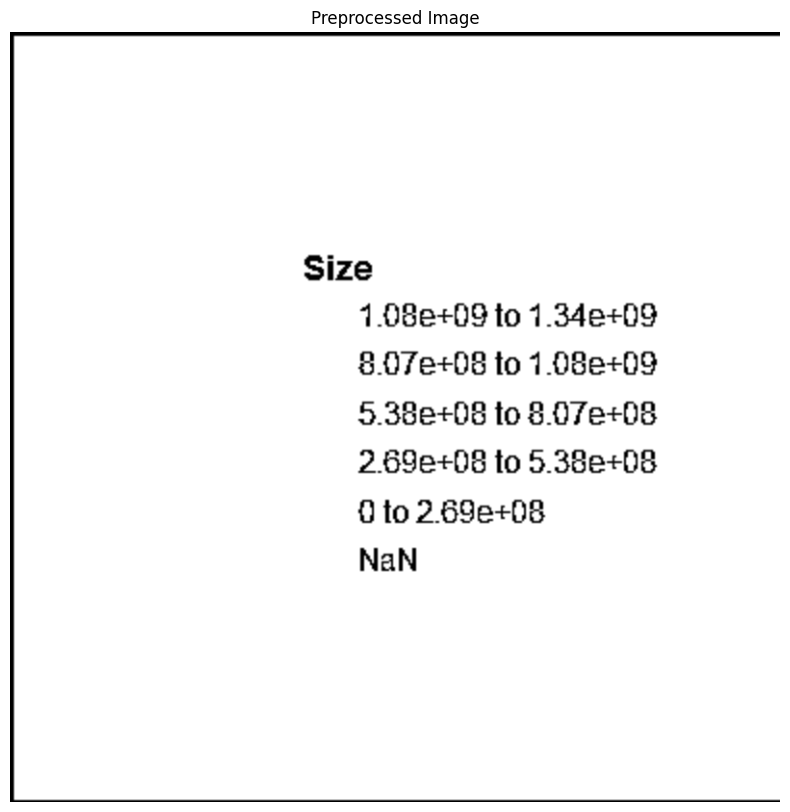

Extracted Text from ROI:
Size
1.08e+09 to 1.34e+09
8.07e+08 to 1.08e+09
5.36e+08 to 8.07e+08
2.69e+08 to 5.38e+08
0 to 2.69e+08
NaN



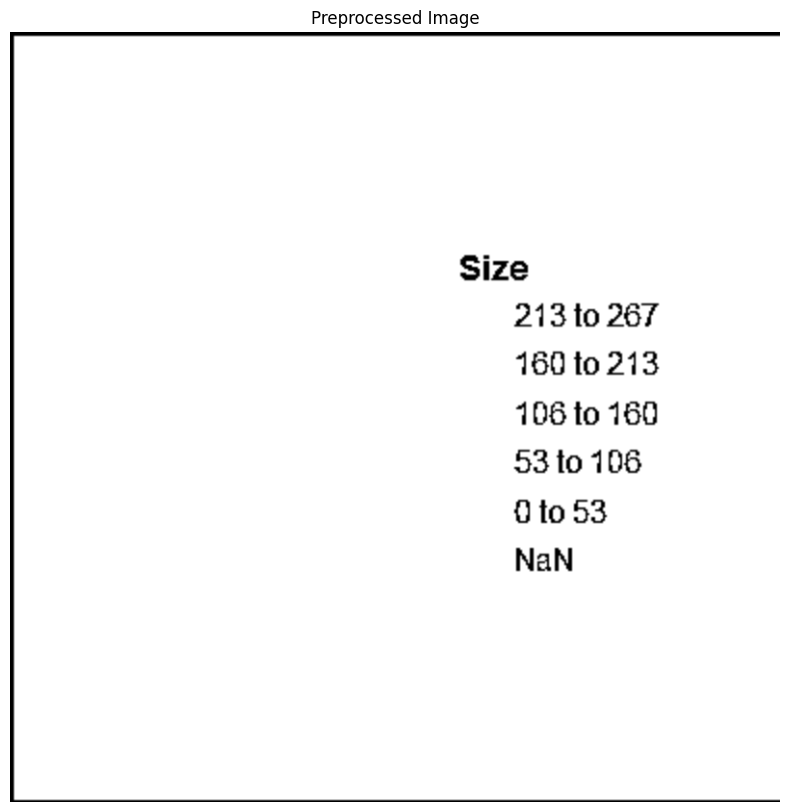

Extracted Text from ROI:
Size
213 to 267
160 to 213
106 to 160
53 to 106
0 to 53
NaN



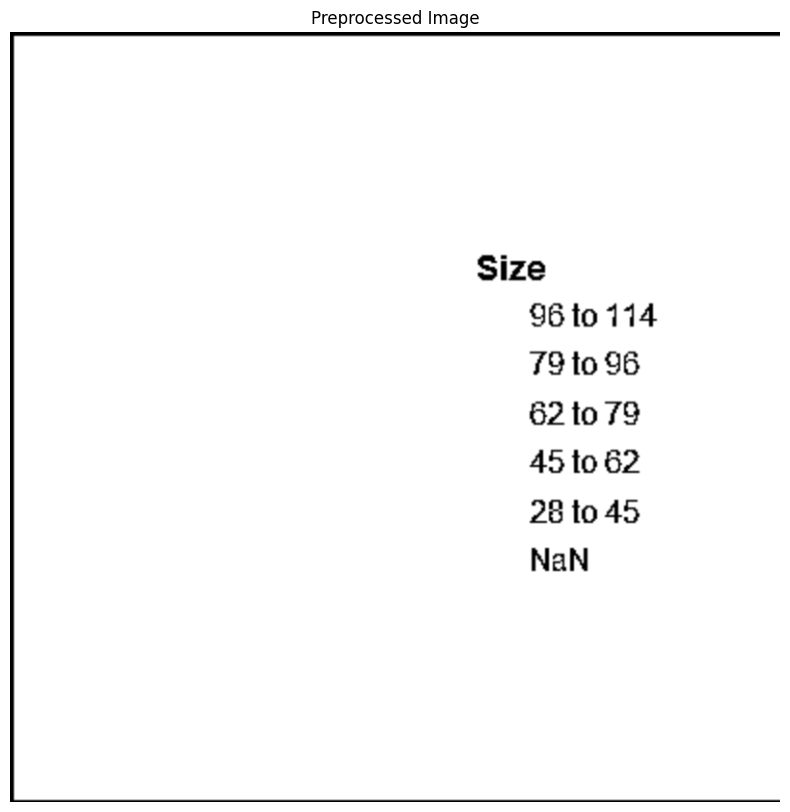

Extracted Text from ROI:
Size
96 to 114
73 to 96
62 to 79
45 to 62
28 to 45
NaN



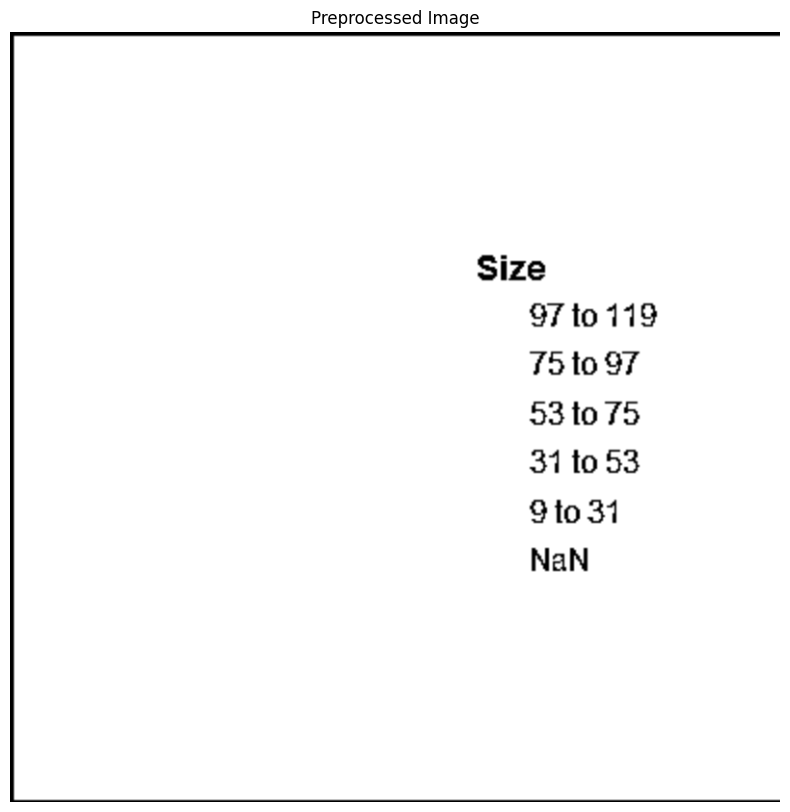

Extracted Text from ROI:
Size
97 10119
75 to 97
53 to 75
31 to 53
9 to 31
NaN



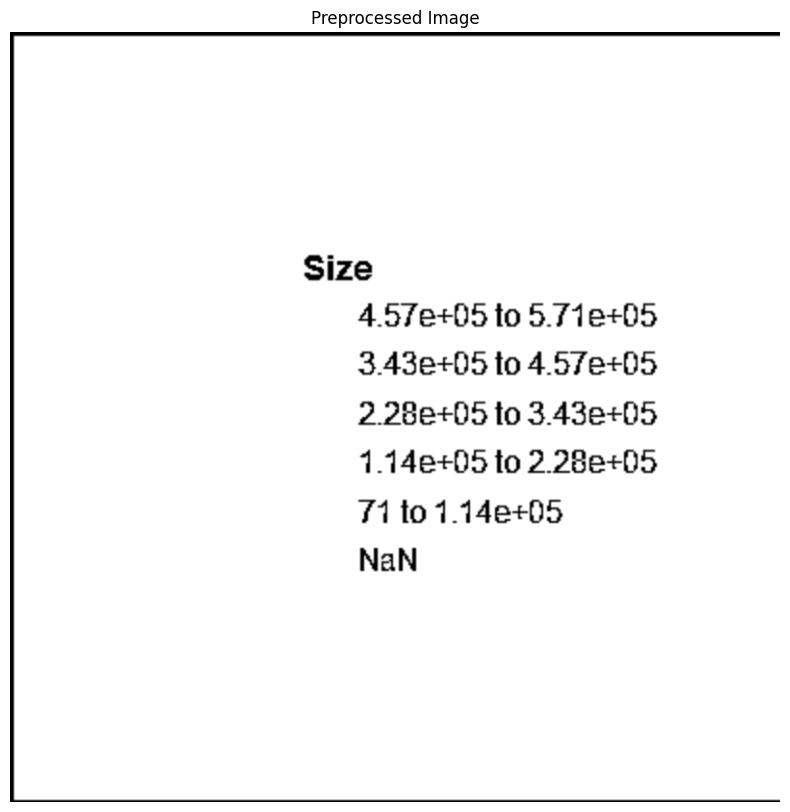

Extracted Text from ROI:
Size
4.57e+05 to 5.71e+05
3.43e+05 to 4.57e+05
2.26e+05 to 3.43e+05
1.14e+05 to 2.28e+05
71 to 1.14e+05
NaN



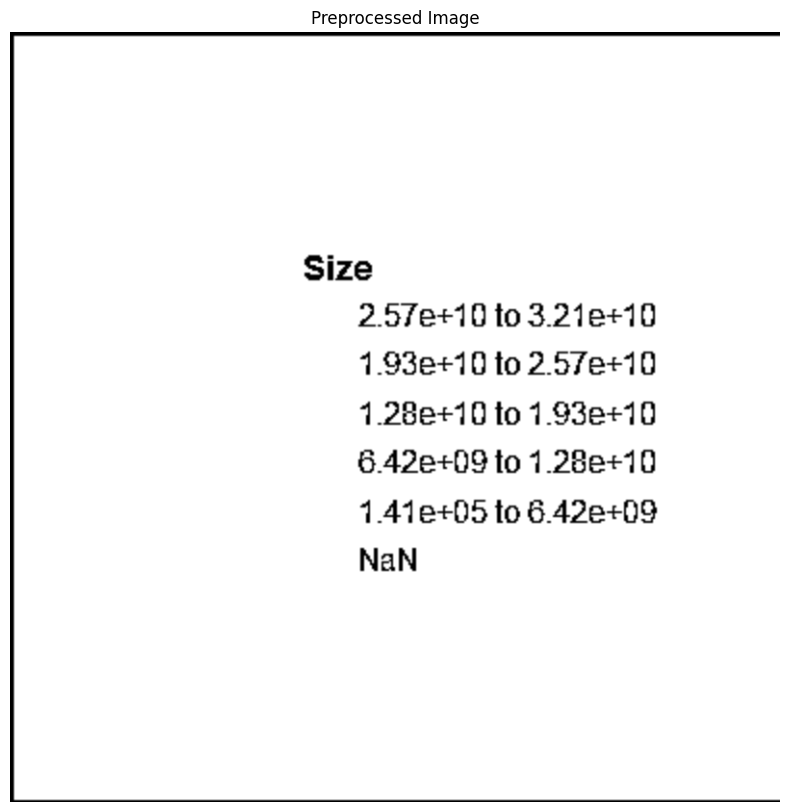

Extracted Text from ROI:
Size
2.57e+10 to3.21e+10
1.93e+10 to 2.57e+10
1.28e+10 to 1.93e+10
6.42e+09 to 1.26e+10
1.41e+05 to 6.42e+09
NaN



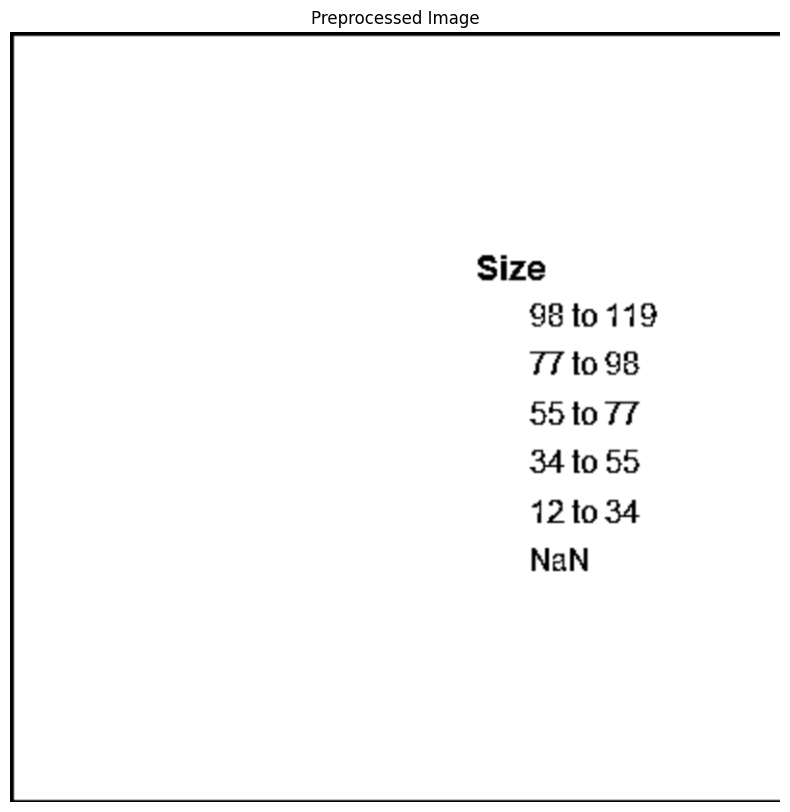

Extracted Text from ROI:
Size
98 to 119
77 to 98
55 to 77
34 to 55
12 to 34
NaN



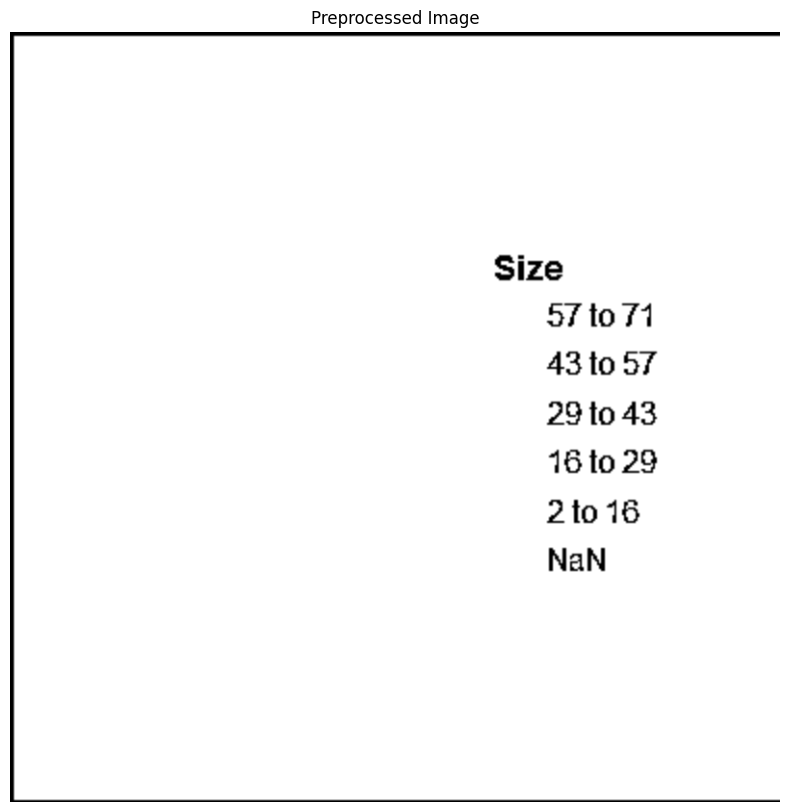

Extracted Text from ROI:
Size
57to71
43 to 57
29 to 43
16 to 29
21016
NaN



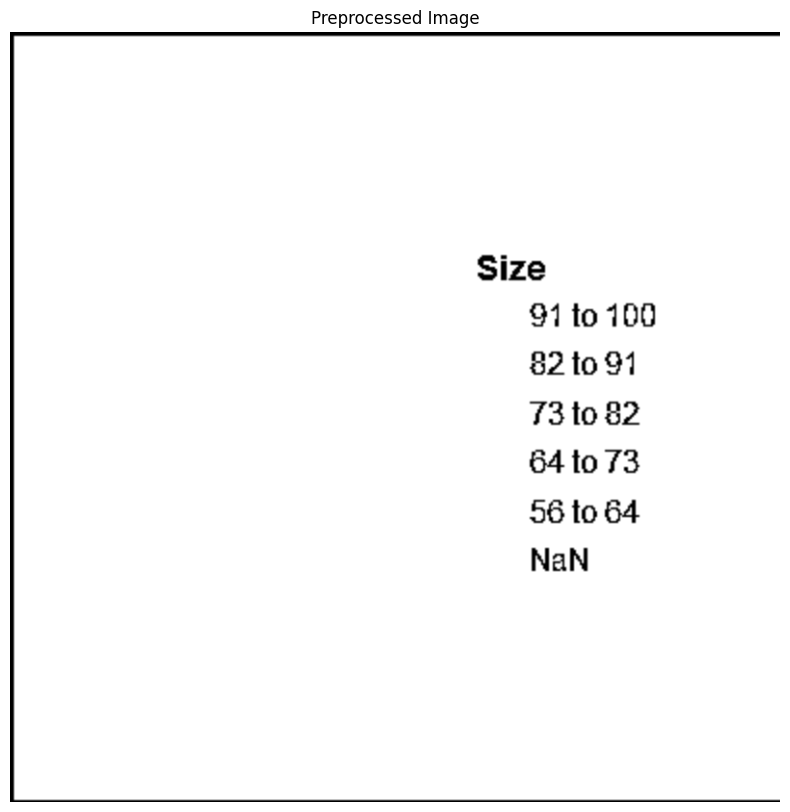

Extracted Text from ROI:
Size
91 to 100
82 to 91
73 to 82
64 to 73
56 to 64
NaN



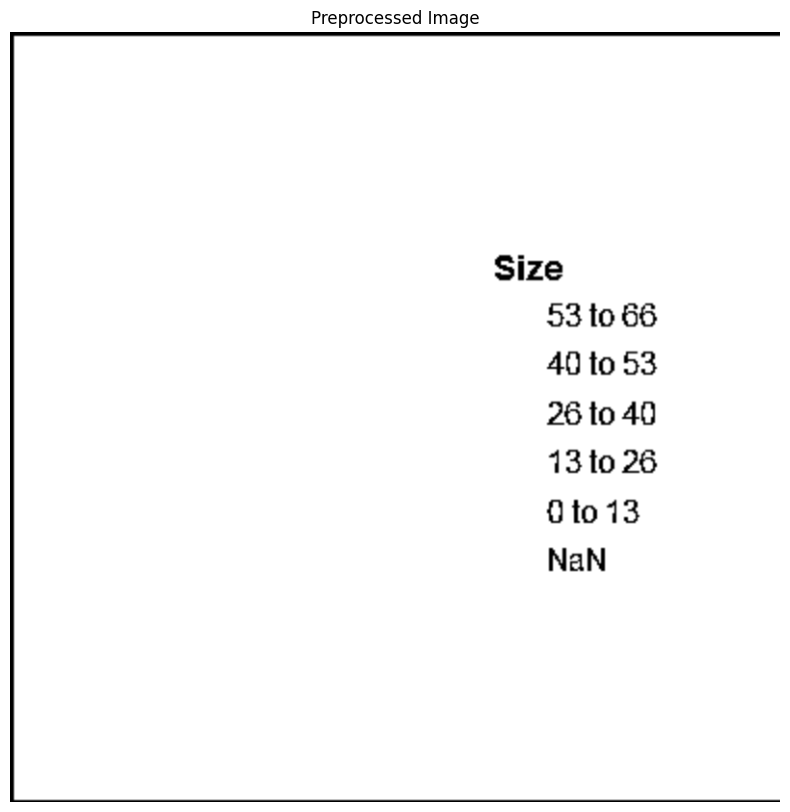

Extracted Text from ROI:
Size
53 to 66
40 to 53
26 to 40
13 to 26
0 to 13
NaN



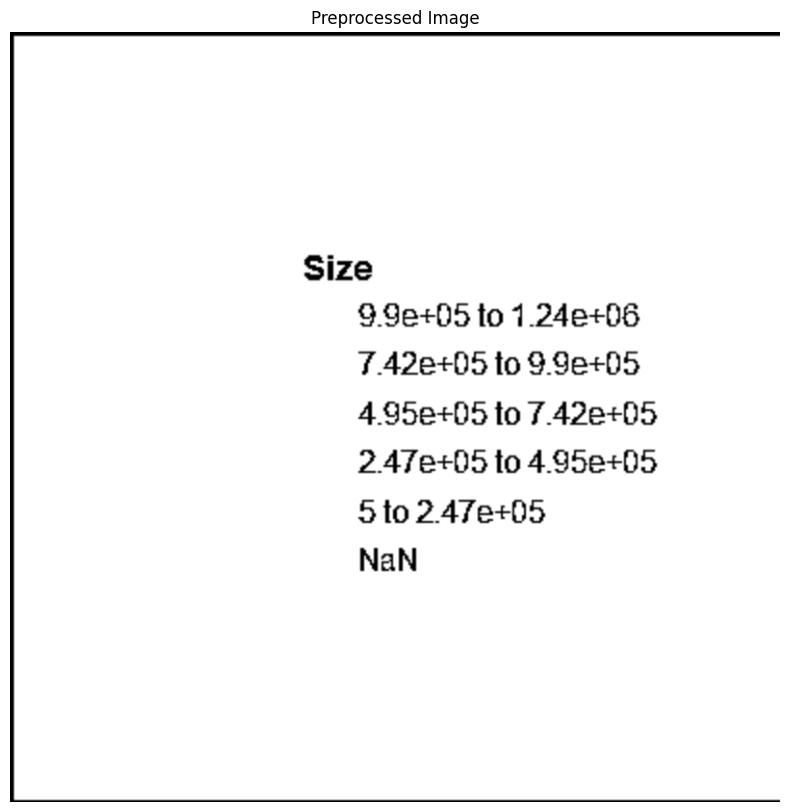

Extracted Text from ROI:
Size
9 9e+05 to 1.24e+06
7 42e+05 to 9.9e+05
4.95e+05 to 7.42e+05
2.47e+05 to 4.95e+05
5 to 2.47e+05
NaN



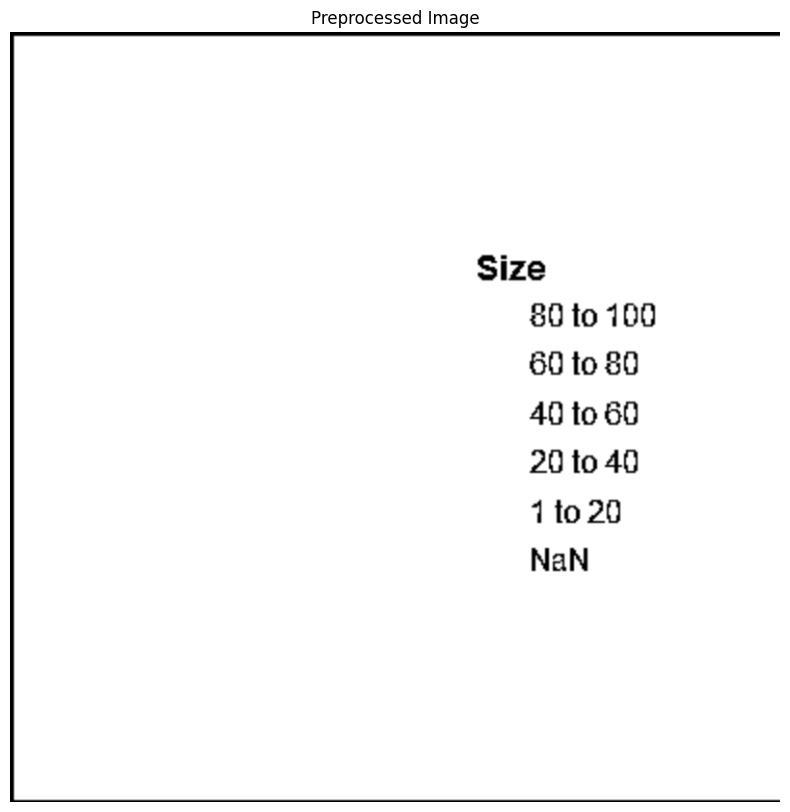

Extracted Text from ROI:
Size
80 to 100
60 to 80
40 to 60
20 to 40
1 to 20
NaN



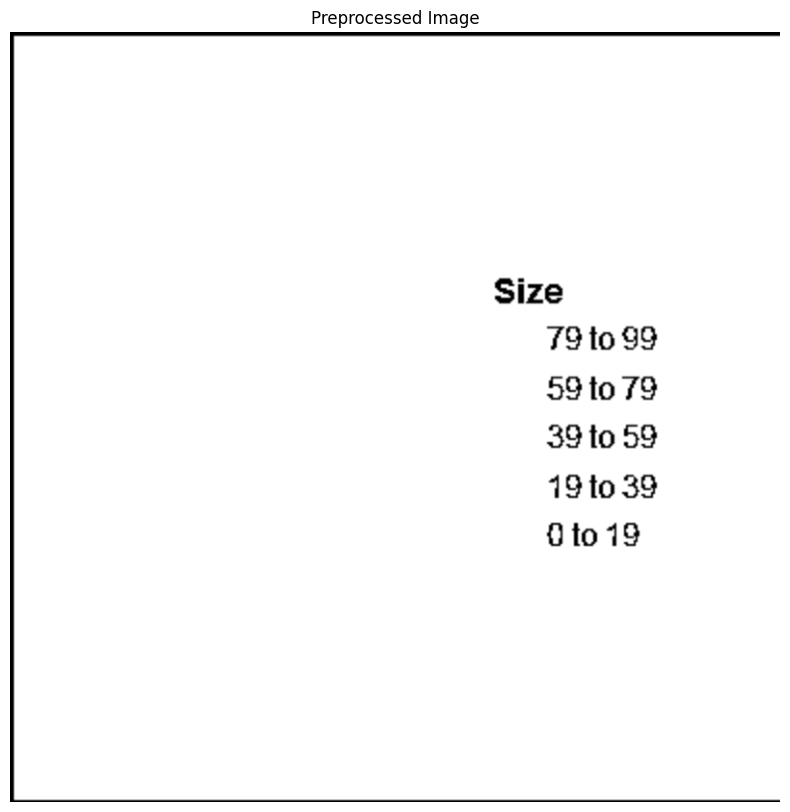

Extracted Text from ROI:
Size
73 to 99
59 to 79
39 to 59
19 to 39
0to 19



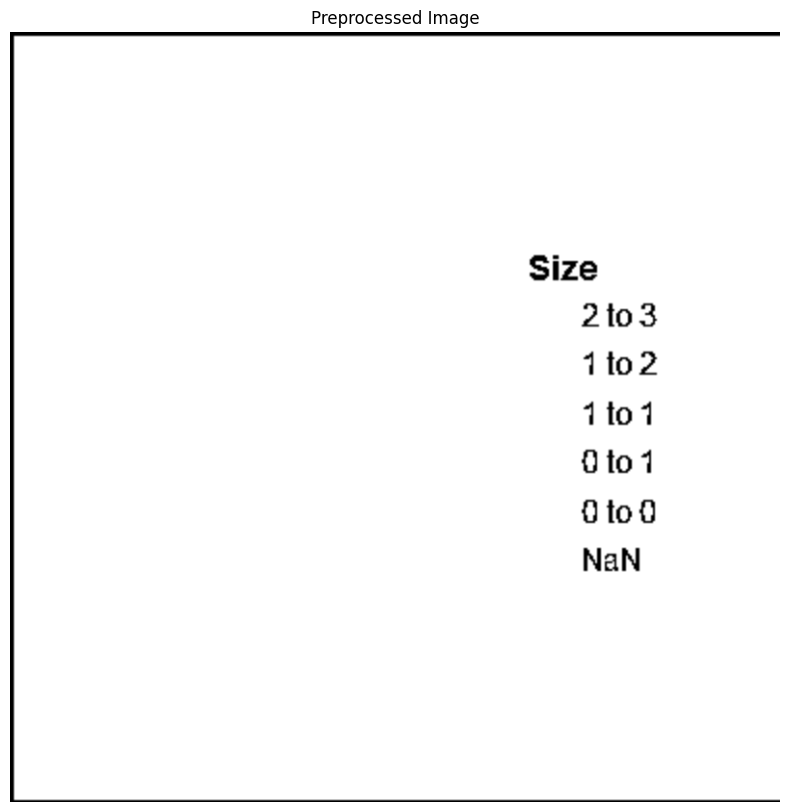

Extracted Text from ROI:
Size
2to3
1to2
1to1
Oto1
0 to 0
NaN



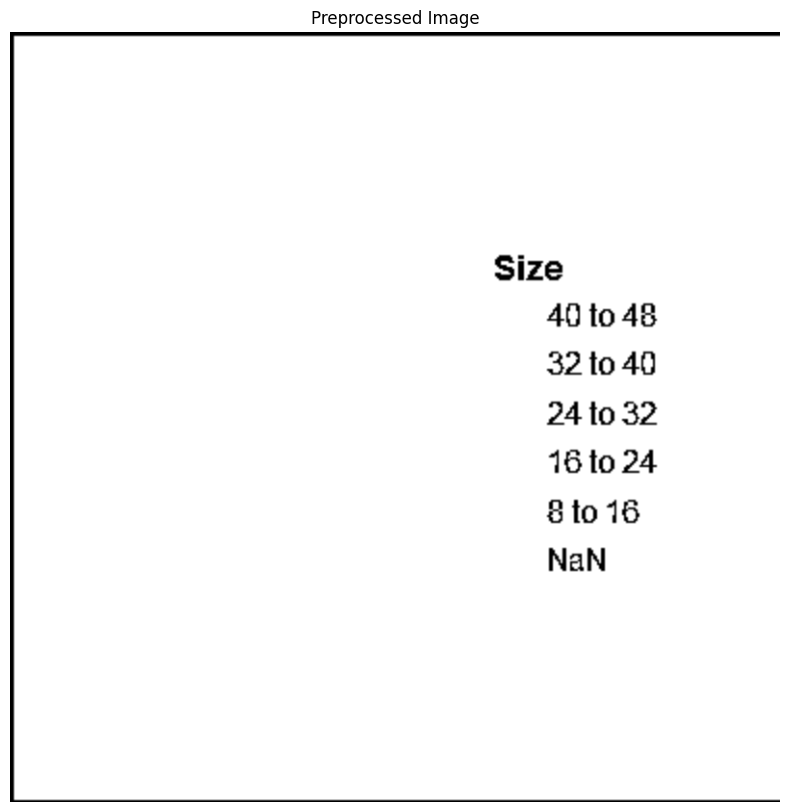

Extracted Text from ROI:
Size
40 to 48
32 to 40
24 to 32
16 to 24
8to16
NaN



KeyboardInterrupt: 

In [32]:
import cv2
import pytesseract
import matplotlib.pyplot as plt
import os

# Path to the Tesseract executable
pytesseract.pytesseract.tesseract_cmd = r'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

# Load the image
input_dir = 'D:\\encoder-tool\\filtered-contours'

for filename in os.listdir(input_dir):
    if filename.endswith('.png'):  # Process only PNG files
        image_path = os.path.join(input_dir, filename)
        image = cv2.imread(image_path)

        # Define the region of interest (ROI)
        # (x, y, width, height)
        roi = (800, 200, 600, 400)

        # Draw a rectangle around the ROI on the original image
        x, y, w, h = roi
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Crop the image to the ROI
        cropped_image = image[y:y+h, x:x+w]

        # Preprocessing steps
        # Convert the cropped image to grayscale
        gray_cropped = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)

        # Apply adaptive thresholding with a different block size and constant
        adaptive_thresh_image = cv2.adaptiveThreshold(
            gray_cropped, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 8
        )

        # Resize the image to improve OCR accuracy
        resized_image = cv2.resize(adaptive_thresh_image, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)

        # Display the preprocessed image using matplotlib
        plt.figure(figsize=(10, 10))
        plt.imshow(resized_image, cmap='gray')
        plt.title("Preprocessed Image")
        plt.axis('off')  # Hide the axis
        plt.show()

        # Use Tesseract to extract text from the preprocessed image
        custom_config = r'--oem 3 --psm 6'
        text = pytesseract.image_to_string(resized_image, config=custom_config)

        print("Extracted Text from ROI:")
        print(text)

## Extracting Labels in X-Axis

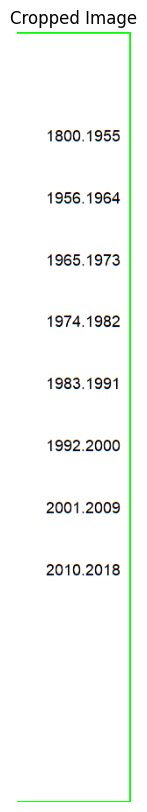

Extracted Text from Rotated ROI:
1800.1955

1956.1964

1965.1973

1974.1982

1983.1991

1992.2000

2001.2009

2010.2018




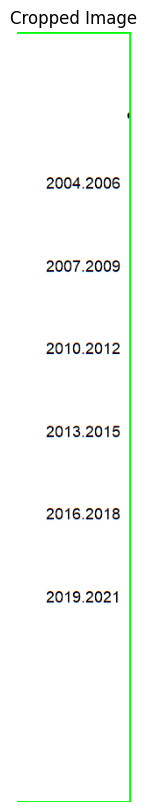

Extracted Text from Rotated ROI:
2004.2006

2007.2009

2010.2012

2013.2015

2016.2018

2019.2021




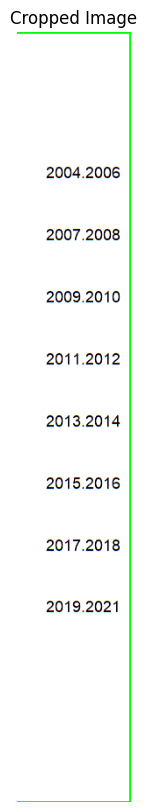

Extracted Text from Rotated ROI:
2004.2006

2007.2008

2009.2010

2011.2012

2013.2014

2015.2016

2017.2018

2019.2021




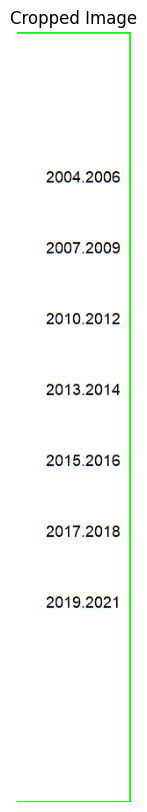

Extracted Text from Rotated ROI:
2004.2006

2007.2009

2010.2012

2013.2014

2015.2016

2017.2018

2019.2021




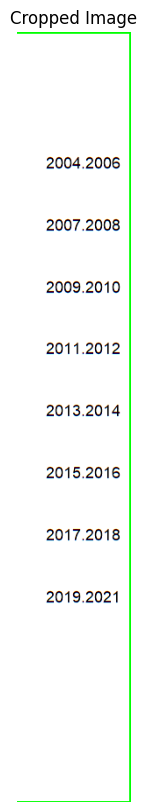

Extracted Text from Rotated ROI:
2004.2006

2007.2008

2009.2010

2011.2012

2013.2014

2015.2016

2017.2018

2019.2021




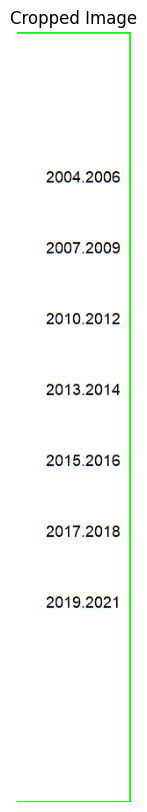

Extracted Text from Rotated ROI:
2004.2006

2007.2009

2010.2012

2013.2014

2015.2016

2017.2018

2019.2021




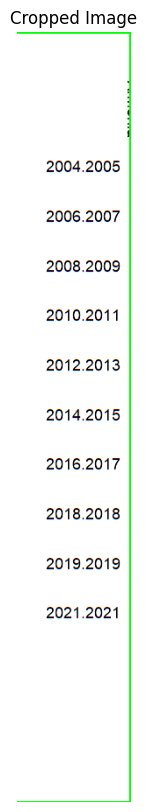

Extracted Text from Rotated ROI:
2004.2005

2006.2007

2008.2009

2010.2011

2012.2013

2014.2015

2016.2017

2018.2018

2019.2019

2021.2021




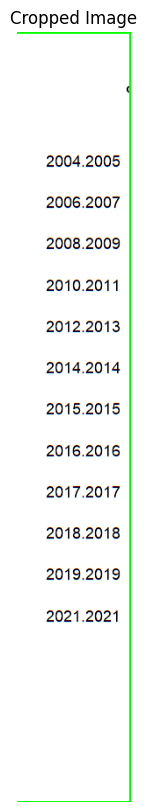

Extracted Text from Rotated ROI:
2004.2005

2006.2007

2008.2009

2010.2011

2012.2013

2014.2014

2015.2015

2016.2016

2017.2017

2018.2018

2019.2019

2021.2021




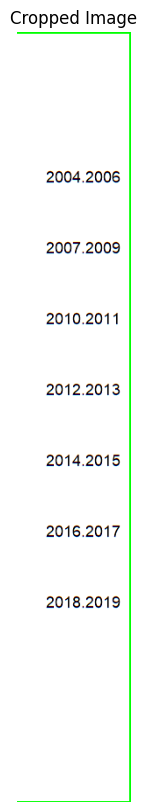

Extracted Text from Rotated ROI:
2004.2006

2007.2009

2010.2011

2012.2013

2014.2015

2016.2017

2018.2019




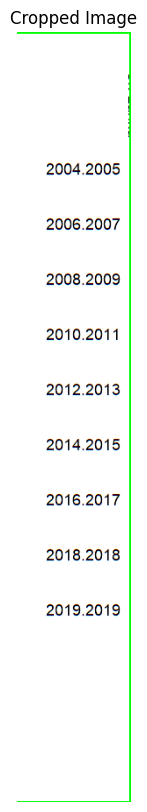

Extracted Text from Rotated ROI:
2004.2005

2006.2007

2008.2009

2010.2011

2012.2013

2014.2015

2016.2017

2018.2018

2019.2019




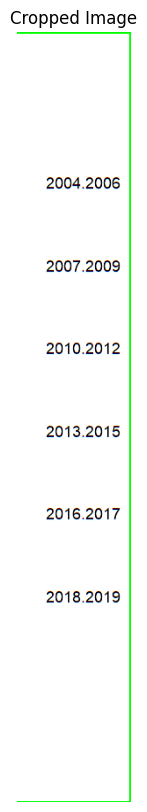

Extracted Text from Rotated ROI:
2004.2006

2007.2009

2010.2012

2013.2015

2016.2017

2018.2019




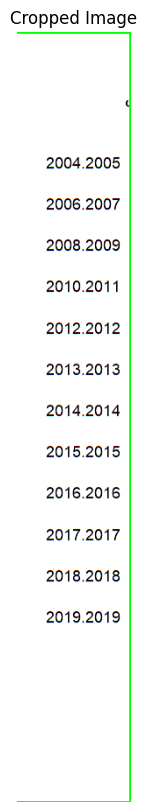

Extracted Text from Rotated ROI:
2004.2005

2006.2007

2008.2009

2010.2011

2012.2012

2013.2013

2014.2014

2015.2015

2016.2016

2017.2017

2018.2018

2019.2019




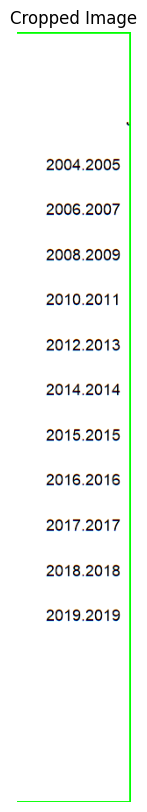

Extracted Text from Rotated ROI:
2004.2005

2006.2007

2008.2009

2010.2011

2012.2013

2014.2014

2015.2015

2016.2016

2017.2017

2018.2018

2019.2019




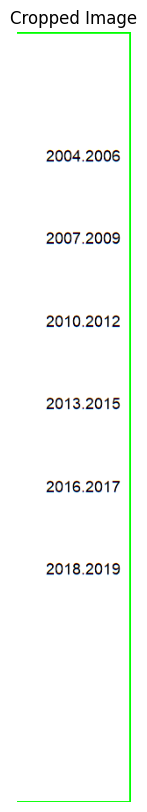

Extracted Text from Rotated ROI:
2004.2006

2007.2009

2010.2012

2013.2015

2016.2017

2018.2019




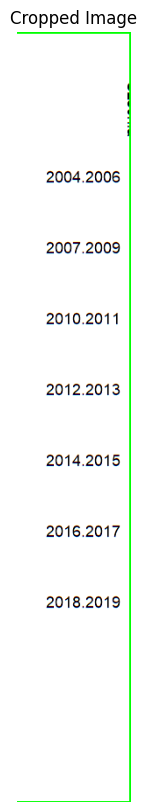

Extracted Text from Rotated ROI:
2004.2006

2007.2009

2010.2011

2012.2013

2014.2015

2016.2017

2018.2019




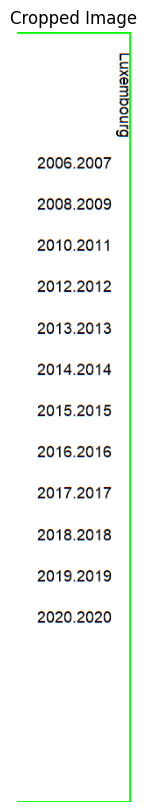

Extracted Text from Rotated ROI:
2006.2007

2008.2009

2010.2011

2012.2012

2013.2013

2014.2014

2015.2015

2016.2016

2017.2017

2018.2018

2019.2019

2020.2020

Bunoquwexn7




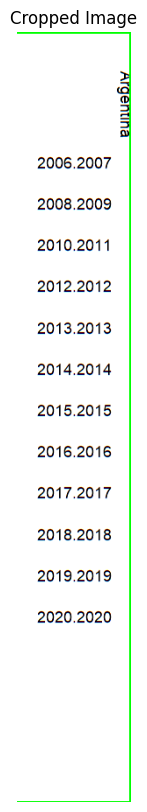

Extracted Text from Rotated ROI:
2006.2007

2008.2009

2010.2011

2012.2012

2013.2013

2014.2014

2015.2015

2016.2016

2017.2017

2018.2018

2019.2019

2020.2020

eunusbiw




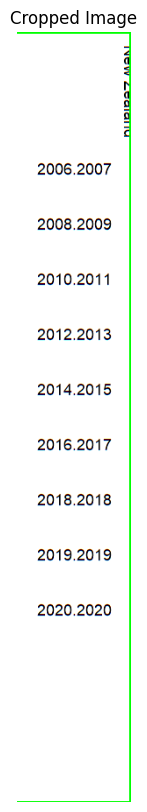

Extracted Text from Rotated ROI:
2006.2007

2008.2009

2010.2011

2012.2013

2014.2015

2016.2017

2018.2018

2019.2019

2020.2020




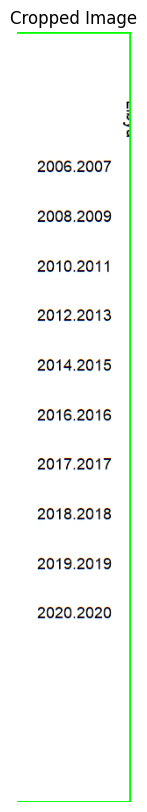

Extracted Text from Rotated ROI:
2006.2007

2008.2009

2010.2011

2012.2013

2014.2015

2016.2016

2017.2017

2018.2018

2019.2019

2020.2020




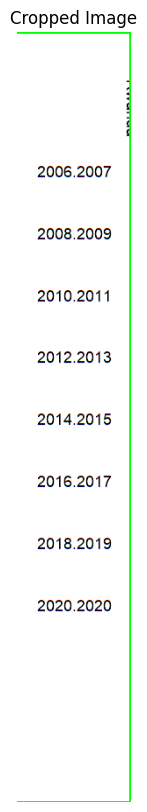

Extracted Text from Rotated ROI:
2006.2007

2008.2009

2010.2011

2012.2013

2014.2015

2016.2017

2018.2019

2020.2020




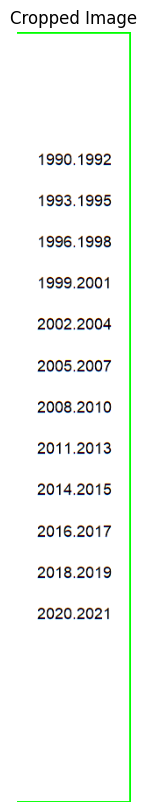

Extracted Text from Rotated ROI:
1990.1992

1993.1995

1996.1998

1999.2001

2002.2004

2005.2007

2008.2010

2011.2013

2014.2015

2016.2017

2018.2019

2020.2021




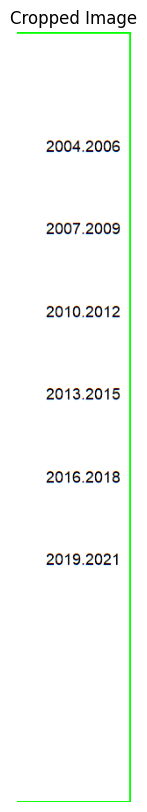

Extracted Text from Rotated ROI:
2004.2006

2007.2009

2010.2012

2013.2015

2016.2018

2019.2021




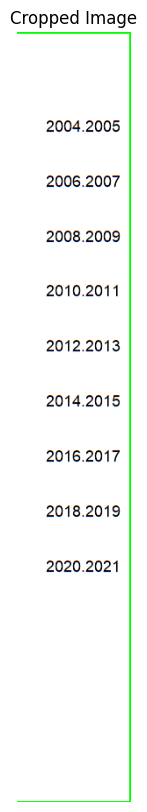

KeyboardInterrupt: 

In [31]:
import cv2
import pytesseract
import matplotlib.pyplot as plt
import os

# Path to the Tesseract executable
pytesseract.pytesseract.tesseract_cmd = r'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

# Load the image
input_dir = 'D:\\encoder-tool\\filtered-contours'

for filename in os.listdir(input_dir):
    if filename.endswith('.png'):  # Process only PNG files
        image_path = os.path.join(input_dir, filename)
        image = cv2.imread(image_path)

        # Define the region of interest (ROI)
        # (x, y, width, height)
        roi = (280, 870, 880, 170)

        # Draw a rectangle around the ROI on the original image
        x, y, w, h = roi
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Crop the image to the ROI
        cropped_image = image[y:y+h, x:x+w]

        # Rotate the cropped image 90 degrees clockwise
        rotated_image = cv2.rotate(cropped_image, cv2.ROTATE_90_CLOCKWISE)

        # Display the cropped image using matplotlib
        plt.figure(figsize=(10, 10))
        plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
        plt.title("Cropped Image")
        plt.axis('off')  # Hide the axis
        plt.show()

        # Convert the rotated image to grayscale
        gray_rotated = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2GRAY)

        # Use Tesseract to extract text from the rotated region
        text = pytesseract.image_to_string(gray_rotated)

        print("Extracted Text from Rotated ROI:")
        print(text)